In [2]:
# Importing necessary libraries and general settings
import transformation
import compensation
import data_imports
import pandas as pd
import os
import glob
import math
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from mpl_toolkits import mplot3d
import numpy as np
from scipy.signal import find_peaks

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)

In [3]:
dir_paraquet = 'Manufacturing_Data/'
dir_planning = 'Planing_Data/'
dir_final_save  = 'Final_df/' 

In [4]:
print('Enter the Block number, example 1030')
block = input()
block = int(block)

Enter the Block number, example 1030
1030


In [5]:
print('Enter the blade angle, muliples of 12')
angle = input()
angle = int(angle)

Enter the blade angle, muliples of 12
24


In [6]:
df_m,df_p,compensation_values_df = data_imports.data_out(block,angle,dir_paraquet,dir_planning)

Files loaded Succussfully!


In [12]:
# Just copying machine data points linear(x,y,x) and rotart (a,c) into arrays.
# These machine points (x,y,x,a,c) are transformed from machine coordinate system to workpiece coordinate system by forward tramsformation

x = df_m['MachineX'].copy(deep=True)
y = df_m['MachineY'].copy(deep=True)
z = df_m['MachineZ'].copy(deep=True)
a = np.radians(df_m['MachineA']).copy(deep=True)
c = np.radians(df_m['MachineC']).copy(deep=True)

size1 = x.shape[0]

# converting pandas series to numpy array
x = x.to_numpy()
y = y.to_numpy()
z = z.to_numpy()
a = a.to_numpy()
c = c.to_numpy()

In [13]:
#compensation_values
compensation_values = compensation_values_df.to_numpy()

In [14]:
# Within each cube we have ranges defined in x,y,z for the machine position

x_range = np.arange(-200,201,100)
y_range = np.arange(-300,301,150)
z_range = np.arange(-500,1,50)

obj3 = compensation.Compensation(compensation_values,x_range,y_range,z_range)

# Caclculation of compensation error values based on machine positions obtained through inverse transformation
deltaX1, deltaY1, deltaZ1,deltaI1,deltaJ1,deltaK1 = obj3.calculate(x,y,z)  
size3 = x.shape[0]

conc3 = np.concatenate((deltaX1.reshape(size3,1),deltaY1.reshape(size3,1),deltaZ1.reshape(size3,1),deltaI1.reshape(size3,1),deltaJ1.reshape(size3,1),deltaK1.reshape(size3,1)),axis=1)

# prininting the compensation error values
df_obj3 = pd.DataFrame(conc3, columns=['deltaX1','deltaY1','deltaZ1','deltaI1','deltaJ1','deltaK1'])
df_obj3.head(5)  
                          

deltaX1    deltaY1    deltaZ1  deltaI1  deltaJ1  deltaK1
0  26.443495 -11.914891 -10.001572      0.0      0.0      0.0
1  26.443495 -11.914891 -10.001572      0.0      0.0      0.0
2  26.443495 -11.914891 -10.001572      0.0      0.0      0.0
3  26.443495 -11.914891 -10.001572      0.0      0.0      0.0
4  26.443495 -11.914891 -10.001572      0.0      0.0      0.0

In [15]:
x_compensated = x + deltaX1*10**-3    # since given compensation is to be converted from microns to mm (10**-6 x 10**3 = 10**-3)
y_compensated = y + deltaY1*10**-3
z_compensated = z + deltaZ1*10**-3

conc4 = np.concatenate((x_compensated.reshape(size3,1),y_compensated.reshape(size3,1),z_compensated.reshape(size3,1)),axis=1)
df_obj4 = pd.DataFrame(conc4, columns=['x_compensated','y_compensated','z_compensated'])
df_obj4.head(5)

x_compensated  y_compensated  z_compensated
0    -158.991757    -118.613215     -79.440502
1    -158.991757    -118.613215     -79.440502
2    -158.991757    -118.613215     -79.440502
3    -158.991757    -118.613215     -79.440502
4    -158.991757    -118.613215     -79.440502

In [16]:
df_m['compensation_x'] = deltaX1*10**-3
df_m['compensation_y'] = deltaY1*10**-3
df_m['compensation_z'] = deltaZ1*10**-3
df_m.iloc[10000:10010]

time  MachineX  MachineY  MachineZ  MachineA  MachineC  \
86.739998  86.739998 -103.6344  -96.2363 -168.2141  -82.2746  349.7110   
86.754997  86.754997 -103.8011  -95.9182 -168.0601  -82.1433  349.5896   
86.760002  86.760002 -103.8011  -95.9182 -168.0601  -82.1433  349.5896   
86.769997  86.769997 -104.1187  -95.2880 -167.7545  -81.8854  349.3557   
86.777496  86.777496 -104.1187  -95.2880 -167.7545  -81.8854  349.3557   
86.784996  86.784996 -104.4358  -94.6181 -167.4276  -81.6143  349.1175   
86.792496  86.792496 -104.4358  -94.6181 -167.4276  -81.6143  349.1175   
86.800003  86.800003 -104.5901  -94.2771 -167.2603  -81.4773  348.9996   
86.807503  86.807503 -104.7412  -93.9328 -167.0906  -81.3395  348.8826   
86.815002  86.815002 -105.0218  -93.2545 -166.7528  -81.0700  348.6595   

           LoadSpindle    TransfX     TransfY    TransfZ   TransfI   TransfJ  \
86.739998     9.977273 -67.894437  206.197763  33.233967  0.468635 -0.304750   
86.754997     9.995455 -67.636912  206.286409  33.376734  0.341425 -0.286402   
86.760002     9.995455 -67.636912  206.286409  33.376734  0.341425 -0.286402   
86.769997     9.995455 -67.136724  206.457658  33.653001  0.120803 -0.162619   
86.777496     9.995455 -67.136724  206.457658  33.653001  0.120803 -0.162619   
86.784996    10.031818 -66.620311  206.632905  33.937973 -0.026158  0.061746   
86.792496    10.031818 -66.620311  206.632905  33.937973 -0.026158  0.061746   
86.800003    10.031818 -66.361738  206.720172  34.080315 -0.056564  0.194642   
86.807503    10.031818 -66.102898  206.807110  34.222738 -0.055341  0.330687   
86.815002    10.059091 -65.600959  206.974743  34.498297  0.032865  0.573080   

            TransfK  executionDuration  previousExecutionDuration  \
86.739998  0.829161           0.004907                   0.002006   
86.754997  0.895211           0.010303                   0.004907   
86.760002  0.895211           0.003265                   0.010303   
86.769997  0.979266           0.006443                   0.003265   
86.777496  0.979266           0.002092                   0.006443   
86.784996  0.997749           0.007135                   0.002092   
86.792496  0.997749           0.001943                   0.007135   
86.800003  0.979242           0.008211                   0.001943   
86.807503  0.942116           0.002962                   0.008211   
86.815002  0.818840           0.010271                   0.002962   

           relativeTimetoPreviousCall program number     timeStamp  \
86.739998                                   0.007052  6.375063e+10   
86.754997                                   0.007656  6.375063e+10   
86.760002                                   0.010422  6.375063e+10   
86.769997                                   0.006799  6.375063e+10   
86.777496                                   0.006882  6.375063e+10   
86.784996                                   0.006974  6.375063e+10   
86.792496                                   0.007172  6.375063e+10   
86.800003                                   0.006769  6.375063e+10   
86.807503                                   0.008301  6.375063e+10   
86.815002                                   0.006664  6.375063e+10   

           Tool Length  Tool Radius  G54-X  G54-Y    G54-Z  G54-A  G54-C  \
86.739998     226.4591          6.0    0.0    0.0 -510.483   24.0    0.0   
86.754997     226.4591          6.0    0.0    0.0 -510.483   24.0    0.0   
86.760002     226.4591          6.0    0.0    0.0 -510.483   24.0    0.0   
86.769997     226.4591          6.0    0.0    0.0 -510.483   24.0    0.0   
86.777496     226.4591          6.0    0.0    0.0 -510.483   24.0    0.0   
86.784996     226.4591          6.0    0.0    0.0 -510.483   24.0    0.0   
86.792496     226.4591          6.0    0.0    0.0 -510.483   24.0    0.0   
86.800003     226.4591          6.0    0.0    0.0 -510.483   24.0    0.0   
86.807503     226.4591          6.0    0.0    0.0 -510.483   24.0    0.0   
86.815002     226.4591       

In [17]:
obj = transformation.Transformation(size1,angle)
# Forward Transformation fuction:
# Input : Machine points in machine coordinate system
# Output: returns too tip points and orientation in workpiece coordinate system
tool_position_workpiece_CS, tool_orientation_workpiece_CS = obj.forward(x_compensated,y_compensated,z_compensated,a,c)

X = tool_position_workpiece_CS[0,0,:]
Y = tool_position_workpiece_CS[1,0,:]
Z = tool_position_workpiece_CS[2,0,:]
print(X.shape)

I = tool_orientation_workpiece_CS[0,0,:]
J = tool_orientation_workpiece_CS[1,0,:]
K = tool_orientation_workpiece_CS[2,0,:]

# Verification the correctness of code, i.e on applying reverse transformation on the forward transformation we should get same values or equivalent values i.e (cos(a or c),sin(a or c))
machine_points_xyz, machine_direction_ac = obj.backward(X,Y,Z,I,J,K)

x_out = machine_points_xyz[0,0,:]
y_out = machine_points_xyz[1,0,:]
z_out = machine_points_xyz[2,0,:]

a_out = machine_direction_ac[0,0,:]
c_out = machine_direction_ac[1,0,:]

conc1 = np.concatenate((x.reshape(size1,1),x_out.reshape(size1,1),y.reshape(size1,1),y_out.reshape(size1,1),z.reshape(size1,1),z_out.reshape(size1,1),a.reshape(size1,1),a_out.reshape(size1,1),c.reshape(size1,1),c_out.reshape(size1,1)),axis=1)

df_obj1 = pd.DataFrame(conc1, columns=['x','x_out','y','y_out','z','z_out','a','a_out','c','c_out'])

df_obj1.iloc[10000:10005]


(38515,)


x       x_out        y       y_out         z       z_out  \
10000 -103.6344 -172.242721 -96.2363 -104.129142 -168.2141 -226.326953   
10001 -103.8011 -172.359884 -95.9182 -103.952439 -168.0601 -226.214510   
10002 -103.8011 -172.359884 -95.9182 -103.952439 -168.0601 -226.214510   
10003 -104.1187 -172.583005 -95.2880 -103.600141 -167.7545 -225.985993   
10004 -104.1187 -172.583005 -95.2880 -103.600141 -167.7545 -225.985993   

              a     a_out         c     c_out  
10000 -1.435963 -1.435963  6.103608 -0.598456  
10001 -1.433671 -1.433671  6.101490 -0.600575  
10002 -1.433671 -1.433671  6.101490 -0.600575  
10003 -1.429170 -1.429170  6.097407 -0.604657  
10004 -1.429170 -1.429170  6.097407 -0.604657

In [18]:
conc11 = np.concatenate((x.reshape(size1,1),y.reshape(size1,1),z.reshape(size1,1),a.reshape(size1,1),c.reshape(size1,1),X.reshape(size1,1),Y.reshape(size1,1),Z.reshape(size1,1),I.reshape(size1,1),J.reshape(size1,1),K.reshape(size1,1)),axis=1)
dfout11 = pd.DataFrame(conc11, columns=['x','y','z','a','c','X','Y','Z','I','J','K'])
dfout11.head(10)


x         y        z         a         c          X           Y  \
0 -159.0182 -118.6013 -79.4305 -1.313123  5.933905  62.410659  293.421642   
1 -159.0182 -118.6013 -79.4305 -1.313123  5.933905  62.410659  293.421642   
2 -159.0182 -118.6013 -79.4305 -1.313123  5.933905  62.410659  293.421642   
3 -159.0182 -118.6013 -79.4305 -1.313123  5.933905  62.410659  293.421642   
4 -159.0182 -118.6013 -79.4305 -1.313123  5.933905  62.410659  293.421642   
5 -159.0182 -118.6013 -79.4305 -1.313123  5.933905  62.410659  293.421642   
6 -159.0182 -118.6013 -79.4305 -1.313123  5.933905  62.410659  293.421642   
7 -159.0182 -118.6013 -79.4305 -1.313123  5.933905  62.410659  293.421642   
8 -159.0182 -118.6013 -79.4305 -1.313123  5.933905  62.410659  293.421642   
9 -159.0182 -118.6013 -79.4305 -1.313123  5.933905  62.410659  293.421642   

           Z         I         J         K  
0  99.941964  0.671874  0.695447  0.254831  
1  99.941964  0.671874  0.695447  0.254831  
2  99.941964  0.671874  0.695447  0.254831  
3  99.941964  0.671874  0.695447  0.254831  
4  99.941964  0.671874  0.695447  0.254831  
5  99.941964  0.671874  0.695447  0.254831  
6  99.941964  0.671874  0.695447  0.254831  
7  99.941964  0.671874  0.695447  0.254831  
8  99.941964  0.671874  0.695447  0.254831  
9  99.941964  0.671874  0.695447  0.254831

In [19]:
# example
n = 15000
distance1 = (((df_p['Tool Tip Point X']-X[n])**2+(df_p['Tool Tip Point Y']-Y[n])**2+(df_p['Tool Tip Point Z']-Z[n])**2)**(1/2))
distance1.min()

0.1040247762824539

In [20]:
tool_tip_X = df_p['Tool Tip Point X'].to_numpy()
tool_tip_Y = df_p['Tool Tip Point Y'].to_numpy()
tool_tip_Z = df_p['Tool Tip Point Z'].to_numpy()
X_inv=tool_tip_X
Y_inv=tool_tip_Y
Z_inv=tool_tip_Z

In [21]:
# Plotting the result obtained during the study
def subplotter(low,high,X,Y,Z,X_inv,Y_inv,Z_inv):
    
    range = np.arange(low,high)
    fig,axs = plt.subplots(3,figsize=(10,10))

    axs[0].plot(range,X[range],label = 'X', color='blue')
    axs[0].plot(range,X_inv[range],label = 'X_inv', color='red')
    axs[0].legend() 
    #axs[0].set_title('Toot Path')   
    
    axs[1].plot(range,Y[range], label = 'Y', color='blue')
    axs[1].plot(range,Y_inv[range], label = 'Y_inv', color='red') 
    axs[1].legend()
    #axs[1].set_title('CosA')

    axs[2].plot(range,Z[range], label = 'Y', color='blue')
    axs[2].plot(range,Z_inv[range] , label = 'Y_inv', color='red')
    axs[2].legend()
    #axs[2].set_title('SinC')
    
    fig.canvas.draw()
    fig.canvas.flush_events()


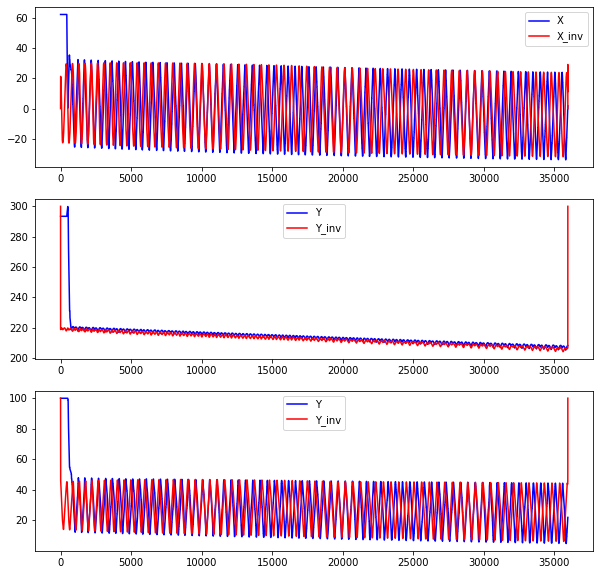

In [22]:
subplotter(0,df_p.shape[0],X,Y,Z,X_inv,Y_inv,Z_inv)

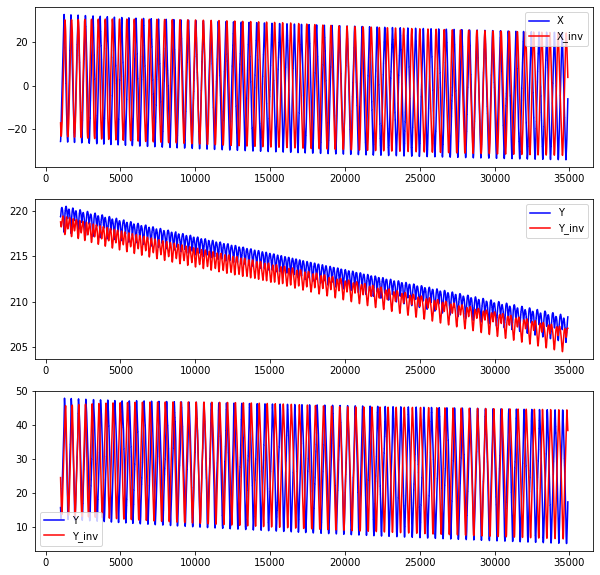

In [23]:
subplotter(1000,34900,X,Y,Z,X_inv,Y_inv,Z_inv)

In [24]:
subplotter(20000,21000,X,Y,Z,X_inv,Y_inv,Z_inv)

In [25]:
"""
range1 = np.arange(1000,34900)
X = X[range1]
Y = Y[range1]
Z = Z[range1]

tool_tip_X = tool_tip_X[range1]
tool_tip_Y = tool_tip_Y[range1]
tool_tip_Z = tool_tip_Z[range1]
 
X_inv = tool_tip_X
Y_inv = tool_tip_Y
Z_inv = tool_tip_Z
"""

'\nrange1 = np.arange(1000,34900)\nX = X[range1]\nY = Y[range1]\nZ = Z[range1]\n\ntool_tip_X = tool_tip_X[range1]\ntool_tip_Y = tool_tip_Y[range1]\ntool_tip_Z = tool_tip_Z[range1]\n \nX_inv = tool_tip_X\nY_inv = tool_tip_Y\nZ_inv = tool_tip_Z\n'

In [26]:
# Best Version
lst1 = []
lst2 = []

dist  = np.zeros(len(tool_tip_X))
print('Enter the tolerance number value, example 3 mm')
tol = input()

count = 0 
k = 5

for i in np.arange(len(X)):   # 47917
    
    dist = (((tool_tip_X-X[i])**2+(tool_tip_Y-Y[i])**2+(tool_tip_Z-Z[i])**2)**(1/2))
    
    pos = np.argpartition(dist, k)
    pos = pos[:k]
    min_val = dist[pos]
    #print(pos,min_val)
    
    pos = pos[np.argmin(abs(pos - i))]
    min_val = dist[pos]
    
    #print(i,pos,min_val)
    if(abs(min_val<=float(tol))): 
        lst1.append(pos)
        lst2.append(min_val)
        count = count+1
        print(i,pos,min_val,count)
    else:
        lst1.append(np.nan)
        lst2.append(np.nan)
   

Enter the tolerance number value, example 3 mm
3
772 2225 2.554517259233814 1
773 1784 2.2330138657364773 2
774 1784 2.2330138657364773 3
775 1786 2.1289326274917735 4
776 1787 2.0850934346190453 5
777 1787 2.0850934346190453 6
778 1788 2.0724039206843163 7
779 1788 2.0724039206843163 8
780 1789 2.0704993834203322 9
781 1789 2.0704993834203322 10
782 8 1.936567801994461 11
783 8 1.936567801994461 12
784 8 1.936567801994461 13
785 8 1.936567801994461 14
786 8 1.936567801994461 15
787 8 1.936567801994461 16
788 8 1.936567801994461 17
789 8 1.936567801994461 18
790 8 1.936567801994461 19
791 8 1.936567801994461 20
792 8 1.936567801994461 21
793 8 1.936567801994461 22
794 8 1.936567801994461 23
795 9 0.9795075250972726 24
796 9 0.7463108123415914 25
797 11 1.2073603475269994 26
798 11 1.2073603475269994 27
799 12 1.423667804059331 28
800 14 1.6771950274604213 29
801 16 1.906976823374594 30
802 17 2.100710018104535 31
803 1356 2.125044400729144 32
804 1356 2.125044400729144 33
805 1357 2.11

1097 1154 1.4820288737654064 326
1098 1155 1.4754584491240668 327
1099 1156 1.4692830421716871 328
1100 1156 1.4692830421716871 329
1101 1157 1.4627848070745237 330
1102 1157 1.4627848070745237 331
1103 1159 1.4475163991123712 332
1104 1159 1.4475163991123712 333
1105 1161 1.4350730265432645 334
1106 1161 1.4350730265432645 335
1107 1162 1.475229611433027 336
1108 1162 1.475229611433027 337
1109 1163 1.4686558790236348 338
1110 1164 1.461314709520352 339
1111 1165 1.4549695375786527 340
1112 1166 1.4479439236178402 341
1113 1167 1.4343277886462478 342
1114 1168 1.4279569572925082 343
1115 1170 1.4147428397762765 344
1116 1170 1.4147428397762765 345
1117 1171 1.4081571446692958 346
1118 1172 1.3960968683501782 347
1119 1173 1.389769275991406 348
1120 1174 1.3837128757348194 349
1121 1175 1.3776973218453596 350
1122 1175 1.3776973218453596 351
1123 1176 1.3714492944790395 352
1124 1177 1.3607653561027708 353
1125 1179 1.3495336584027893 354
1126 1181 1.3379544241953474 355
1127 1181 1.33

1449 1458 1.7594929739167717 678
1450 1458 1.7594929739167717 679
1451 1460 1.7548700902009413 680
1452 1461 1.7651812147592636 681
1453 1463 1.7764202128206028 682
1454 1466 1.8232275031649219 683
1455 1466 1.8232275031649219 684
1456 1468 1.8495717823406685 685
1457 1470 1.8791795805302995 686
1458 1471 1.9270697605891713 687
1459 1472 1.9856367022388677 688
1460 1474 2.023696165829118 689
1461 1476 2.0877898403766957 690
1462 1476 2.0877898403766957 691
1463 1479 2.1642426379256023 692
1464 1924 2.2371628793858345 693
1465 1927 2.2978421817950676 694
1466 1929 2.3704134728147555 695
1467 1929 2.3704134728147555 696
1468 2374 2.4166267805769537 697
1469 2374 2.4166267805769537 698
1470 2378 2.5252751109656493 699
1471 2378 2.5252751109656493 700
1472 2824 2.5722104234629684 701
1473 2826 2.603039676297707 702
1474 2828 2.631268162529084 703
1475 2828 2.631268162529084 704
1476 2828 2.631268162529084 705
1477 2830 2.657550414385423 706
1478 2833 2.6942791791669634 707
1479 2833 2.6942

1766 1811 1.9017589006558429 995
1767 1812 1.8764496146288352 996
1768 1813 1.8681382172742724 997
1769 1813 1.8964810866362183 998
1770 1814 1.8755286376975766 999
1771 1814 1.8755286376975766 1000
1772 1814 1.9197459193460602 1001
1773 1815 1.888798874909543 1002
1774 1815 1.888798874909543 1003
1775 1816 1.912799862636927 1004
1776 1816 1.912799862636927 1005
1777 1817 1.886204642137048 1006
1778 1818 1.8762172878475427 1007
1779 1818 1.9020917819835204 1008
1780 1819 1.882006090893026 1009
1781 1820 1.8797591786441645 1010
1782 1820 1.8797591786441645 1011
1783 1820 1.897673441054134 1012
1784 1821 1.881027729518961 1013
1785 1821 1.9161876593127742 1014
1786 1822 1.8909178552139065 1015
1787 1823 1.9096328675046943 1016
1788 1824 1.8862839199824681 1017
1789 1825 1.900135306829521 1018
1790 1825 1.900135306829521 1019
1791 1826 1.8847798615908258 1020
1792 1826 1.9222215372115847 1021
1793 1828 1.8839520101421292 1022
1794 1828 1.8839520101421292 1023
1795 1829 1.8887709769773926 

2071 2083 1.0799694565668776 1300
2072 2083 1.0799694565668776 1301
2073 2085 1.0735381008458589 1302
2074 2085 1.0735381008458589 1303
2075 2086 1.0704279380906971 1304
2076 2086 1.0704279380906971 1305
2077 2087 1.0683335565936705 1306
2078 2089 1.0624859372414022 1307
2079 2089 1.0624859372414022 1308
2080 2090 1.0594201861747652 1309
2081 2090 1.0879210569886029 1310
2082 2091 1.0778111211982562 1311
2083 2092 1.0738635232327656 1312
2084 2092 1.0738635232327656 1313
2085 2094 1.0657677058500803 1314
2086 2094 1.0657677058500803 1315
2087 2095 1.0618792700669317 1316
2088 2095 1.0618792700669317 1317
2089 2097 1.0497682981900198 1318
2090 2097 1.0497682981900198 1319
2091 2098 1.0462068202071262 1320
2092 2098 1.0462068202071262 1321
2093 2100 1.039269905567883 1322
2094 2101 1.0334387528702447 1323
2095 2102 1.0304634416846439 1324
2096 2103 1.0273069163923945 1325
2097 2103 1.0273069163923945 1326
2098 2103 1.0273069163923945 1327
2099 2105 1.0220696906340812 1328
2100 2105 1.022

2405 2818 2.292329661326948 1634
2406 2820 2.3633181364247036 1635
2407 2820 2.3633181364247036 1636
2408 3275 2.413327171520576 1637
2409 3277 2.468468861719448 1638
2410 3277 2.468468861719448 1639
2411 3279 2.523541043287269 1640
2412 3279 2.523541043287269 1641
2413 3748 2.6020000651026503 1642
2414 3748 2.6020000651026503 1643
2415 3749 2.643229476375421 1644
2416 3751 2.663161202540273 1645
2417 3751 2.663161202540273 1646
2418 3752 2.6890940470582754 1647
2419 3752 2.6890940470582754 1648
2420 3754 2.6950893360466215 1649
2421 3754 2.6950893360466215 1650
2422 3755 2.702214998814201 1651
2423 3755 2.702214998814201 1652
2424 3757 2.693056031652215 1653
2425 3758 2.679797133749033 1654
2426 3758 2.679797133749033 1655
2427 3759 2.659813266157289 1656
2428 3760 2.634254200678821 1657
2429 3761 2.605036830492329 1658
2430 3763 2.552160363678672 1659
2431 3763 2.552160363678672 1660
2432 3763 2.552160363678672 1661
2433 3298 2.5198930473519425 1662
2434 3298 2.5198930473519425 1663


2724 2691 1.6014526198689774 1953
2725 2692 1.6294775725222737 1954
2726 2692 1.6294775725222737 1955
2727 2694 1.6314786348156296 1956
2728 2694 1.6007387829136486 1957
2729 2695 1.6085286025889625 1958
2730 2695 1.6085286025889625 1959
2731 2696 1.6064589895011476 1960
2732 2696 1.6064589895011476 1961
2733 2697 1.6190841688746056 1962
2734 2697 1.6190841688746056 1963
2735 2698 1.614078087552405 1964
2736 2698 1.614078087552405 1965
2737 2699 1.6351992894806395 1966
2738 2699 1.6351992894806395 1967
2739 2700 1.6227747946544107 1968
2740 2701 1.6212333292643406 1969
2741 2703 1.6696229893196264 1970
2742 2704 1.629376416464716 1971
2743 2706 1.6648456811275916 1972
2744 2706 1.6336743234438802 1973
2745 2707 1.6468624022738028 1974
2746 2707 1.6468624022738028 1975
2747 2708 1.6846481257644308 1976
2748 2708 1.6396684814013243 1977
2749 2709 1.6605928186344385 1978
2750 2710 1.7002987799192613 1979
2751 2710 1.7002987799192613 1980
2752 2710 1.6466124518740461 1981
2753 2711 1.67746

3065 2524 0.8982250900640169 2294
3066 2524 0.8982250900640169 2295
3067 2525 0.8955617308900783 2296
3068 2526 0.8974246033756513 2297
3069 2527 0.8943381957709454 2298
3070 2528 0.8918578645166929 2299
3071 2529 0.889327820611065 2300
3072 2529 0.889327820611065 2301
3073 2530 0.8872212652885578 2302
3074 2531 0.890870309349583 2303
3075 2532 0.8886550794568032 2304
3076 2533 0.886776355038698 2305
3077 2534 0.884703832571258 2306
3078 2534 0.884703832571258 2307
3079 2536 0.8889813211241239 2308
3080 2537 0.8876116650466334 2309
3081 2538 0.8868749625895433 2310
3082 2538 0.8868749625895433 2311
3083 2539 0.853320352459144 2312
3084 2539 0.853320352459144 2313
3085 2539 0.853320352459144 2314
3086 2541 0.8464583916611917 2315
3087 2541 0.8464583916611917 2316
3088 2542 0.8443571095274981 2317
3089 2543 0.8416699510103619 2318
3090 2543 0.8416699510103619 2319
3091 2544 0.8397887696595293 2320
3092 2545 0.8382190591880082 2321
3093 2546 0.8363168837778726 2322
3094 2546 0.83631688377

3401 2810 1.8140486634244082 2630
3402 3263 1.876348296930771 2631
3403 3265 1.9292930632071204 2632
3404 3267 1.9872069545324058 2633
3405 3269 2.056543082328516 2634
3406 3270 2.1223934487674225 2635
3407 3272 2.2071513493475763 2636
3408 3272 2.2071513493475763 2637
3409 3739 2.2689033437586343 2638
3410 3739 2.2689033437586343 2639
3411 3741 2.3387647291924876 2640
3412 3743 2.4086736819933767 2641
3413 4217 2.46884863617487 2642
3414 4217 2.46884863617487 2643
3415 4219 2.5169944386873158 2644
3416 4219 2.5169944386873158 2645
3417 4219 2.5169944386873158 2646
3418 4223 2.6126363416696408 2647
3419 4223 2.6126363416696408 2648
3420 4704 2.637741419092758 2649
3421 4704 2.637741419092758 2650
3422 4705 2.6750796950902336 2651
3423 4705 2.6750796950902336 2652
3424 4707 2.685076146236864 2653
3425 4709 2.694486264280264 2654
3426 4710 2.7020587358602794 2655
3427 4710 2.7020587358602794 2656
3428 4711 2.702046431899259 2657
3429 4711 2.702046431899259 2658
3430 4713 2.68600623317718

3706 3142 1.398930089479924 2935
3707 3142 1.398930089479924 2936
3708 3144 1.3953255143818881 2937
3709 3144 1.3953255143818881 2938
3710 3145 1.408391698240627 2939
3711 3146 1.402186743368526 2940
3712 3148 1.4381112417369222 2941
3713 3148 1.398945596854836 2942
3714 3148 1.398945596854836 2943
3715 3150 1.4551044379617581 2944
3716 3150 1.4551044379617581 2945
3717 3150 1.405023069492117 2946
3718 3150 1.405023069492117 2947
3719 3151 1.4329530758860656 2948
3720 3151 1.4329530758860656 2949
3721 3152 1.415427397625244 2950
3722 3152 1.415427397625244 2951
3723 3153 1.4091524806384121 2952
3724 3153 1.4091524806384121 2953
3725 3154 1.4292995460662579 2954
3726 3154 1.4133919068205303 2955
3727 3154 1.4133919068205303 2956
3728 3155 1.4162654459590356 2957
3729 3155 1.4162654459590356 2958
3730 3156 1.414896724118683 2959
3731 3156 1.414896724118683 2960
3732 3157 1.4266313814256 2961
3733 3157 1.4266313814256 2962
3734 3158 1.4180760398884193 2963
3735 3158 1.4180760398884193 296

4022 2969 0.7312401208689512 3251
4023 2969 0.7312401208689512 3252
4024 2971 0.7257692868381949 3253
4025 2971 0.7257692868381949 3254
4026 2973 0.7304202043357124 3255
4027 2973 0.7304202043357124 3256
4028 2975 0.72580245586584 3257
4029 2975 0.72580245586584 3258
4030 2976 0.7238696770389124 3259
4031 2976 0.7238696770389124 3260
4032 2977 0.7220252764914374 3261
4033 2978 0.7306400623638486 3262
4034 2979 0.7292760360105677 3263
4035 2980 0.7282752704202908 3264
4036 2980 0.7282752704202908 3265
4037 2981 0.7271706381357066 3266
4038 2981 0.7271706381357066 3267
4039 2983 0.7376375941201126 3268
4040 2983 0.7376375941201126 3269
4041 2984 0.7375784654689435 3270
4042 2985 0.7375798720848368 3271
4043 2985 0.7375798720848368 3272
4044 2985 0.6684253532911206 3273
4045 2986 0.6667066293988453 3274
4046 2988 0.6636827041034692 3275
4047 2988 0.6636827041034692 3276
4048 2989 0.6627371810228292 3277
4049 2990 0.6614945863828465 3278
4050 2990 0.6614945863828465 3279
4051 2991 0.660203

4364 5195 2.6195123826579256 3593
4365 5197 2.6617502995632027 3594
4366 5197 2.6617502995632027 3595
4367 5692 2.67027724852541 3596
4368 5692 2.67027724852541 3597
4369 5693 2.695920029905241 3598
4370 5693 2.695920029905241 3599
4371 5695 2.699836377086541 3600
4372 5695 2.699836377086541 3601
4373 5696 2.706828774697699 3602
4374 5696 2.706828774697699 3603
4375 5698 2.6999872746687688 3604
4376 5698 2.6999872746687688 3605
4377 5700 2.6677860644277747 3606
4378 5701 2.6441699701298123 3607
4379 5702 2.6158070722651092 3608
4380 5702 2.6158070722651092 3609
4381 5209 2.57906031875686 3610
4382 5209 2.57906031875686 3611
4383 5210 2.5298594007250133 3612
4384 5210 2.5298594007250133 3613
4385 5211 2.479431328063624 3614
4386 5211 2.479431328063624 3615
4387 5213 2.4117849261923925 3616
4388 5213 2.4117849261923925 3617
4389 4723 2.3655317592627463 3618
4390 4723 2.3655317592627463 3619
4391 4726 2.2157630391583334 3620
4392 4726 2.2157630391583334 3621
4393 4726 2.2157630391583334 3

4724 4115 1.2846003034003612 3953
4725 3643 1.2197404920356096 3954
4726 3644 1.2061007749924606 3955
4727 3644 1.2061007749924606 3956
4728 3646 1.205618768155674 3957
4729 3646 1.2181396538331295 3958
4730 4120 1.2815181086325678 3959
4731 3648 1.2084559129399293 3960
4732 3648 1.2132141574979476 3961
4733 3649 1.1990725549407684 3962
4734 3650 1.204509240498967 3963
4735 3650 1.204509240498967 3964
4736 3651 1.1974638198594636 3965
4737 3652 1.2141179002222562 3966
4738 3652 1.2004391665692742 3967
4739 3653 1.1979242403239534 3968
4740 3654 1.1942116960213038 3969
4741 3655 1.1970374675692221 3970
4742 3656 1.19022492287682 3971
4743 3657 1.2002243253458709 3972
4744 3657 1.2002243253458709 3973
4745 3657 1.1989895280726208 3974
4746 3659 1.2005321787530212 3975
4747 3659 1.1908510248981767 3976
4748 3659 1.1908510248981767 3977
4749 3661 1.206703355695045 3978
4750 3661 1.1864337625245127 3979
4751 3661 1.1864337625245127 3980
4752 3662 1.185427672784157 3981
4753 3662 1.199555110

5076 3050 0.4599362908221492 4305
5077 3052 0.4937749247591087 4306
5078 3054 0.5061943763254647 4307
5079 3054 0.5061943763254647 4308
5080 3057 0.5770604545857266 4309
5081 3059 0.6001858014182466 4310
5082 3059 0.6001858014182466 4311
5083 3061 0.6338131289322168 4312
5084 3061 0.6338131289322168 4313
5085 3063 0.6750122315959177 4314
5086 3063 0.6750122315959177 4315
5087 3068 0.8122786996200536 4316
5088 3068 0.8122786996200536 4317
5089 3070 0.8605398336123148 4318
5090 3070 0.8605398336123148 4319
5091 3071 0.8725796291373304 4320
5092 3071 0.8725796291373304 4321
5093 3075 0.9634976951532795 4322
5094 3529 1.0234137849633436 4323
5095 3529 1.0234137849633436 4324
5096 3529 1.0234137849633436 4325
5097 3531 1.0540689753641155 4326
5098 3531 1.0540689753641155 4327
5099 3533 1.0807413998945865 4328
5100 3535 1.103920819481603 4329
5101 3535 1.103920819481603 4330
5102 3537 1.1234837286327235 4331
5103 3537 1.1234837286327235 4332
5104 3540 1.1369683358608589 4333
5105 3542 1.1392

5409 3823 0.7537764891838886 4638
5410 3824 0.7477351275215891 4639
5411 3824 0.7477351275215891 4640
5412 3826 0.7362724826054496 4641
5413 3826 0.7362724826054496 4642
5414 3827 0.7401286749039484 4643
5415 3828 0.7347219481295563 4644
5416 3829 0.7289707727180686 4645
5417 3829 0.7289707727180686 4646
5418 3831 0.7176642683674684 4647
5419 3831 0.7176642683674684 4648
5420 3832 0.7233992614487701 4649
5421 3833 0.7180919128266023 4650
5422 3834 0.7124209027317772 4651
5423 3835 0.7072072421251094 4652
5424 3835 0.7072072421251094 4653
5425 3836 0.7018982696908292 4654
5426 3836 0.6684925126754877 4655
5427 3837 0.6641052662740139 4656
5428 3838 0.659813140967955 4657
5429 3840 0.6513161639945079 4658
5430 3841 0.6437531664043792 4659
5431 3842 0.63936829166922 4660
5432 3842 0.63936829166922 4661
5433 3844 0.6309942888173066 4662
5434 3845 0.6269724404759754 4663
5435 3846 0.6210453058552501 4664
5436 3846 0.6210453058552501 4665
5437 3847 0.6168875426692128 4666
5438 3848 0.6127957

5696 4123 0.9885275407602707 4925
5697 4125 1.0371552223138767 4926
5698 4125 1.0371552223138767 4927
5699 4125 0.9856710350394273 4928
5700 4126 0.9988944420060029 4929
5701 4126 0.9912732471319758 4930
5702 4127 0.9840171507511661 4931
5703 4128 1.0051101966677571 4932
5704 4128 0.9866064490372212 4933
5705 4130 1.013982369375729 4934
5706 4130 1.013982369375729 4935
5707 4130 0.9799070818992708 4936
5708 4131 0.9834224779188466 4937
5709 4132 1.015423969476588 4938
5710 4132 0.9764980448748313 4939
5711 4132 0.9764980448748313 4940
5712 4134 1.027288262962888 4941
5713 4134 0.9729271554030027 4942
5714 4135 0.9823822085692979 4943
5715 4136 0.9718617733080908 4944
5716 4137 0.995264505518606 4945
5717 4138 0.97052345866473 4946
5718 4138 0.97052345866473 4947
5719 4139 0.996887481978016 4948
5720 4139 0.9678542812886872 4949
5721 4140 0.9733041619883775 4950
5722 4141 1.008066405420729 4951
5723 4141 0.9647289407414699 4952
5724 4142 0.9735420530396859 4953
5725 4142 0.9743413950980

6009 3945 0.46652098315436996 5238
6010 3945 0.46652098315436996 5239
6011 3946 0.4784669629793409 5240
6012 3947 0.4914342915951882 5241
6013 3948 0.5048367901093475 5242
6014 3949 0.5185283359338436 5243
6015 3950 0.5384847230816074 5244
6016 3951 0.5534773220551067 5245
6017 3952 0.5658538074400946 5246
6018 3953 0.5409077761799583 5247
6019 3953 0.5409077761799583 5248
6020 3956 0.4631184770491427 5249
6021 3956 0.4631184770491427 5250
6022 3958 0.4427311023144948 5251
6023 3958 0.4427311023144948 5252
6024 3959 0.42497613100350956 5253
6025 3960 0.41927865563861805 5254
6026 3962 0.41619349153147134 5255
6027 3497 0.38148824202067755 5256
6028 3497 0.38148824202067755 5257
6029 3500 0.3499785705406818 5258
6030 3500 0.3499785705406818 5259
6031 3503 0.30326399285972944 5260
6032 3503 0.30326399285972944 5261
6033 3506 0.35513927602611506 5262
6034 3508 0.3356441727078821 5263
6035 3508 0.3356441727078821 5264
6036 3513 0.39863781180744984 5265
6037 3513 0.39863781180744984 5266
60

6358 4283 0.691056855885176 5587
6359 4285 0.6779438617597338 5588
6360 4288 0.6755857271987178 5589
6361 4288 0.6755857271987178 5590
6362 4290 0.6632307625706818 5591
6363 4291 0.657059676182689 5592
6364 4291 0.657059676182689 5593
6365 4292 0.5771631720173667 5594
6366 4292 0.5771631720173667 5595
6367 4295 0.6513782837294901 5596
6368 4295 0.6513782837294901 5597
6369 4295 0.6513782837294901 5598
6370 4296 0.6453216194685053 5599
6371 4296 0.5560031155170838 5600
6372 4297 0.5504823385691481 5601
6373 4298 0.5447350178749041 5602
6374 4299 0.5394655607937208 5603
6375 4300 0.5341072133533094 5604
6376 4302 0.5268761272697101 5605
6377 4302 0.5268761272697101 5606
6378 4303 0.5217834291642919 5607
6379 4303 0.5217834291642919 5608
6380 4304 0.516538082930582 5609
6381 4305 0.5112040665632308 5610
6382 4306 0.5116953685674369 5611
6383 4307 0.5064646258877139 5612
6384 4308 0.5011679015459326 5613
6385 4310 0.4912449955789201 5614
6386 4310 0.4912449955789201 5615
6387 4311 0.493868

6701 4606 0.8505789554300803 5930
6702 4606 0.8505789554300803 5931
6703 4606 0.7817083882522878 5932
6704 4606 0.7817083882522878 5933
6705 4607 0.8005869535201587 5934
6706 4608 0.8524712198929981 5935
6707 4608 0.7805781961080442 5936
6708 4609 0.8088709979216196 5937
6709 4610 0.7785097263690612 5938
6710 4610 0.7785097263690612 5939
6711 4611 0.8098498971107246 5940
6712 4611 0.7748264560983673 5941
6713 4612 0.7811092141181772 5942
6714 4613 0.7711844905737233 5943
6715 4615 0.7674705612775828 5944
6716 4617 0.8410560554247952 5945
6717 4618 0.7690426630924553 5946
6718 4620 0.7997513609920771 5947
6719 4621 0.7709683696911424 5948
6720 4621 0.7709683696911424 5949
6721 4623 0.7900934294699238 5950
6722 4623 0.7900934294699238 5951
6723 4625 0.8196615753525432 5952
6724 4625 0.8196615753525432 5953
6725 4626 0.7818034887118431 5954
6726 4626 0.7818034887118431 5955
6727 4626 0.7818034887118431 5956
6728 4627 0.757811690345899 5957
6729 4628 0.7570351283150157 5958
6730 4629 0.759

7033 4902 0.4131212471673768 6262
7034 4903 0.42012126864480503 6263
7035 4904 0.42650705926352867 6264
7036 4905 0.4202670223177826 6265
7037 4905 0.4202670223177826 6266
7038 4906 0.40739794886253433 6267
7039 4906 0.40739794886253433 6268
7040 4429 0.3389750440302422 6269
7041 4431 0.28372201956528265 6270
7042 4433 0.3231812049622836 6271
7043 4434 0.2634279277729427 6272
7044 4437 0.2633808176471826 6273
7045 4438 0.2038205240411721 6274
7046 4441 0.19575815108184766 6275
7047 4443 0.22939640602072833 6276
7048 4445 0.23308584316536715 6277
7049 4449 0.2076519789870712 6278
7050 4449 0.2076519789870712 6279
7051 4451 0.22322890301545611 6280
7052 4454 0.22863670798742486 6281
7053 4454 0.22863670798742486 6282
7054 4456 0.23036642364546406 6283
7055 4458 0.2443511148455019 6284
7056 4458 0.2443511148455019 6285
7057 4463 0.29151134804027107 6286
7058 4465 0.3062918562821855 6287
7059 4465 0.3062918562821855 6288
7060 4465 0.3062918562821855 6289
7061 4469 0.3484816229768771 6290
7

7351 5243 0.7168653859547892 6580
7352 5243 0.65909947623905 6581
7353 5243 0.65909947623905 6582
7354 5244 0.6313495820472925 6583
7355 5244 0.6313495820472925 6584
7356 5246 0.593248157797298 6585
7357 5246 0.593248157797298 6586
7358 5248 0.5795930990623602 6587
7359 5248 0.5795930990623602 6588
7360 5249 0.5735693962978704 6589
7361 5249 0.5735693962978704 6590
7362 5251 0.5619879576803585 6591
7363 5251 0.5619879576803585 6592
7364 5252 0.5559569438496214 6593
7365 5253 0.550149925401843 6594
7366 5254 0.5443689538431783 6595
7367 5255 0.5388307980636925 6596
7368 5256 0.5363922571437646 6597
7369 5257 0.530760454887382 6598
7370 5258 0.5253433719686892 6599
7371 5258 0.5253433719686892 6600
7372 5259 0.5199228139282341 6601
7373 5260 0.5145182140435063 6602
7374 5261 0.5148455710934131 6603
7375 5262 0.5096471161676276 6604
7376 5262 0.5096471161676276 6605
7377 5262 0.5096471161676276 6606
7378 5264 0.49905666018926353 6607
7379 5264 0.49905666018926353 6608
7380 5265 0.49419410

7649 5561 0.6903318483849601 6878
7650 5561 0.6903318483849601 6879
7651 5562 0.701038293149114 6880
7652 5563 0.7514360699381328 6881
7653 5563 0.7514360699381328 6882
7654 5563 0.6849276638881814 6883
7655 5564 0.7091745698879695 6884
7656 5565 0.7701778729990525 6885
7657 5565 0.6821919359377637 6886
7658 5565 0.6821919359377637 6887
7659 5566 0.710559394372828 6888
7660 5566 0.710559394372828 6889
7661 5566 0.6898451014322599 6890
7662 5567 0.684344091482053 6891
7663 5567 0.684344091482053 6892
7664 5568 0.723533257424322 6893
7665 5568 0.6820528296422983 6894
7666 5569 0.6845510178158265 6895
7667 5569 0.6845510178158265 6896
7668 5570 0.7260136440977462 6897
7669 5570 0.7260136440977462 6898
7670 5571 0.6908440536238262 6899
7671 5571 0.6908440536238262 6900
7672 5572 0.6760101887386466 6901
7673 5572 0.6760101887386466 6902
7674 5573 0.6918714348351558 6903
7675 5573 0.689380677093591 6904
7676 5575 0.7017619090802892 6905
7677 5575 0.6861327543051343 6906
7678 5575 0.686132754

7974 5842 0.2588169493685203 7203
7975 5843 0.2605601283160096 7204
7976 5843 0.2605601283160096 7205
7977 5844 0.2692338752733722 7206
7978 5845 0.2721820077593471 7207
7979 5845 0.2721820077593471 7208
7980 5847 0.2796141323443749 7209
7981 5847 0.2796141323443749 7210
7982 5848 0.2841003742536976 7211
7983 5849 0.29991484107299665 7212
7984 5850 0.30567068359512484 7213
7985 5851 0.31201179478756247 7214
7986 5852 0.31914897309302387 7215
7987 5853 0.3269185648852913 7216
7988 5853 0.3269185648852913 7217
7989 5854 0.34890768799401084 7218
7990 5855 0.3580803528477065 7219
7991 5855 0.294611981538054 7220
7992 5855 0.294611981538054 7221
7993 5856 0.29433396698419345 7222
7994 5856 0.29433396698419345 7223
7995 5857 0.294969796132456 7224
7996 5857 0.294969796132456 7225
7997 5858 0.29331118233534625 7226
7998 5859 0.2958666109669931 7227
7999 5859 0.2958666109669931 7228
8000 5860 0.29950637568169125 7229
8001 5860 0.29950637568169125 7230
8002 5862 0.30890686243571003 7231
8003 58

8294 7185 1.745741189738727 7523
8295 7185 1.745741189738727 7524
8296 7697 1.8186127810056425 7525
8297 7699 1.8840300838131523 7526
8298 8214 2.022516883042593 7527
8299 8216 2.095237960470005 7528
8300 8218 2.1786515465994505 7529
8301 8219 2.245976261219911 7530
8302 8219 2.245976261219911 7531
8303 8221 2.3308995552411984 7532
8304 8221 2.3308995552411984 7533
8305 8222 2.402783309187884 7534
8306 8222 2.402783309187884 7535
8307 8737 2.5127539018599934 7536
8308 8737 2.5127539018599934 7537
8309 8738 2.5740585024088527 7538
8310 8738 2.5740585024088527 7539
8311 9255 2.607559425940516 7540
8312 9255 2.607559425940516 7541
8313 9256 2.653878516224756 7542
8314 9258 2.675321669310799 7543
8315 9259 2.704895633339296 7544
8316 9259 2.704895633339296 7545
8317 9261 2.714690965217129 7546
8318 9261 2.714690965217129 7547
8319 9262 2.7257397087670197 7548
8320 9262 2.7257397087670197 7549
8321 9263 2.728889400084845 7550
8322 9263 2.728889400084845 7551
8323 9265 2.7139385819306456 755

8560 5421 0.29829132134970787 7789
8561 5421 0.29829132134970787 7790
8562 5423 0.28791183380419827 7791
8563 5426 0.3391555365208827 7792
8564 5426 0.3391555365208827 7793
8565 5428 0.3126183591846239 7794
8566 5428 0.3126183591846239 7795
8567 5430 0.29259582238579424 7796
8568 5430 0.29259582238579424 7797
8569 5432 0.27894202979455934 7798
8570 5435 0.30766354252507366 7799
8571 5437 0.2790273842805 7800
8572 5437 0.2790273842805 7801
8573 5437 0.2790273842805 7802
8574 5439 0.2554695201858165 7803
8575 5441 0.23730568123496754 7804
8576 5443 0.22503261269048577 7805
8577 5446 0.25249622732157895 7806
8578 5446 0.25249622732157895 7807
8579 5450 0.20961460630700085 7808
8580 5450 0.20961460630700085 7809
8581 5452 0.19544867553249978 7810
8582 5454 0.1875999363718566 7811
8583 5454 0.1875999363718566 7812
8584 5454 0.1875999363718566 7813
8585 5456 0.1862092043615912 7814
8586 5459 0.22598698047046958 7815
8587 5461 0.2093265784967123 7816
8588 5461 0.2093265784967123 7817
8589 546

8904 6298 0.17661001817073593 8133
8905 6299 0.18372135993205876 8134
8906 6300 0.1801967353672598 8135
8907 6301 0.1769467435344077 8136
8908 6301 0.1769467435344077 8137
8909 6302 0.17364856238056484 8138
8910 6303 0.170619226532238 8139
8911 6304 0.1833915186449952 8140
8912 6304 0.1833915186449952 8141
8913 6306 0.17690327145530252 8142
8914 6306 0.17690327145530252 8143
8915 6307 0.1736583305895465 8144
8916 6307 0.1736583305895465 8145
8917 6309 0.18878039685215167 8146
8918 6309 0.18878039685215167 8147
8919 6311 0.1823743764170769 8148
8920 6312 0.17924923530211026 8149
8921 6818 0.3139029420114542 8150
8922 6821 0.30561426892214444 8151
8923 6822 0.305220501925705 8152
8924 6825 0.29685099531193715 8153
8925 6826 0.2942499720789936 8154
8926 6827 0.29797147129821994 8155
8927 6828 0.2951287387699701 8156
8928 6829 0.29237661668958137 8157
8929 6829 0.29237661668958137 8158
8930 6831 0.2868741418875409 8159
8931 6831 0.2868741418875409 8160
8932 6832 0.2946068716668959 8161
893

9226 6114 0.4118929870540292 8455
9227 6115 0.37381903743949774 8456
9228 6116 0.3484601957738023 8457
9229 6117 0.34145085945096537 8458
9230 6117 0.34145085945096537 8459
9231 6120 0.3691227380380343 8460
9232 6120 0.3691227380380343 8461
9233 6121 0.3473627600092951 8462
9234 6123 0.3449526185053348 8463
9235 6125 0.36830033718216404 8464
9236 6126 0.3498402227583666 8465
9237 6126 0.3498402227583666 8466
9238 6127 0.34668578033740355 8467
9239 6127 0.34668578033740355 8468
9240 6130 0.3713793618323073 8469
9241 6130 0.3713793618323073 8470
9242 6132 0.3536501650036299 8471
9243 6132 0.3536501650036299 8472
9244 6135 0.416226838499523 8473
9245 6136 0.3622141993113148 8474
9246 6136 0.3622141993113148 8475
9247 6138 0.4003292561199816 8476
9248 6139 0.37904449721617306 8477
9249 6140 0.37073437621811595 8478
9250 6140 0.37073437621811595 8479
9251 6141 0.37293737491235474 8480
9252 6141 0.37293737491235474 8481
9253 6144 0.3909202792946225 8482
9254 6145 0.38268595089472246 8483
925

9547 6425 0.48593727478162346 8776
9548 6425 0.48593727478162346 8777
9549 6428 0.4957394433248598 8778
9550 6428 0.4957394433248598 8779
9551 6430 0.4876188041536362 8780
9552 6430 0.4876188041536362 8781
9553 6432 0.48306186111020893 8782
9554 6432 0.48306186111020893 8783
9555 6437 0.4671268161047908 8784
9556 6437 0.4671268161047908 8785
9557 6437 0.4671268161047908 8786
9558 6439 0.4530214879618448 8787
9559 6441 0.44308256339002733 8788
9560 6441 0.44308256339002733 8789
9561 6444 0.43494540213429034 8790
9562 6446 0.4138302964201871 8791
9563 6446 0.4138302964201871 8792
9564 6448 0.3959955885513849 8793
9565 6450 0.38222132815313553 8794
9566 6450 0.38222132815313553 8795
9567 5955 0.33793761864023475 8796
9568 5955 0.33793761864023475 8797
9569 5957 0.29033290851676563 8798
9570 5957 0.29033290851676563 8799
9571 5957 0.29033290851676563 8800
9572 6459 0.3093530303168604 8801
9573 6461 0.29587183290519087 8802
9574 6461 0.29587183290519087 8803
9575 5964 0.2550028474890412 880

9876 7285 0.2835926239193454 9105
9877 7286 0.275174521509562 9106
9878 7287 0.27209860199312264 9107
9879 7288 0.2692117414539564 9108
9880 7288 0.2692117414539564 9109
9881 7289 0.26638616259566816 9110
9882 7289 0.26638616259566816 9111
9883 7291 0.26065436256200686 9112
9884 7291 0.26065436256200686 9113
9885 7293 0.2549458901519338 9114
9886 7293 0.2549458901519338 9115
9887 7295 0.24906420366874088 9116
9888 7295 0.24906420366874088 9117
9889 7296 0.2524555985264652 9118
9890 7296 0.2524555985264652 9119
9891 7298 0.24672960852576734 9120
9892 7298 0.24672960852576734 9121
9893 7300 0.24088275373338267 9122
9894 7300 0.24088275373338267 9123
9895 7301 0.25004500083075554 9124
9896 7302 0.24730387152099495 9125
9897 7303 0.24446936344385306 9126
9898 7304 0.2414885895873059 9127
9899 7304 0.2414885895873059 9128
9900 7306 0.2534908651794361 9129
9901 7307 0.2506202661378617 9130
9902 7309 0.2450330476497496 9131
9903 7310 0.24222677964384864 9132
9904 7310 0.24222677964384864 9133

10180 7595 0.40293285306900023 9409
10181 7596 0.4515504766959332 9410
10182 7596 0.4228234795968203 9411
10183 7597 0.40869975809487624 9412
10184 7087 0.40902609287720526 9413
10185 7088 0.32811155270411774 9414
10186 7088 0.32811155270411774 9415
10187 7089 0.4430021027753782 9416
10188 7089 0.4430021027753782 9417
10189 7600 0.41743527508036765 9418
10190 7090 0.33279460340453426 9419
10191 7091 0.29398358721012713 9420
10192 7091 0.29398358721012713 9421
10193 7093 0.3618072356282056 9422
10194 7093 0.2818006591476158 9423
10195 7094 0.28252977051508754 9424
10196 7094 0.28252977051508754 9425
10197 7095 0.26938418294859795 9426
10198 7095 0.26938418294859795 9427
10199 7097 0.3013372204817904 9428
10200 7097 0.3013372204817904 9429
10201 7099 0.35230325925477285 9430
10202 7100 0.3049490990206118 9431
10203 7104 0.29911543258500867 9432
10204 7106 0.27471964320173553 9433
10205 7110 0.2784199569183857 9434
10206 7111 0.28399417805906146 9435
10207 7113 0.31895086606068884 9436
10

10466 8387 0.3371656838611567 9695
10467 8388 0.3356072489810141 9696
10468 8388 0.3356072489810141 9697
10469 8389 0.32797704520525883 9698
10470 8389 0.32797704520525883 9699
10471 7877 0.16474115547376816 9700
10472 7877 0.16474115547376816 9701
10473 7878 0.17246983693967907 9702
10474 7878 0.17246983693967907 9703
10475 7879 0.18101944666744446 9704
10476 7879 0.18101944666744446 9705
10477 7880 0.19045784364980967 9706
10478 7880 0.19045784364980967 9707
10479 7882 0.22356380721818286 9708
10480 7882 0.22356380721818286 9709
10481 7882 0.22356380721818286 9710
10482 7884 0.24851557002166114 9711
10483 7884 0.24851557002166114 9712
10484 7885 0.26173391049260686 9713
10485 7886 0.29000368541514404 9714
10486 7886 0.29000368541514404 9715
10487 7888 0.3187037821446874 9716
10488 7888 0.3187037821446874 9717
10489 7890 0.34875963581844927 9718
10490 7891 0.23552391671149908 9719
10491 7891 0.23552391671149908 9720
10492 7892 0.24126312200424432 9721
10493 7893 0.2476786808882394 972

10782 10290 2.057810360929449 10011
10783 10812 2.1236662763914174 10012
10784 10812 2.1236662763914174 10013
10785 10817 2.3581886923930004 10014
10786 10821 2.49554690963333 10015
10787 11344 2.54770789042688 10016
10788 11346 2.5906459060862144 10017
10789 11349 2.674199133637349 10018
10790 11877 2.6873455300135283 10019
10791 11878 2.7115977354137786 10020
10792 11878 2.7115977354137786 10021
10793 11879 2.7295138451462635 10022
10794 11879 2.7295138451462635 10023
10795 11879 2.7295138451462635 10024
10796 11880 2.740941680439054 10025
10797 11880 2.740941680439054 10026
10798 11882 2.720972582016934 10027
10799 11882 2.720972582016934 10028
10800 11883 2.7134349376688376 10029
10801 11884 2.699493900220008 10030
10802 11886 2.6579978665715855 10031
10803 11886 2.6579978665715855 10032
10804 11362 2.5859879561746046 10033
10805 11362 2.5859879561746046 10034
10806 11362 2.5859879561746046 10035
10807 11363 2.536097694721989 10036
10808 11363 2.536097694721989 10037
10809 11364 2.

11060 7976 0.6617676626215411 10289
11061 7979 0.6483366149217078 10290
11062 7979 0.6483366149217078 10291
11063 7979 0.6483366149217078 10292
11064 7983 0.5807320436931515 10293
11065 7983 0.5807320436931515 10294
11066 7983 0.5807320436931515 10295
11067 7985 0.5501492217842734 10296
11068 7477 0.5168854431323965 10297
11069 7479 0.4525744217248721 10298
11070 7479 0.4525744217248721 10299
11071 7992 0.434435830279039 10300
11072 7992 0.434435830279039 10301
11073 7483 0.3198018277581402 10302
11074 7996 0.36141705375093924 10303
11075 7997 0.3350518429178861 10304
11076 7999 0.2997033669446892 10305
11077 8000 0.2759590375669511 10306
11078 8000 0.2759590375669511 10307
11079 7491 0.2188617136341117 10308
11080 8003 0.2243040817697421 10309
11081 8006 0.2291656453511179 10310
11082 8006 0.2291656453511179 10311
11083 8007 0.22741966142654294 10312
11084 8008 0.25056389328203976 10313
11085 8009 0.28705416154464747 10314
11086 8009 0.28705416154464747 10315
11087 8011 0.372515119808

11388 8322 0.33283609120565977 10617
11389 8322 0.33283609120565977 10618
11390 8324 0.33332130237370444 10619
11391 8324 0.33332130237370444 10620
11392 8838 0.3249993047625666 10621
11393 8839 0.32137915506745923 10622
11394 8840 0.3178035172811518 10623
11395 8840 0.3178035172811518 10624
11396 8841 0.3141529494921299 10625
11397 8841 0.3141529494921299 10626
11398 8843 0.2941743751430357 10627
11399 8844 0.2905485809622186 10628
11400 8844 0.2905485809622186 10629
11401 8846 0.28321273507891725 10630
11402 8847 0.27959128305244557 10631
11403 8847 0.27959128305244557 10632
11404 8847 0.27959128305244557 10633
11405 8849 0.26474196915308257 10634
11406 8849 0.26474196915308257 10635
11407 8851 0.2575242547148774 10636
11408 8851 0.2575242547148774 10637
11409 8852 0.25385974289617785 10638
11410 8852 0.25385974289617785 10639
11411 8853 0.2487336680541315 10640
11412 8854 0.24528755528066226 10641
11413 8855 0.24172184682090578 10642
11414 8856 0.2381645547361536 10643
11415 8857 0.

11709 8125 0.24939427944039655 10938
11710 8640 0.25473494788657164 10939
11711 8640 0.25473494788657164 10940
11712 8641 0.2623728584664885 10941
11713 8643 0.28370428567191597 10942
11714 8644 0.26449965538888354 10943
11715 8645 0.26644824832456654 10944
11716 8645 0.26644824832456654 10945
11717 8134 0.24339349618781078 10946
11718 8648 0.28501536536086103 10947
11719 8650 0.27948066741600064 10948
11720 8653 0.2813307426252338 10949
11721 8144 0.21319776817001304 10950
11722 8148 0.27094950653035765 10951
11723 8663 0.296759100067962 10952
11724 8152 0.2978985536985127 10953
11725 8152 0.2978985536985127 10954
11726 8154 0.1995724168556241 10955
11727 8668 0.30502579105614375 10956
11728 8157 0.2938288169890903 10957
11729 8157 0.2938288169890903 10958
11730 8159 0.17101647714774648 10959
11731 8160 0.14779529639182723 10960
11732 8162 0.29482263066467146 10961
11733 8163 0.23185093850353594 10962
11734 8165 0.13683988003148365 10963
11735 8165 0.13683988003148365 10964
11736 8165

12021 9453 0.36481344346581007 11250
12022 9454 0.3705849607898021 11251
12023 8938 0.3101509347518919 11252
12024 8938 0.3101509347518919 11253
12025 8940 0.3319307920407524 11254
12026 8940 0.3319307920407524 11255
12027 8941 0.3427302357690509 11256
12028 8941 0.3427302357690509 11257
12029 8942 0.3523502349307389 11258
12030 8943 0.3334630759306328 11259
12031 8944 0.3328202028185532 11260
12032 8944 0.3328202028185532 11261
12033 8946 0.23866874265009955 11262
12034 8946 0.23866874265009955 11263
12035 8949 0.1856538571926853 11264
12036 8949 0.1856538571926853 11265
12037 8951 0.22563875264999061 11266
12038 8952 0.24993516186835807 11267
12039 8952 0.24993516186835807 11268
12040 8953 0.2837942653769306 11269
12041 8954 0.3280797294336136 11270
12042 8956 0.41264710643128355 11271
12043 8957 0.4419385218352665 11272
12044 8960 0.5424938004356806 11273
12045 8960 0.5424938004356806 11274
12046 8962 0.6026151011090162 11275
12047 8962 0.6026151011090162 11276
12048 9481 0.69769193

12361 9827 0.6842180360918838 11590
12362 9828 0.6264307447420487 11591
12363 9829 0.5649360965333617 11592
12364 9829 0.5649360965333617 11593
12365 9311 0.4559740397865896 11594
12366 9311 0.4559740397865896 11595
12367 9313 0.4106259081054443 11596
12368 9313 0.4106259081054443 11597
12369 9313 0.4106259081054443 11598
12370 9314 0.23689075608752702 11599
12371 9314 0.23689075608752702 11600
12372 9316 0.23021158628818253 11601
12373 9316 0.23021158628818253 11602
12374 9318 0.23130812932775754 11603
12375 9318 0.23130812932775754 11604
12376 9319 0.24498252175819846 11605
12377 9320 0.24625704579050764 11606
12378 9321 0.24740830998741412 11607
12379 9322 0.24871689278612 11608
12380 9323 0.2501955169376024 11609
12381 9324 0.2738582922822287 11610
12382 9324 0.2738582922822287 11611
12383 9326 0.2784466125679866 11612
12384 9326 0.2784466125679866 11613
12385 9327 0.2809113646675184 11614
12386 9327 0.2809113646675184 11615
12387 9328 0.28312417373508886 11616
12388 9329 0.3130641

12586 9531 0.7186878707871579 11815
12587 9534 0.6883616436733315 11816
12588 9534 0.6883616436733315 11817
12589 9536 0.6255311649979157 11818
12590 9536 0.6255311649979157 11819
12591 9024 0.5064008907374057 11820
12592 9024 0.5064008907374057 11821
12593 9541 0.4697715052750818 11822
12594 9541 0.4697715052750818 11823
12595 9027 0.41918331559886146 11824
12596 9544 0.38278786211619015 11825
12597 9030 0.35030071592075895 11826
12598 9547 0.29810998947534245 11827
12599 9548 0.26461078893277773 11828
12600 9550 0.25899856449953673 11829
12601 9550 0.25899856449953673 11830
12602 9550 0.25899856449953673 11831
12603 9551 0.22647342926374128 11832
12604 9551 0.22647342926374128 11833
12605 9552 0.21971661969897563 11834
12606 9553 0.2332316018500703 11835
12607 9554 0.2433095090756516 11836
12608 9554 0.2433095090756516 11837
12609 9556 0.3364768899406322 11838
12610 9556 0.3364768899406322 11839
12611 9557 0.30664200294551225 11840
12612 9558 0.3131024234412921 11841
12613 9560 0.382

12923 9879 0.3628630269496306 12152
12924 10404 0.35879319916919766 12153
12925 10405 0.3541370953477795 12154
12926 9881 0.15752274886404505 12155
12927 9882 0.15468805645038933 12156
12928 9883 0.15183412337839894 12157
12929 9884 0.14897045957989102 12158
12930 9885 0.14630316458495554 12159
12931 9885 0.14630316458495554 12160
12932 9886 0.16238720187892836 12161
12933 9887 0.16062175382445587 12162
12934 10413 0.2979071231289217 12163
12935 10413 0.2979071231289217 12164
12936 10414 0.2937218372467354 12165
12937 10415 0.2895357939850001 12166
12938 10415 0.2895357939850001 12167
12939 10416 0.2847987858783125 12168
12940 10417 0.2809649747243855 12169
12941 10419 0.2736863114862164 12170
12942 10419 0.2736863114862164 12171
12943 10420 0.2702017021916491 12172
12944 10420 0.2702017021916491 12173
12945 10421 0.27328335900041223 12174
12946 10422 0.2702207967836615 12175
12947 10422 0.2702207967836615 12176
12948 10424 0.26445093277115994 12177
12949 10425 0.2616371349290225 12178

13158 10126 0.32628704599391656 12387
13159 10126 0.32628704599391656 12388
13160 10651 0.396400362459823 12389
13161 10129 0.3822445372237422 12390
13162 10654 0.3900869061185425 12391
13163 10655 0.38281784971678307 12392
13164 10656 0.381289468900014 12393
13165 10134 0.37508506755235277 12394
13166 10134 0.37508506755235277 12395
13167 10134 0.37508506755235277 12396
13168 10659 0.37817995087863054 12397
13169 10136 0.2903650035431111 12398
13170 10661 0.3666995273340583 12399
13171 10139 0.3649021301366271 12400
13172 10664 0.3663361218809306 12401
13173 10664 0.3663361218809306 12402
13174 10141 0.27379019359646845 12403
13175 10141 0.27379019359646845 12404
13176 10144 0.35213446118698766 12405
13177 10144 0.35213446118698766 12406
13178 10669 0.3551896098623372 12407
13179 10146 0.2556300013936454 12408
13180 10146 0.2556300013936454 12409
13181 10149 0.3148263833607918 12410
13182 10149 0.3148263833607918 12411
13183 10149 0.3148263833607918 12412
13184 10151 0.236694118470491

13390 10354 0.4747711024538354 12619
13391 10355 0.4168409543034754 12620
13392 10355 0.4168409543034754 12621
13393 10356 0.392691585877672 12622
13394 10357 0.3635949513388266 12623
13395 10358 0.3457826231513286 12624
13396 10358 0.3457826231513286 12625
13397 10359 0.27938008726139774 12626
13398 10360 0.25916346446958405 12627
13399 10361 0.2567879810793608 12628
13400 10361 0.2567879810793608 12629
13401 10362 0.25700488933882265 12630
13402 10362 0.25700488933882265 12631
13403 10364 0.25552826859505373 12632
13404 10364 0.25552826859505373 12633
13405 10366 0.25118801271324825 12634
13406 10366 0.25118801271324825 12635
13407 10367 0.2505760279402091 12636
13408 10368 0.2504269216123903 12637
13409 10369 0.2503129877592735 12638
13410 10370 0.26019903333219097 12639
13411 10372 0.26272220829525084 12640
13412 10372 0.26272220829525084 12641
13413 10372 0.26272220829525084 12642
13414 10374 0.2657736997969576 12643
13415 10374 0.2657736997969576 12644
13416 10376 0.2884944968806

13697 11190 0.3522444236536804 12926
13698 11190 0.3522444236536804 12927
13699 10671 0.3388620157218491 12928
13700 10671 0.3388620157218491 12929
13701 10673 0.2575858793467603 12930
13702 10674 0.22150090224906452 12931
13703 10674 0.22150090224906452 12932
13704 10676 0.3220046846268498 12933
13705 10677 0.26751426254792077 12934
13706 10678 0.238846142661536 12935
13707 10678 0.238846142661536 12936
13708 10679 0.20324771451930262 12937
13709 10682 0.2477980249341181 12938
13710 10682 0.2477980249341181 12939
13711 10683 0.20432119873369395 12940
13712 10683 0.20432119873369395 12941
13713 10686 0.2822355723141149 12942
13714 10686 0.2822355723141149 12943
13715 10686 0.2822355723141149 12944
13716 10687 0.2282200293946686 12945
13717 11210 0.36395499449003543 12946
13718 10689 0.26129042888499304 12947
13719 10689 0.26129042888499304 12948
13720 11212 0.3590163437698422 12949
13721 11212 0.3590163437698422 12950
13722 10691 0.2708610552904388 12951
13723 10691 0.2708610552904388 

13943 10907 0.2590314914540587 13172
13944 10908 0.2595892171351872 13173
13945 10909 0.2804464671781043 13174
13946 10910 0.28176053413768276 13175
13947 10910 0.28176053413768276 13176
13948 10911 0.28292819693087484 13177
13949 10913 0.28571115999775804 13178
13950 10913 0.28571115999775804 13179
13951 10913 0.24232595474190274 13180
13952 10914 0.2374055605890271 13181
13953 10915 0.23247894903419128 13182
13954 10916 0.22752008223772943 13183
13955 10918 0.3205775419591362 13184
13956 10918 0.20707962215501877 13185
13957 10920 0.35523169979920066 13186
13958 10921 0.3572684340812957 13187
13959 10921 0.3572684340812957 13188
13960 10923 0.3613056693143355 13189
13961 10923 0.1865668306387939 13190
13962 10923 0.1865668306387939 13191
13963 10925 0.18024319060770494 13192
13964 10925 0.18024319060770494 13193
13965 10926 0.17712665519068746 13194
13966 10927 0.17421983860398393 13195
13967 10928 0.18459576293918345 13196
13968 10929 0.18279997468142312 13197
13969 10930 0.18106177

14202 11179 0.30416567022461866 13431
14203 11182 0.35546220506448123 13432
14204 11182 0.35546220506448123 13433
14205 11183 0.32715223431026047 13434
14206 11183 0.32715223431026047 13435
14207 11184 0.2890750343036096 13436
14208 11185 0.26291696122386726 13437
14209 11187 0.3439055308735757 13438
14210 11188 0.29755613928166286 13439
14211 11189 0.2723388479257748 13440
14212 11190 0.243279799878953 13441
14213 11190 0.243279799878953 13442
14214 11192 0.33010858631317835 13443
14215 11192 0.33010858631317835 13444
14216 11194 0.24155420497873872 13445
14217 11194 0.24155420497873872 13446
14218 11194 0.24155420497873872 13447
14219 11198 0.26276414078824917 13448
14220 11199 0.2221764548807738 13449
14221 11202 0.2966065535905549 13450
14222 11204 0.2042584221934664 13451
14223 11207 0.25376248881908636 13452
14224 11208 0.22578927145434566 13453
14225 11731 0.3486593553122506 13454
14226 11731 0.3486593553122506 13455
14227 11733 0.365662711164813 13456
14228 11733 0.365662711164

14480 11451 0.2428464846718251 13709
14481 11453 0.24415918896608246 13710
14482 11455 0.27653010999577937 13711
14483 11455 0.27653010999577937 13712
14484 11456 0.27818720832912686 13713
14485 11457 0.27967432934054465 13714
14486 11458 0.28143079985938274 13715
14487 11458 0.28143079985938274 13716
14488 11460 0.31909182857698465 13717
14489 11460 0.31909182857698465 13718
14490 11462 0.3233960037481778 13719
14491 11462 0.3233960037481778 13720
14492 11463 0.32585499030988363 13721
14493 11463 0.32585499030988363 13722
14494 11464 0.32832048982582746 13723
14495 11991 0.3263878898913901 13724
14496 11992 0.32199782127584553 13725
14497 11992 0.32199782127584553 13726
14498 11994 0.3137657296360117 13727
14499 11995 0.3099153892943868 13728
14500 11995 0.3099153892943868 13729
14501 11469 0.12674003690384622 13730
14502 11469 0.12674003690384622 13731
14503 11471 0.12807415526616175 13732
14504 11471 0.12807415526616175 13733
14505 12000 0.2867427887187458 13734
14506 12001 0.283716

14807 11277 0.22499161246610072 14036
14808 11281 0.2590237682964253 14037
14809 11284 0.174253313327581 14038
14810 11288 0.1905727637649534 14039
14811 11288 0.1905727637649534 14040
14812 11290 0.17891870331417406 14041
14813 11292 0.18390620294196264 14042
14814 11292 0.18390620294196264 14043
14815 11294 0.1864116703422206 14044
14816 11294 0.1864116703422206 14045
14817 11296 0.1804552682439165 14046
14818 11296 0.1804552682439165 14047
14819 11298 0.24288238387206715 14048
14820 11298 0.24288238387206715 14049
14821 11300 0.18546488312716042 14050
14822 11301 0.1842403836126693 14051
14823 11301 0.1842403836126693 14052
14824 11304 0.23857971468597475 14053
14825 11304 0.23857971468597475 14054
14826 11305 0.22484249102012935 14055
14827 11306 0.21872168137794482 14056
14828 11306 0.21872168137794482 14057
14829 11309 0.3176024119929246 14058
14830 11309 0.3176024119929246 14059
14831 11310 0.3282907820479259 14060
14832 11312 0.44347993730967805 14061
14833 11313 0.428093370433

15044 12556 0.38075930413463493 14273
15045 12559 0.391745957605948 14274
15046 12560 0.39331846358032146 14275
15047 12560 0.39331846358032146 14276
15048 12562 0.3931845075973462 14277
15049 12562 0.3931845075973462 14278
15050 12563 0.3972849757070552 14279
15051 12563 0.3972849757070552 14280
15052 12565 0.4068405641778112 14281
15053 12565 0.4068405641778112 14282
15054 12038 0.3295968262173234 14283
15055 12038 0.3295968262173234 14284
15056 12039 0.3400069341327832 14285
15057 12039 0.3400069341327832 14286
15058 12040 0.35080677371402974 14287
15059 12041 0.36177471605306627 14288
15060 12041 0.36177471605306627 14289
15061 12041 0.36177471605306627 14290
15062 12043 0.39727509473392686 14291
15063 12044 0.4095767489822733 14292
15064 12045 0.42194314678199785 14293
15065 12045 0.42194314678199785 14294
15066 12047 0.44749708584845715 14295
15067 12047 0.44749708584845715 14296
15068 12047 0.44749708584845715 14297
15069 12048 0.36597837444671993 14298
15070 12049 0.37089489736

15264 12268 0.42508488381092274 14493
15265 12268 0.42508488381092274 14494
15266 12269 0.3286172516193643 14495
15267 12269 0.3286172516193643 14496
15268 12797 0.4428056018408656 14497
15269 12270 0.23812978772756518 14498
15270 12271 0.3424685640959678 14499
15271 12271 0.3424685640959678 14500
15272 12272 0.26715631051511407 14501
15273 12272 0.26715631051511407 14502
15274 12273 0.2337548628198775 14503
15275 12273 0.2337548628198775 14504
15276 12274 0.28156647036172916 14505
15277 12274 0.28156647036172916 14506
15278 12275 0.2448066939299725 14507
15279 12275 0.2448066939299725 14508
15280 12276 0.3181324183917214 14509
15281 12276 0.2777368776926014 14510
15282 12277 0.3520559104891208 14511
15283 12277 0.3520559104891208 14512
15284 12281 0.2670199022557711 14513
15285 12283 0.29019733691838223 14514
15286 11762 0.2827380700967939 14515
15287 11765 0.12632304360799215 14516
15288 11768 0.20086070822047924 14517
15289 11769 0.14611078724281018 14518
15290 11769 0.1461107872428

15586 12579 0.4734910862013463 14815
15587 12580 0.4838271341306485 14816
15588 12581 0.494343153574063 14817
15589 12582 0.5048397876827345 14818
15590 12583 0.5158669603101101 14819
15591 12583 0.4534663005648868 14820
15592 12584 0.45591517499378226 14821
15593 12585 0.45850174798799986 14822
15594 12585 0.45850174798799986 14823
15595 12586 0.4614586108641509 14824
15596 12586 0.4614586108641509 14825
15597 12588 0.4711092838629038 14826
15598 12588 0.4711092838629038 14827
15599 12590 0.4803598779278982 14828
15600 12590 0.4803598779278982 14829
15601 12592 0.490629529947517 14830
15602 12592 0.490629529947517 14831
15603 12593 0.5035362216866589 14832
15604 12594 0.50985316918449 14833
15605 12595 0.5165359674815778 14834
15606 12596 0.5226730547744202 14835
15607 12596 0.5226730547744202 14836
15608 12597 0.529000423656842 14837
15609 12597 0.47875762375763653 14838
15610 12598 0.47688467357986203 14839
15611 12600 0.47256529029917116 14840
15612 12601 0.47070919443440407 14841


15902 16153 2.4725191358244913 15131
15903 16153 2.4725191358244913 15132
15904 16154 2.4153370154843596 15133
15905 16154 2.4153370154843596 15134
15906 16156 2.3398153072479895 15135
15907 16156 2.3398153072479895 15136
15908 16157 2.2798630699850464 15137
15909 16157 2.2798630699850464 15138
15910 16159 2.2008602479660824 15139
15911 16159 2.2008602479660824 15140
15912 15625 2.104897334126888 15141
15913 15625 2.104897334126888 15142
15914 15626 2.044694601690567 15143
15915 15627 1.986066463211692 15144
15916 15092 1.9117027946942744 15145
15917 15094 1.7784795997487606 15146
15918 15094 1.7784795997487606 15147
15919 14562 1.635975243350027 15148
15920 14562 1.635975243350027 15149
15921 14563 1.559581437335718 15150
15922 14563 1.559581437335718 15151
15923 14564 1.4826854735176884 15152
15924 14564 1.4826854735176884 15153
15925 14032 1.3229141128958923 15154
15926 14034 1.2453056747694315 15155
15927 14035 1.175676267124058 15156
15928 14035 1.175676267124058 15157
15929 13506

16236 13307 0.37513970530039276 15465
16237 13308 0.3457209502609736 15466
16238 13309 0.30479563117378466 15467
16239 13309 0.30479563117378466 15468
16240 13310 0.2761543880596415 15469
16241 13312 0.3552017494332131 15470
16242 13313 0.3077880634793128 15471
16243 13313 0.3077880634793128 15472
16244 13314 0.284377819717994 15473
16245 13315 0.25744898714050385 15474
16246 13315 0.25744898714050385 15475
16247 13317 0.33423325987105673 15476
16248 13318 0.2874576657117356 15477
16249 13319 0.2545818940393756 15478
16250 13322 0.31333128584416414 15479
16251 13322 0.31333128584416414 15480
16252 13323 0.26979696151463134 15481
16253 13853 0.4070764635181333 15482
16254 13853 0.4070764635181333 15483
16255 13853 0.4070764635181333 15484
16256 13325 0.2943181445375495 15485
16257 13325 0.2943181445375495 15486
16258 13855 0.40862965971218707 15487
16259 13326 0.24025591283612707 15488
16260 13327 0.302334447627947 15489
16261 13327 0.302334447627947 15490
16262 13857 0.4158872535556195

16481 13558 0.26247000220426797 15710
16482 13559 0.26381060069664763 15711
16483 13559 0.26381060069664763 15712
16484 13560 0.2653222126189046 15713
16485 13560 0.2653222126189046 15714
16486 13562 0.2911443975955174 15715
16487 13563 0.2942544904127379 15716
16488 13563 0.2942544904127379 15717
16489 13565 0.301544020773454 15718
16490 13565 0.23518066874085752 15719
16491 13566 0.23048154725425257 15720
16492 13567 0.22634140457293483 15721
16493 13568 0.22250333939790587 15722
16494 13569 0.21916378343243156 15723
16495 13570 0.21196341346681594 15724
16496 13570 0.21196341346681594 15725
16497 13572 0.21013834641473536 15726
16498 13572 0.21013834641473536 15727
16499 13573 0.20997989491475405 15728
16500 13573 0.20997989491475405 15729
16501 13574 0.21022373198663385 15730
16502 13574 0.21022373198663385 15731
16503 13576 0.22159464479369348 15732
16504 13576 0.22159464479369348 15733
16505 13578 0.22781119454492574 15734
16506 13579 0.23134746925004826 15735
16507 13580 0.25329

16720 13829 0.4009839122962218 15949
16721 13831 0.3507490367726447 15950
16722 13832 0.33526868378783004 15951
16723 13832 0.33526868378783004 15952
16724 13834 0.38042816122491785 15953
16725 13835 0.34483451050463737 15954
16726 13835 0.34483451050463737 15955
16727 13836 0.32700022101447107 15956
16728 13837 0.3106905674429448 15957
16729 13839 0.35852897165306025 15958
16730 13839 0.35852897165306025 15959
16731 13841 0.2971911846168034 15960
16732 13841 0.2971911846168034 15961
16733 13841 0.2971911846168034 15962
16734 13844 0.3365845131310568 15963
16735 13844 0.3365845131310568 15964
16736 13845 0.29942588557081823 15965
16737 13846 0.2774814158986819 15966
16738 13848 0.34111654559295895 15967
16739 13848 0.34111654559295895 15968
16740 13849 0.3154622028606691 15969
16741 13850 0.2809357369557439 15970
16742 13850 0.2809357369557439 15971
16743 13853 0.31944602648915377 15972
16744 13853 0.31944602648915377 15973
16745 14385 0.42195475183554987 15974
16746 14385 0.4219547518

16981 14105 0.2409562363985674 16210
16982 14105 0.2409562363985674 16211
16983 14107 0.25810768081577984 16212
16984 14107 0.25810768081577984 16213
16985 14109 0.2671713573866205 16214
16986 14109 0.2671713573866205 16215
16987 14110 0.2719747162357571 16216
16988 14111 0.29612904311007193 16217
16989 14113 0.30887119328301577 16218
16990 14113 0.30887119328301577 16219
16991 14115 0.2772692479191251 16220
16992 14118 0.2824704667208612 16221
16993 14121 0.2863733984494955 16222
16994 14123 0.2961769509341435 16223
16995 14124 0.3017296332522823 16224
16996 14125 0.30975045886346014 16225
16997 14126 0.316123370286883 16226
16998 14127 0.32315814034215806 16227
16999 14128 0.3297500111101941 16228
17000 14128 0.3297500111101941 16229
17001 14129 0.3369127568568037 16230
17002 14130 0.35340567982306 16231
17003 14131 0.36154838210416057 16232
17004 14131 0.36154838210416057 16233
17005 14133 0.37717857526969906 16234
17006 14133 0.37717857526969906 16235
17007 14134 0.3855934415610452

17240 14398 0.2892380572989191 16469
17241 14399 0.29623459585746004 16470
17242 13870 0.24356722514769763 16471
17243 13870 0.24356722514769763 16472
17244 13871 0.17913185821158553 16473
17245 13871 0.17913185821158553 16474
17246 13873 0.11675890200557161 16475
17247 13873 0.11675890200557161 16476
17248 13875 0.22308171707485913 16477
17249 13877 0.12419114369022508 16478
17250 13877 0.12419114369022508 16479
17251 13879 0.24077401290870623 16480
17252 13880 0.20786716834623967 16481
17253 13881 0.15460436867232608 16482
17254 13881 0.15460436867232608 16483
17255 13882 0.12738459372352706 16484
17256 13884 0.22860363301127107 16485
17257 13885 0.1733839010420833 16486
17258 13886 0.1527531472944944 16487
17259 13886 0.1527531472944944 16488
17260 13889 0.22159033913349746 16489
17261 13889 0.22159033913349746 16490
17262 13891 0.1477244558539043 16491
17263 13891 0.1477244558539043 16492
17264 13893 0.27627537051569606 16493
17265 13894 0.21929686087589773 16494
17266 13895 0.1763

17479 14645 0.2828450080852067 16708
17480 14645 0.2828450080852067 16709
17481 14646 0.2865549798827854 16710
17482 14646 0.2865549798827854 16711
17483 14648 0.3018975719459334 16712
17484 14648 0.3018975719459334 16713
17485 14649 0.3080948262548413 16714
17486 14650 0.3143103517050216 16715
17487 14651 0.32091749127062613 16716
17488 14651 0.32091749127062613 16717
17489 14652 0.3401541681610095 16718
17490 14653 0.3477870626103386 16719
17491 14654 0.35533049941677874 16720
17492 14655 0.36346102352577647 16721
17493 14657 0.3974291335098989 16722
17494 14658 0.40606760762236893 16723
17495 14658 0.40606760762236893 16724
17496 14658 0.40606760762236893 16725
17497 14660 0.4235792620920105 16726
17498 14660 0.3748613428677352 16727
17499 14661 0.3718072282380634 16728
17500 14661 0.3718072282380634 16729
17501 14662 0.37739765546847337 16730
17502 14663 0.38334947585113477 16731
17503 14664 0.389420737501662 16732
17504 14665 0.3956924311135487 16733
17505 14666 0.4010615309278834

17714 14907 0.3985330740786989 16943
17715 14907 0.3985330740786989 16944
17716 14908 0.36312074989110377 16945
17717 14910 0.3314859010427561 16946
17718 14911 0.33268143401043526 16947
17719 14913 0.33878935454455844 16948
17720 14913 0.33878935454455844 16949
17721 14914 0.3191386034255656 16950
17722 14915 0.3144170233261133 16951
17723 14916 0.3230092995775571 16952
17724 14918 0.31929144020858263 16953
17725 14918 0.31929144020858263 16954
17726 14920 0.34993626819353324 16955
17727 14920 0.34993626819353324 16956
17728 14920 0.32241682451004633 16957
17729 14920 0.32241682451004633 16958
17730 14921 0.3045049322813414 16959
17731 14922 0.3728088136289121 16960
17732 14922 0.31266491432130245 16961
17733 15459 0.4576208214286157 16962
17734 14923 0.3667390878560393 16963
17735 14924 0.29770850763348916 16964
17736 15461 0.4620753549777683 16965
17737 15461 0.4620753549777683 16966
17738 14925 0.3571858616174168 16967
17739 14925 0.3571858616174168 16968
17740 14927 0.337700050643

17955 15159 0.29799317324530855 17184
17956 15159 0.29799317324530855 17185
17957 15160 0.2997873858198607 17186
17958 15160 0.2997873858198607 17187
17959 15162 0.3050708680879013 17188
17960 15162 0.3050708680879013 17189
17961 14627 0.3095353585032947 17190
17962 14628 0.31897322065673717 17191
17963 15164 0.3268670243584706 17192
17964 15165 0.32185492851339575 17193
17965 15165 0.32185492851339575 17194
17966 15167 0.3004692890937376 17195
17967 15167 0.3004692890937376 17196
17968 15169 0.2965838097765211 17197
17969 15169 0.2965838097765211 17198
17970 15171 0.2954238489371248 17199
17971 15171 0.2954238489371248 17200
17972 15171 0.2954238489371248 17201
17973 15172 0.2918286363228187 17202
17974 15173 0.2934413421810768 17203
17975 15174 0.2958298234255944 17204
17976 15175 0.29871288657116835 17205
17977 15176 0.3022966350319309 17206
17978 15177 0.3122456787331967 17207
17979 15177 0.3122456787331967 17208
17980 15179 0.32322175134537956 17209
17981 15179 0.32322175134537956

18203 15416 0.5539441630156333 17432
18204 15417 0.5397921906866192 17433
18205 15418 0.523828102763258 17434
18206 15420 0.5643780586528859 17435
18207 15420 0.5643780586528859 17436
18208 15421 0.5347963684765596 17437
18209 15421 0.5347963684765596 17438
18210 15422 0.5116949211532658 17439
18211 15423 0.49878898725836424 17440
18212 15425 0.5459228264984511 17441
18213 15426 0.5125838881699678 17442
18214 15427 0.48628086067878745 17443
18215 15427 0.48628086067878745 17444
18216 15429 0.4574195109264827 17445
18217 15429 0.4574195109264827 17446
18218 15432 0.45877831164495897 17447
18219 15432 0.45877831164495897 17448
18220 15433 0.43725539080572157 17449
18221 15433 0.43725539080572157 17450
18222 15436 0.46257097747609427 17451
18223 15436 0.46257097747609427 17452
18224 15437 0.43032263115923536 17453
18225 15438 0.40745420814319205 17454
18226 15439 0.3951470215585727 17455
18227 15441 0.42341075859747207 17456
18228 15441 0.42341075859747207 17457
18229 15441 0.423410758597

18449 15131 0.34817342645274957 17678
18450 15132 0.3601901017974131 17679
18451 15133 0.3721586141860964 17680
18452 15133 0.15939544044550896 17681
18453 15135 0.1728279731544778 17682
18454 15135 0.1728279731544778 17683
18455 15136 0.177474793236118 17684
18456 15136 0.177474793236118 17685
18457 15138 0.18964181571489028 17686
18458 15138 0.18964181571489028 17687
18459 15140 0.23174844932426447 17688
18460 15140 0.23174844932426447 17689
18461 15142 0.24987024352622053 17690
18462 15142 0.24987024352622053 17691
18463 15143 0.25944702936006203 17692
18464 15143 0.25944702936006203 17693
18465 15144 0.3011914910509886 17694
18466 15144 0.3011914910509886 17695
18467 15146 0.3219855435065321 17696
18468 15147 0.33217554222435697 17697
18469 15148 0.34289212846601097 17698
18470 15149 0.13328305350466566 17699
18471 15149 0.13328305350466566 17700
18472 15151 0.13971719105253433 17701
18473 15151 0.13971719105253433 17702
18474 15152 0.14460416690301572 17703
18475 15152 0.144604166

18709 15945 0.6299839626722431 17938
18710 15946 0.6094110808444596 17939
18711 15947 0.5948179577848538 17940
18712 15947 0.5948179577848538 17941
18713 15948 0.5879174681527878 17942
18714 15948 0.5879174681527878 17943
18715 15951 0.5943525842721731 17944
18716 15951 0.5943525842721731 17945
18717 15955 0.6023251042365213 17946
18718 15955 0.6023251042365213 17947
18719 15957 0.5524472582231376 17948
18720 15957 0.5524472582231376 17949
18721 15960 0.5718177331952822 17950
18722 15961 0.5512996128030629 17951
18723 15961 0.5512996128030629 17952
18724 15961 0.5512996128030629 17953
18725 15963 0.5076893402111626 17954
18726 15963 0.5076893402111626 17955
18727 15966 0.5159846937537441 17956
18728 15966 0.5159846937537441 17957
18729 15968 0.4760387744197413 17958
18730 15968 0.4760387744197413 17959
18731 15969 0.46398408485828846 17960
18732 15971 0.4873046132589641 17961
18733 15972 0.45959017005343067 17962
18734 15972 0.45959017005343067 17963
18735 15973 0.4445491074398651 1796

18932 17250 1.2902621725340297 18161
18933 17250 1.2902621725340297 18162
18934 16715 1.1148916788359873 18163
18935 16715 1.1148916788359873 18164
18936 16717 1.0560410978800663 18165
18937 16718 0.9774577151916753 18166
18938 16182 0.8645661431285362 18167
18939 16182 0.8645661431285362 18168
18940 16184 0.8138372994367179 18169
18941 16185 0.7395595969390713 18170
18942 16186 0.6592533856075165 18171
18943 16186 0.6592533856075165 18172
18944 16187 0.5909514014767853 18173
18945 16188 0.5354961325179014 18174
18946 16189 0.4870237991544874 18175
18947 16189 0.4870237991544874 18176
18948 15653 0.38529070367818785 18177
18949 15654 0.35850384289762227 18178
18950 15655 0.34499505263694596 18179
18951 15655 0.34499505263694596 18180
18952 15656 0.3419611107131952 18181
18953 15657 0.19864151756740198 18182
18954 15657 0.19864151756740198 18183
18955 15659 0.19049498334098994 18184
18956 15659 0.19049498334098994 18185
18957 15661 0.19417345018722074 18186
18958 15661 0.194173450187220

19172 17494 0.4661852276045027 18401
19173 17494 0.4661852276045027 18402
19174 17496 0.3609471732629023 18403
19175 17496 0.3609471732629023 18404
19176 16961 0.2783448337655452 18405
19177 16963 0.20595442114950724 18406
19178 16963 0.20595442114950724 18407
19179 16965 0.2205365035310718 18408
19180 16965 0.2205365035310718 18409
19181 16966 0.22020114936947063 18410
19182 16967 0.24946257637160482 18411
19183 16967 0.24946257637160482 18412
19184 16968 0.2921046101236633 18413
19185 16968 0.2921046101236633 18414
19186 16969 0.3378083064068136 18415
19187 16969 0.3378083064068136 18416
19188 16970 0.38879726472424114 18417
19189 16970 0.38879726472424114 18418
19190 16973 0.4909601258294745 18419
19191 16973 0.4909601258294745 18420
19192 16974 0.5259144020185047 18421
19193 16974 0.5259144020185047 18422
19194 16976 0.5760000456057537 18423
19195 16976 0.5760000456057537 18424
19196 16978 0.5751109746393075 18425
19197 16978 0.5751109746393075 18426
19198 16982 0.624141772378774 1

19407 19908 2.725394575992889 18636
19408 19909 2.723063385959902 18637
19409 19909 2.723063385959902 18638
19410 19911 2.6981481756288512 18639
19411 19911 2.6981481756288512 18640
19412 19912 2.675545397321444 18641
19413 19912 2.675545397321444 18642
19414 19913 2.647544231739155 18643
19415 19913 2.647544231739155 18644
19416 19914 2.615603068492701 18645
19417 19916 2.5565449391956667 18646
19418 19380 2.510800381299984 18647
19419 19380 2.510800381299984 18648
19420 19382 2.4510815415396876 18649
19421 19384 2.391615675612289 18650
19422 19385 2.306831030347343 18651
19423 19385 2.306831030347343 18652
19424 19387 2.237174540337148 18653
19425 19387 2.237174540337148 18654
19426 19387 2.237174540337148 18655
19427 19388 2.1477039266328615 18656
19428 19388 2.1477039266328615 18657
19429 19389 2.093613498165479 18658
19430 19389 2.093613498165479 18659
19431 18853 1.972133653045586 18660
19432 18853 1.972133653045586 18661
19433 18317 1.832898358013468 18662
19434 18318 1.75106267

19725 17556 0.6094288684005432 18954
19726 17558 0.6375945767969898 18955
19727 17558 0.6375945767969898 18956
19728 17559 0.6176177722078919 18957
19729 17559 0.6176177722078919 18958
19730 17561 0.5991967546928364 18959
19731 17561 0.5991967546928364 18960
19732 17563 0.6269177076758156 18961
19733 17564 0.6055424036508018 18962
19734 17565 0.5906931268722643 18963
19735 17567 0.6308685474216125 18964
19736 17567 0.6308685474216125 18965
19737 17568 0.6125743601679201 18966
19738 17569 0.5894822315135021 18967
19739 17571 0.5649781809018983 18968
19740 17571 0.5649781809018983 18969
19741 17572 0.5643073270738209 18970
19742 17572 0.5643073270738209 18971
19743 17573 0.5663273639224177 18972
19744 17576 0.5447588808819557 18973
19745 17577 0.5436149255323687 18974
19746 17579 0.5458627867430518 18975
19747 17580 0.5340821919112992 18976
19748 17580 0.5340821919112992 18977
19749 17582 0.523640937650633 18978
19750 17582 0.523640937650633 18979
19751 17047 0.5095811492195366 18980
197

20046 17348 0.5101913630352686 19275
20047 17348 0.5101913630352686 19276
20048 17350 0.5251837459022222 19277
20049 17350 0.5251837459022222 19278
20050 17352 0.545121078664161 19279
20051 17352 0.545121078664161 19280
20052 17353 0.5539632707357083 19281
20053 17891 0.6200613727863918 19282
20054 17891 0.6200613727863918 19283
20055 17892 0.624864675335124 19284
20056 17892 0.624864675335124 19285
20057 17894 0.6358438581920894 19286
20058 17895 0.6419445469607485 19287
20059 17895 0.6419445469607485 19288
20060 17896 0.6483479610953041 19289
20061 17896 0.6483479610953041 19290
20062 17897 0.654781217393325 19291
20063 17897 0.654781217393325 19292
20064 17899 0.673311001124434 19293
20065 17899 0.673311001124434 19294
20066 17901 0.6880605799493077 19295
20067 17901 0.6880605799493077 19296
20068 17901 0.6880605799493077 19297
20069 17903 0.710873370844976 19298
20070 17903 0.710873370844976 19299
20071 17904 0.7187298609054306 19300
20072 17904 0.7187298609054306 19301
20073 17905

20305 17099 0.18947393098142515 19534
20306 17101 0.2785855942225133 19535
20307 17101 0.2785855942225133 19536
20308 17102 0.23091860152832086 19537
20309 17102 0.23091860152832086 19538
20310 17104 0.1953802690597853 19539
20311 17104 0.1953802690597853 19540
20312 17107 0.23263966372676845 19541
20313 17108 0.206925842362605 19542
20314 17109 0.2059112360427782 19543
20315 17110 0.2161875910033689 19544
20316 17112 0.23859890108813553 19545
20317 17113 0.21586172751801241 19546
20318 17114 0.21650049181755163 19547
20319 17115 0.23992088462681888 19548
20320 17115 0.23992088462681888 19549
20321 17118 0.22643635617295457 19550
20322 17119 0.22638605192861055 19551
20323 17120 0.2477752078964331 19552
20324 17120 0.2477752078964331 19553
20325 17123 0.23750405722437232 19554
20326 17123 0.23750405722437232 19555
20327 17125 0.2523531402060251 19556
20328 17125 0.2523531402060251 19557
20329 17127 0.2585014194009894 19558
20330 17128 0.24296000678866106 19559
20331 17128 0.24296000678

20569 17896 0.6353387122870372 19798
20570 18434 0.656237579911984 19799
20571 18434 0.656237579911984 19800
20572 18436 0.6621125072037456 19801
20573 18436 0.6621125072037456 19802
20574 18437 0.6652312630233632 19803
20575 18437 0.6652312630233632 19804
20576 18438 0.6684124232017901 19805
20577 18439 0.6682837004793563 19806
20578 18440 0.6726873354903868 19807
20579 18440 0.6726873354903868 19808
20580 18441 0.6769779163734643 19809
20581 18441 0.6769779163734643 19810
20582 18443 0.6864406687549981 19811
20583 18443 0.6864406687549981 19812
20584 18444 0.6904153860458682 19813
20585 18445 0.695375099460332 19814
20586 18446 0.7006788945227175 19815
20587 18447 0.705574210483626 19816
20588 18448 0.7106997641992526 19817
20589 18448 0.7106997641992526 19818
20590 18449 0.7178947459291573 19819
20591 18451 0.728328294342133 19820
20592 18452 0.7333379382641143 19821
20593 18454 0.746927981964452 19822
20594 18454 0.746927981964452 19823
20595 18455 0.7516634451299707 19824
20596 18

20825 17646 0.23003853887380757 20054
20826 17646 0.23003853887380757 20055
20827 17649 0.21646092195834427 20056
20828 17649 0.21646092195834427 20057
20829 17650 0.22594343692718527 20058
20830 17653 0.24025374892010778 20059
20831 17654 0.2266937816840883 20060
20832 17654 0.2266937816840883 20061
20833 17656 0.2634450527801243 20062
20834 17656 0.2634450527801243 20063
20835 17659 0.2373025066853399 20064
20836 17659 0.2373025066853399 20065
20837 17660 0.24279438759229754 20066
20838 17663 0.2533141416552573 20067
20839 17663 0.2533141416552573 20068
20840 17665 0.24885008647954676 20069
20841 17665 0.24885008647954676 20070
20842 17668 0.26777033399769146 20071
20843 17670 0.2548006809677199 20072
20844 17670 0.2548006809677199 20073
20845 17671 0.2664517699505829 20074
20846 17675 0.2611360205365421 20075
20847 17141 0.26700562876506734 20076
20848 17681 0.26708513364751246 20077
20849 17683 0.29035292171692306 20078
20850 17686 0.26887536719972766 20079
20851 17686 0.2688753671

21081 18987 0.7068993987802769 20310
21082 18988 0.7099484170038864 20311
21083 18989 0.7094671139460856 20312
21084 18990 0.7126982460229082 20313
21085 18991 0.7163435739252227 20314
21086 18992 0.7194152875236053 20315
21087 18993 0.7226613556644814 20316
21088 18993 0.7226613556644814 20317
21089 18994 0.7243676892014721 20318
21090 18996 0.7306535950429801 20319
21091 18996 0.7306535950429801 20320
21092 18998 0.8000468321890852 20321
21093 18998 0.8000468321890852 20322
21094 18998 0.7364582281933172 20323
21095 18999 0.7397730684260014 20324
21096 19000 0.7421306626435232 20325
21097 19001 0.7443965359665481 20326
21098 19002 0.7463300336020415 20327
21099 19002 0.7463300336020415 20328
21100 19003 0.7483937563146452 20329
21101 19004 0.7520374991059148 20330
21102 19005 0.7536426330864269 20331
21103 19005 0.7536426330864269 20332
21104 19007 0.7555824426926088 20333
21105 19008 0.7564494639731558 20334
21106 19009 0.760241015034231 20335
21107 19010 0.760337290919168 20336
211

21336 17667 0.26691863903934365 20565
21337 17667 0.26691863903934365 20566
21338 18205 0.26081967107574894 20567
21339 18205 0.26081967107574894 20568
21340 17672 0.26053222600736037 20569
21341 17672 0.26053222600736037 20570
21342 18210 0.27197686913864316 20571
21343 18210 0.27197686913864316 20572
21344 18211 0.2678156059321366 20573
21345 18211 0.2678156059321366 20574
21346 18212 0.2789756305355792 20575
21347 18214 0.29685514949955866 20576
21348 18215 0.28771988476972077 20577
21349 18216 0.27399639604828174 20578
21350 18217 0.2739763571415245 20579
21351 18217 0.2739763571415245 20580
21352 18220 0.29545720628349115 20581
21353 18222 0.2758193871445986 20582
21354 18222 0.2758193871445986 20583
21355 18224 0.27685176117181903 20584
21356 18224 0.27685176117181903 20585
21357 18224 0.27685176117181903 20586
21358 18226 0.27549939073081814 20587
21359 18228 0.280425533847983 20588
21360 18228 0.280425533847983 20589
21361 18230 0.2840094290798119 20590
21362 17695 0.2542861962

21585 19527 0.6943307469646697 20814
21586 19528 0.6929937016747296 20815
21587 19529 0.6961552284677981 20816
21588 19530 0.6987179129640281 20817
21589 19530 0.6987179129640281 20818
21590 19531 0.7017363601603254 20819
21591 19532 0.7040909322489316 20820
21592 19533 0.7048209345101095 20821
21593 19534 0.7074986430072876 20822
21594 19535 0.7102210575182174 20823
21595 19535 0.7102210575182174 20824
21596 19536 0.7123498684732364 20825
21597 19536 0.7123498684732364 20826
21598 19538 0.7172548179084477 20827
21599 19538 0.7172548179084477 20828
21600 19539 0.7190997574240114 20829
21601 20079 0.7762553505732745 20830
21602 20080 0.7738468308911005 20831
21603 20081 0.7713637596513244 20832
21604 20081 0.7637286502325071 20833
21605 20082 0.760449491719461 20834
21606 20083 0.7567532075251122 20835
21607 20083 0.7567532075251122 20836
21608 20084 0.7533024084459863 20837
21609 20084 0.7533024084459863 20838
21610 20086 0.7407992836041987 20839
21611 20086 0.7407992836041987 20840
21

21816 18718 0.23606286980594932 21045
21817 18719 0.22584775844033758 21046
21818 18720 0.23040420389161115 21047
21819 18721 0.25322603639146196 21048
21820 18723 0.24488929056862935 21049
21821 18724 0.2355890326358938 21050
21822 18725 0.2478641002771395 21051
21823 18725 0.2478641002771395 21052
21824 18725 0.2478641002771395 21053
21825 18728 0.25561077637625634 21054
21826 18729 0.24554911790456463 21055
21827 18730 0.2555214615930435 21056
21828 18732 0.27866759253192547 21057
21829 18732 0.27866759253192547 21058
21830 18734 0.2555341730880372 21059
21831 18734 0.2555341730880372 21060
21832 18735 0.2616853095701989 21061
21833 18200 0.2554968807197514 21062
21834 18200 0.2554968807197514 21063
21835 18738 0.27042407874919444 21064
21836 18739 0.26590874603754133 21065
21837 18740 0.26671526838500087 21066
21838 18205 0.28071386018015354 21067
21839 18205 0.28071386018015354 21068
21840 18744 0.272073197312924 21069
21841 18744 0.272073197312924 21070
21842 18745 0.271968341192

22055 19502 0.4916635523416704 21284
22056 19502 0.4916635523416704 21285
22057 19504 0.5100390565175772 21286
22058 19505 0.5167697048228057 21287
22059 19505 0.5167697048228057 21288
22060 19507 0.5311201894405991 21289
22061 19507 0.5311201894405991 21290
22062 19508 0.5490534913182558 21291
22063 19508 0.5490534913182558 21292
22064 19509 0.5573671977099995 21293
22065 19509 0.5573671977099995 21294
22066 19510 0.5657602935222964 21295
22067 19511 0.5745618618397935 21296
22068 19511 0.5444841032608666 21297
22069 19511 0.5444841032608666 21298
22070 19512 0.543513971740273 21299
22071 19514 0.6135825710888335 21300
22072 19515 0.6220311223683169 21301
22073 19516 0.6299570604789839 21302
22074 19516 0.6299570604789839 21303
22075 19516 0.6299570604789839 21304
22076 19517 0.566194794126775 21305
22077 19517 0.566194794126775 21306
22078 19518 0.5711792903534293 21307
22079 19518 0.5711792903534293 21308
22080 19520 0.5819588412527078 21309
22081 19521 0.5871695885814116 21310
2208

22313 19247 0.24681997871602263 21542
22314 19249 0.2238383889466459 21543
22315 19249 0.2238383889466459 21544
22316 19251 0.22869359603950865 21545
22317 19251 0.22869359603950865 21546
22318 19254 0.2304221062766595 21547
22319 19254 0.2304221062766595 21548
22320 19255 0.22973104157801483 21549
22321 19258 0.25967089909222996 21550
22322 19259 0.23912221127028463 21551
22323 19260 0.23971756563573868 21552
22324 19261 0.2611014946372104 21553
22325 19261 0.2611014946372104 21554
22326 19264 0.2491004317033578 21555
22327 19265 0.2493363786552163 21556
22328 19265 0.2493363786552163 21557
22329 19268 0.2665687303842848 21558
22330 19269 0.25565428880593455 21559
22331 19270 0.2580327561278888 21560
22332 19270 0.2580327561278888 21561
22333 19273 0.279361858535913 21562
22334 19273 0.279361858535913 21563
22335 19274 0.2656737020676098 21564
22336 19274 0.2656737020676098 21565
22337 19275 0.2692073510353667 21566
22338 19276 0.2775591877649384 21567
22339 19278 0.29456533540960633 

22547 19487 0.3578238207219686 21776
22548 19487 0.3578238207219686 21777
22549 20027 0.4472431018069017 21778
22550 20028 0.45004128731380993 21779
22551 20028 0.45004128731380993 21780
22552 19492 0.42232207118907905 21781
22553 19493 0.43250120077453214 21782
22554 19495 0.45270304754759194 21783
22555 19496 0.4839583354757029 21784
22556 19496 0.4839583354757029 21785
22557 20034 0.4904577470978254 21786
22558 20035 0.4907647304478775 21787
22559 20036 0.4914170242659261 21788
22560 20037 0.4922893968118521 21789
22561 20038 0.4851715825125662 21790
22562 20039 0.48729151235080076 21791
22563 20039 0.48729151235080076 21792
22564 20040 0.48947934945977295 21793
22565 20040 0.48947934945977295 21794
22566 20042 0.49457187329654617 21795
22567 20042 0.49457187329654617 21796
22568 20042 0.49457187329654617 21797
22569 20043 0.4950309770346067 21798
22570 20044 0.49909759052307895 21799
22571 20045 0.5034424063672914 21800
22572 20046 0.5080079252740821 21801
22573 20046 0.50800792527

22787 20287 0.3759005457870463 22016
22788 20288 0.3633109788255035 22017
22789 20288 0.3633109788255035 22018
22790 20288 0.3633109788255035 22019
22791 20290 0.35907583012542965 22020
22792 20292 0.3681195851392528 22021
22793 20293 0.35436785648252644 22022
22794 20294 0.36557285430719855 22023
22795 20294 0.36557285430719855 22024
22796 20296 0.43582541586205475 22025
22797 20296 0.43582541586205475 22026
22798 20296 0.364296774115426 22027
22799 20296 0.364296774115426 22028
22800 20297 0.40626431798633894 22029
22801 20297 0.40626431798633894 22030
22802 20298 0.36157778544361646 22031
22803 20299 0.39328297803134554 22032
22804 19761 0.2794382991916491 22033
22805 19762 0.2545365831951229 22034
22806 19763 0.3695423561331017 22035
22807 19763 0.3695423561331017 22036
22808 19764 0.31032646393746316 22037
22809 19764 0.31032646393746316 22038
22810 19766 0.22462004968302265 22039
22811 19767 0.21441916524353524 22040
22812 19767 0.21441916524353524 22041
22813 19770 0.24574820321

23022 19989 0.3180163655333255 22251
23023 19989 0.3180163655333255 22252
23024 19990 0.2874791439676629 22253
23025 19990 0.2874791439676629 22254
23026 19991 0.28186804685946326 22255
23027 19992 0.2772406656296718 22256
23028 19993 0.2733503168839239 22257
23029 19994 0.26699217651090923 22258
23030 19995 0.26650999951640764 22259
23031 19996 0.2668407417228946 22260
23032 19997 0.26803325901335956 22261
23033 19998 0.27008641095078245 22262
23034 19998 0.27008641095078245 22263
23035 20000 0.28657957780732435 22264
23036 20000 0.28657957780732435 22265
23037 20002 0.29762771614987793 22266
23038 20002 0.29762771614987793 22267
23039 20003 0.3035836420807047 22268
23040 20003 0.3035836420807047 22269
23041 20004 0.3289447831386268 22270
23042 20005 0.3364381884561706 22271
23043 20005 0.293895449394349 22272
23044 20006 0.29002659313120777 22273
23045 20007 0.28696167579668536 22274
23046 20008 0.27632742861415116 22275
23047 20009 0.2755337681740036 22276
23048 20010 0.275541666320

23247 21837 0.44506643071693613 22476
23248 21837 0.44506643071693613 22477
23249 21838 0.4322940653656306 22478
23250 21838 0.4322940653656306 22479
23251 21839 0.43196358311465793 22480
23252 21841 0.4936374627552105 22481
23253 21843 0.44989252728318485 22482
23254 21844 0.45850382220406627 22483
23255 21307 0.4699407079796882 22484
23256 21847 0.4762382347936669 22485
23257 21848 0.47496025581206036 22486
23258 21849 0.48395220457589744 22487
23259 21312 0.4752235784070828 22488
23260 21852 0.4964964357938402 22489
23261 21852 0.4964964357938402 22490
23262 21854 0.5104015343807129 22491
23263 21854 0.5104015343807129 22492
23264 21318 0.4555637696338832 22493
23265 21318 0.4555637696338832 22494
23266 21320 0.4409472099473717 22495
23267 21320 0.4409472099473717 22496
23268 21322 0.48373923031441535 22497
23269 21322 0.48373923031441535 22498
23270 21324 0.4538233551506132 22499
23271 21325 0.4561292068977124 22500
23272 21325 0.4561292068977124 22501
23273 21328 0.471354208630103

23483 22633 1.8446423417143811 22712
23484 22094 1.6828994684550027 22713
23485 22094 1.6828994684550027 22714
23486 22095 1.6054492066470687 22715
23487 22097 1.545654822037522 22716
23488 22097 1.545654822037522 22717
23489 21559 1.356894977010672 22718
23490 21559 1.356894977010672 22719
23491 21559 1.356894977010672 22720
23492 21561 1.2904806700260694 22721
23493 21021 1.1772695185608222 22722
23494 21022 1.0952526101496738 22723
23495 21022 1.0952526101496738 22724
23496 21024 1.0364662996449114 22725
23497 21026 0.8611832091122485 22726
23498 21026 0.8611832091122485 22727
23499 20487 0.759916583795848 22728
23500 20487 0.759916583795848 22729
23501 20490 0.6213407566374792 22730
23502 20490 0.6213407566374792 22731
23503 20492 0.48790050811189095 22732
23504 20492 0.48790050811189095 22733
23505 20492 0.48790050811189095 22734
23506 20494 0.3989099887490061 22735
23507 20494 0.3989099887490061 22736
23508 20495 0.38166020961801683 22737
23509 20496 0.37564291799305216 22738
235

23742 22353 0.2243535636525154 22971
23743 22355 0.3221355643514827 22972
23744 22355 0.3221355643514827 22973
23745 22357 0.2928227976226113 22974
23746 22358 0.28681420517338435 22975
23747 22358 0.28681420517338435 22976
23748 22361 0.3455011394340399 22977
23749 22362 0.3377970577122149 22978
23750 22362 0.3377970577122149 22979
23751 22364 0.32469061301813 22980
23752 22364 0.32469061301813 22981
23753 22364 0.32469061301813 22982
23754 22367 0.38029393036605375 22983
23755 22367 0.38029393036605375 22984
23756 22369 0.35488196318270454 22985
23757 22369 0.35488196318270454 22986
23758 22371 0.42546968630471305 22987
23759 22372 0.4008673562921544 22988
23760 22373 0.39278589138089803 22989
23761 22374 0.38458163918985205 22990
23762 22376 0.45379130578757476 22991
23763 22376 0.45379130578757476 22992
23764 22378 0.41477350518557227 22993
23765 22378 0.41477350518557227 22994
23766 22380 0.4155110764278279 22995
23767 22380 0.4155110764278279 22996
23768 22384 0.43956033884029944

23993 23173 1.8243266187377407 23222
23994 23174 1.7518023075729163 23223
23995 23174 1.7518023075729163 23224
23996 22637 1.6004186103684905 23225
23997 22637 1.6004186103684905 23226
23998 22097 1.505906661298607 23227
23999 22097 1.505906661298607 23228
24000 22098 1.4173664279462288 23229
24001 22102 1.1757802902879029 23230
24002 21564 1.089267187223082 23231
24003 21027 0.8466255845597286 23232
24004 21029 0.6722012422872756 23233
24005 21030 0.586443795085493 23234
24006 21031 0.5160785544579438 23235
24007 21032 0.4612263897271833 23236
24008 21032 0.4612263897271833 23237
24009 21034 0.38267706645531313 23238
24010 21034 0.38267706645531313 23239
24011 21036 0.3503456573306814 23240
24012 21036 0.3503456573306814 23241
24013 21037 0.34785931824839755 23242
24014 20498 0.32753386997258277 23243
24015 21038 0.3491238745938975 23244
24016 21038 0.3491238745938975 23245
24017 20500 0.13888562206240168 23246
24018 20501 0.14719589038643233 23247
24019 20502 0.15800970631919328 2324

24245 22896 0.2758387514654481 23474
24246 22897 0.2572832882692027 23475
24247 22897 0.2572832882692027 23476
24248 22898 0.2461575754073757 23477
24249 22901 0.33951432376689433 23478
24250 22901 0.33951432376689433 23479
24251 22902 0.3029782838495519 23480
24252 22902 0.3029782838495519 23481
24253 22904 0.2984041027641818 23482
24254 22906 0.3726139300975104 23483
24255 22907 0.34632888297574965 23484
24256 22908 0.3311224985229803 23485
24257 22911 0.40597190383578013 23486
24258 22911 0.40597190383578013 23487
24259 22912 0.37950613782775106 23488
24260 22912 0.37950613782775106 23489
24261 22913 0.36308613979316884 23490
24262 22913 0.36308613979316884 23491
24263 22915 0.363986311826429 23492
24264 22915 0.363986311826429 23493
24265 22919 0.3883050898341048 23494
24266 22919 0.3883050898341048 23495
24267 22920 0.39460784316408626 23496
24268 22921 0.40568605279809344 23497
24269 22921 0.40568605279809344 23498
24270 22924 0.417943683194233 23499
24271 22924 0.417943683194233

24495 24250 2.215690747898423 23724
24496 24252 2.160041809695147 23725
24497 24252 2.160041809695147 23726
24498 24252 2.087964136526279 23727
24499 24252 2.087964136526279 23728
24500 23713 1.961769797616865 23729
24501 23713 1.961769797616865 23730
24502 23714 1.8924888550915147 23731
24503 23714 1.8924888550915147 23732
24504 23714 1.8924888550915147 23733
24505 23716 1.7535606872323741 23734
24506 23716 1.7535606872323741 23735
24507 23175 1.6601212959285536 23736
24508 23177 1.5996231822581564 23737
24509 23177 1.5996231822581564 23738
24510 22639 1.415333028883212 23739
24511 22639 1.415333028883212 23740
24512 22641 1.3497661534095176 23741
24513 22641 1.3497661534095176 23742
24514 22102 1.1438576977445627 23743
24515 22102 1.1438576977445627 23744
24516 22104 1.0845876256376326 23745
24517 22104 1.0845876256376326 23746
24518 22105 1.0013638983248343 23747
24519 22105 1.0013638983248343 23748
24520 21568 0.8385709913180156 23749
24521 21568 0.8385709913180156 23750
24522 2156

24734 23397 0.357741297959796 23963
24735 23399 0.3418086101396429 23964
24736 23401 0.32644894119029605 23965
24737 23402 0.19692898890343366 23966
24738 23402 0.19692898890343366 23967
24739 23405 0.29584466438567486 23968
24740 23405 0.29584466438567486 23969
24741 23407 0.2791302655881913 23970
24742 23407 0.2791302655881913 23971
24743 23407 0.2791302655881913 23972
24744 23411 0.24235891722142172 23973
24745 23411 0.24235891722142172 23974
24746 23413 0.22218591884904956 23975
24747 23413 0.22218591884904956 23976
24748 23415 0.20145338368679305 23977
24749 23415 0.20145338368679305 23978
24750 23415 0.20145338368679305 23979
24751 23417 0.1809271475371428 23980
24752 23417 0.1809271475371428 23981
24753 23419 0.16387770403684096 23982
24754 23421 0.17969822981649006 23983
24755 23421 0.17969822981649006 23984
24756 23423 0.2507702725813134 23985
24757 23424 0.1873127833630333 23986
24758 23426 0.25531309887955006 23987
24759 23426 0.25531309887955006 23988
24760 23428 0.16850493

25018 24254 2.0075318135399325 24247
25019 24254 2.0075318135399325 24248
25020 24254 2.0075318135399325 24249
25021 24254 2.0075318135399325 24250
25022 24256 1.8740092108095847 24251
25023 24256 1.8740092108095847 24252
25024 23717 1.7335488689135035 24253
25025 23717 1.7335488689135035 24254
25026 23718 1.654446539026199 24255
25027 23718 1.654446539026199 24256
25028 23719 1.5689324900378085 24257
25029 23719 1.5689324900378085 24258
25030 23178 1.4758038044259043 24259
25031 23180 1.4111012138336079 24260
25032 23180 1.4111012138336079 24261
25033 23182 1.234055638912798 24262
25034 23182 1.234055638912798 24263
25035 22644 1.1377931694227432 24264
25036 22644 1.1377931694227432 24265
25037 22644 1.1377931694227432 24266
25038 22646 0.9787670872956973 24267
25039 22646 0.9787670872956973 24268
25040 22647 0.9084399431307695 24269
25041 22108 0.7979855348077182 24270
25042 22109 0.7104121548036678 24271
25043 22109 0.7104121548036678 24272
25044 22110 0.6285666859528771 24273
25045

25257 23945 0.23954279614013396 24486
25258 23947 0.22789794412896427 24487
25259 23947 0.22789794412896427 24488
25260 23949 0.21607078392604342 24489
25261 23951 0.2039203977984855 24490
25262 23953 0.1922973758326962 24491
25263 23953 0.1922973758326962 24492
25264 23955 0.18177686084535896 24493
25265 23958 0.2723557536136954 24494
25266 23958 0.2723557536136954 24495
25267 23960 0.2460560473688517 24496
25268 23960 0.2460560473688517 24497
25269 23962 0.21996700805053696 24498
25270 23963 0.17703761212353467 24499
25271 23963 0.17703761212353467 24500
25272 23965 0.22664434593536936 24501
25273 23966 0.17979126098788956 24502
25274 23968 0.22902543662229638 24503
25275 23968 0.22902543662229638 24504
25276 23969 0.1843683665990656 24505
25277 23971 0.22895415927983642 24506
25278 23971 0.22895415927983642 24507
25279 23972 0.1899658579948042 24508
25280 23974 0.2448379709340978 24509
25281 23975 0.20266921326125728 24510
25282 23975 0.20266921326125728 24511
25283 23977 0.28159607

25506 25859 2.6885222952752343 24735
25507 25860 2.703723920553723 24736
25508 25862 2.7014510690585727 24737
25509 25862 2.7014510690585727 24738
25510 25863 2.6966039962594253 24739
25511 25863 2.6966039962594253 24740
25512 25863 2.6966039962594253 24741
25513 25865 2.667908621455011 24742
25514 25865 2.667908621455011 24743
25515 25865 2.667908621455011 24744
25516 25866 2.645594612969174 24745
25517 25868 2.5932960258826743 24746
25518 25868 2.5932960258826743 24747
25519 25327 2.555303257180691 24748
25520 25327 2.555303257180691 24749
25521 25329 2.502468384991036 24750
25522 25330 2.4348632018449186 24751
25523 25330 2.4348632018449186 24752
25524 25330 2.4348632018449186 24753
25525 25334 2.3054961186560194 24754
25526 25334 2.3054961186560194 24755
25527 25335 2.2166115680080085 24756
25528 25335 2.2166115680080085 24757
25529 25336 2.1625737286595577 24758
25530 25336 2.1625737286595577 24759
25531 25337 2.105779456865802 24760
25532 25337 2.105779456865802 24761
25533 25338

25758 24469 0.25311685837946296 24987
25759 24472 0.34256958989125047 24988
25760 24474 0.32704711683124893 24989
25761 24474 0.32704711683124893 24990
25762 24476 0.3134528824120857 24991
25763 24476 0.3134528824120857 24992
25764 24478 0.3017334365049196 24993
25765 24478 0.3017334365049196 24994
25766 24480 0.2914158173448261 24995
25767 24480 0.2914158173448261 24996
25768 24482 0.28198531828908974 24997
25769 24484 0.27304889132811017 24998
25770 24486 0.2642708667515632 24999
25771 24486 0.2642708667515632 25000
25772 24486 0.2642708667515632 25001
25773 24488 0.25489368771606496 25002
25774 24488 0.25489368771606496 25003
25775 24490 0.24491994344219106 25004
25776 24490 0.24491994344219106 25005
25777 24492 0.2340726432247135 25006
25778 24494 0.22276866423449299 25007
25779 24498 0.2016941199724224 25008
25780 24501 0.29030227026901945 25009
25781 24504 0.1925540763077946 25010
25782 24507 0.19347179543292922 25011
25783 24510 0.1952280162797574 25012
25784 24510 0.19522801627

26004 24753 1.7510956274613578 25233
26005 25298 1.9051110293954094 25234
26006 25299 1.9653166833811315 25235
26007 25299 1.9653166833811315 25236
26008 25301 2.042449643507371 25237
26009 25845 2.16213994652052 25238
26010 25847 2.2253209574181207 25239
26011 25848 2.274860660590622 25240
26012 25850 2.3585503959105516 25241
26013 25850 2.3585503959105516 25242
26014 25853 2.4934483882956098 25243
26015 26399 2.6273039866785246 25244
26016 26401 2.6515847626589713 25245
26017 26402 2.679731411178761 25246
26018 26405 2.699310838679877 25247
26019 26406 2.7016987931052867 25248
26020 26406 2.7016987931052867 25249
26021 26408 2.6867110606333435 25250
26022 26408 2.6867110606333435 25251
26023 26408 2.6867110606333435 25252
26024 26408 2.68743779739597 25253
26025 26408 2.68743779739597 25254
26026 26410 2.6463430018561196 25255
26027 26410 2.6463430018561196 25256
26028 26411 2.6187452288709716 25257
26029 26411 2.6187452288709716 25258
26030 25869 2.5792044755791554 25259
26031 25869

26250 24429 0.2982255798939655 25479
26251 24430 0.29035000892765167 25480
26252 24430 0.29035000892765167 25481
26253 24434 0.26765183475620025 25482
26254 24438 0.21693853816068975 25483
26255 24442 0.2034986998051163 25484
26256 24446 0.1362099560793076 25485
26257 24451 0.17671757449623365 25486
26258 24453 0.243720065907628 25487
26259 24456 0.24242279287006946 25488
26260 24456 0.24242279287006946 25489
26261 24999 0.27484409655523506 25490
26262 25001 0.2807042227719963 25491
26263 25003 0.2871176380350449 25492
26264 25003 0.2871176380350449 25493
26265 25005 0.2706718314199683 25494
26266 25010 0.3289047097713403 25495
26267 25010 0.3289047097713403 25496
26268 25012 0.3115938740137425 25497
26269 25014 0.2971827015387255 25498
26270 25014 0.2971827015387255 25499
26271 25016 0.28548484965800014 25500
26272 25016 0.28548484965800014 25501
26273 25018 0.2759927679063101 25502
26274 25018 0.2759927679063101 25503
26275 25020 0.26803678096314526 25504
26276 25020 0.26803678096314

26502 24745 1.3438053879657146 25731
26503 24749 1.4977265777114561 25732
26504 24749 1.4977265777114561 25733
26505 24751 1.592969587622079 25734
26506 24751 1.592969587622079 25735
26507 25296 1.7469782102000861 25736
26508 25297 1.8155026419623712 25737
26509 25297 1.8155026419623712 25738
26510 25842 1.9621453490984904 25739
26511 25842 1.9621453490984904 25740
26512 25845 2.0961830999945286 25741
26513 25845 2.0961830999945286 25742
26514 26391 2.22282725594262 25743
26515 26391 2.22282725594262 25744
26516 26392 2.27189671662495 25745
26517 26394 2.3549401340783165 25746
26518 26395 2.4140668068883917 25747
26519 26395 2.4140668068883917 25748
26520 26397 2.4887557385916086 25749
26521 26397 2.4887557385916086 25750
26522 26398 2.538988000190121 25751
26523 26398 2.538988000190121 25752
26524 26399 2.586483648094007 25753
26525 26399 2.586483648094007 25754
26526 26943 2.6654445430956066 25755
26527 26943 2.6654445430956066 25756
26528 26943 2.6654445430956066 25757
26529 26945 2

26743 24965 0.36368007678689834 25972
26744 24965 0.36368007678689834 25973
26745 24966 0.35331299239135283 25974
26746 24966 0.35331299239135283 25975
26747 24968 0.3250295089580899 25976
26748 24968 0.3250295089580899 25977
26749 24969 0.3142896555285124 25978
26750 24970 0.3034560761061363 25979
26751 24971 0.29256500593389734 25980
26752 24971 0.29256500593389734 25981
26753 24973 0.2671604426112904 25982
26754 24973 0.2671604426112904 25983
26755 24976 0.2543360790860593 25984
26756 24976 0.2543360790860593 25985
26757 24978 0.24888188286575283 25986
26758 24980 0.20768519590533197 25987
26759 24981 0.17684409759670933 25988
26760 24983 0.28144702840859925 25989
26761 24984 0.19543813950097766 25990
26762 24985 0.14760155248711337 25991
26763 24987 0.19786132032361692 25992
26764 24989 0.2579883804738577 25993
26765 24990 0.18101084930646688 25994
26766 24992 0.24529394914729147 25995
26767 24992 0.24529394914729147 25996
26768 24995 0.23352785840932 25997
26769 24995 0.2335278584

26989 23632 0.21501955062817954 26218
26990 23632 0.21501955062817954 26219
26991 23634 0.16666680374254056 26220
26992 23634 0.16666680374254056 26221
26993 23636 0.30512345077418707 26222
26994 23637 0.2576994273583491 26223
26995 23637 0.2576994273583491 26224
26996 23638 0.2136063608409798 26225
26997 23639 0.1869608276055009 26226
26998 23640 0.17870188540031032 26227
26999 23642 0.30756057455616465 26228
27000 23642 0.30756057455616465 26229
27001 23644 0.26741495065235293 26230
27002 23644 0.26741495065235293 26231
27003 23645 0.2875302722968476 26232
27004 23645 0.2875302722968476 26233
27005 23648 0.4335367984191549 26234
27006 23648 0.4335367984191549 26235
27007 24191 0.604394184389763 26236
27008 24191 0.604394184389763 26237
27009 24193 0.6742001192683762 26238
27010 24193 0.6742001192683762 26239
27011 24195 0.7629359918460028 26240
27012 24197 0.8618254654856505 26241
27013 24198 0.9163075735663639 26242
27014 24198 0.9163075735663639 26243
27015 24740 1.0081781962399285

27229 24938 0.4460240504994812 26458
27230 24939 0.44026446001103947 26459
27231 24940 0.4343897359296894 26460
27232 24941 0.42764628559808093 26461
27233 24942 0.4210846651834864 26462
27234 24943 0.41433582959992954 26463
27235 24944 0.40713789279859464 26464
27236 24944 0.40713789279859464 26465
27237 24945 0.40029809611820794 26466
27238 24946 0.39389856778633847 26467
27239 24946 0.39389856778633847 26468
27240 24948 0.3785742609127065 26469
27241 24949 0.3704888298419518 26470
27242 24949 0.3704888298419518 26471
27243 24950 0.3620778335052769 26472
27244 24950 0.3620778335052769 26473
27245 24952 0.3483285017938314 26474
27246 24952 0.3483285017938314 26475
27247 24953 0.3398423991654619 26476
27248 24953 0.3398423991654619 26477
27249 24955 0.3220509006995736 26478
27250 24955 0.3220509006995736 26479
27251 24956 0.31838263783202564 26480
27252 24957 0.3097093625343296 26481
27253 24958 0.30047365036446855 26482
27254 24958 0.30047365036446855 26483
27255 24959 0.2916852850299

27466 24130 0.17788449691336436 26695
27467 24133 0.26574376846402314 26696
27468 24133 0.26574376846402314 26697
27469 24134 0.2138355603577023 26698
27470 24135 0.1935100363192967 26699
27471 24136 0.16261515301591248 26700
27472 24136 0.16261515301591248 26701
27473 24139 0.234759574595793 26702
27474 24139 0.234759574595793 26703
27475 24141 0.17797480276882444 26704
27476 24141 0.17797480276882444 26705
27477 24144 0.26258087390356755 26706
27478 24145 0.21659309877663474 26707
27479 24145 0.21659309877663474 26708
27480 24147 0.17312467688590608 26709
27481 24147 0.17312467688590608 26710
27482 24150 0.24996438857955647 26711
27483 24150 0.24996438857955647 26712
27484 24151 0.20877577982560444 26713
27485 24151 0.20877577982560444 26714
27486 24153 0.17320376026957052 26715
27487 24155 0.2940723050978095 26716
27488 24155 0.2940723050978095 26717
27489 24157 0.2082391165114438 26718
27490 24158 0.18066041694197219 26719
27491 24158 0.18066041694197219 26720
27492 24161 0.2971489

27711 24366 0.2558619215778127 26940
27712 24367 0.260189117789271 26941
27713 24367 0.260189117789271 26942
27714 24911 0.3746798256686259 26943
27715 24911 0.3746798256686259 26944
27716 24913 0.37352714576489077 26945
27717 24913 0.37352714576489077 26946
27718 24914 0.3734953516283691 26947
27719 24914 0.3734953516283691 26948
27720 24915 0.37436272934176346 26949
27721 24917 0.3753468604347629 26950
27722 24917 0.3753468604347629 26951
27723 24918 0.37552050576330215 26952
27724 24918 0.37552050576330215 26953
27725 24920 0.38140661349008326 26954
27726 24920 0.38140661349008326 26955
27727 24921 0.3814752443972249 26956
27728 24921 0.3814752443972249 26957
27729 24923 0.38084513125780517 26958
27730 24923 0.38084513125780517 26959
27731 24924 0.3801550860165795 26960
27732 24925 0.3881681897477124 26961
27733 24926 0.3869227224025466 26962
27734 24927 0.3853895450561764 26963
27735 24927 0.3853895450561764 26964
27736 24928 0.38353247720068123 26965
27737 24929 0.3816206898024698

27948 25167 0.2645234969254195 27177
27949 25170 0.3606460202347792 27178
27950 25170 0.3606460202347792 27179
27951 25170 0.2686983223897562 27180
27952 25170 0.2686983223897562 27181
27953 24630 0.2631566385040727 27182
27954 25173 0.2719635599967993 27183
27955 25174 0.26937015660651537 27184
27956 25174 0.26937015660651537 27185
27957 25177 0.28539246225314074 27186
27958 25177 0.28539246225314074 27187
27959 25179 0.2842624581593313 27188
27960 25179 0.2842624581593313 27189
27961 24640 0.19029688538510492 27190
27962 25183 0.2911566773236068 27191
27963 25183 0.2911566773236068 27192
27964 25184 0.30007297835292607 27193
27965 25184 0.30007297835292607 27194
27966 24645 0.17726802796672475 27195
27967 24646 0.12953950765454164 27196
27968 24646 0.12953950765454164 27197
27969 24649 0.22831318347348847 27198
27970 24649 0.22831318347348847 27199
27971 24650 0.1700925993298275 27200
27972 24651 0.12965647260847385 27201
27973 24653 0.25495586015887994 27202
27974 24653 0.2549558601

28192 24874 0.2486395982403315 27421
28193 24875 0.2514018114041173 27422
28194 24876 0.2547235886733677 27423
28195 24877 0.25801795894217144 27424
28196 24877 0.25801795894217144 27425
28197 24878 0.2615723586490876 27426
28198 24878 0.2615723586490876 27427
28199 24880 0.2863013942203653 27428
28200 24880 0.2863013942203653 27429
28201 24882 0.29589178101044894 27430
28202 24882 0.29589178101044894 27431
28203 24883 0.30085007324148105 27432
28204 24883 0.30085007324148105 27433
28205 24884 0.24968881747404173 27434
28206 24884 0.24968881747404173 27435
28207 24885 0.24625500387999436 27436
28208 24886 0.2432058012599496 27437
28209 24887 0.24022019307961542 27438
28210 24888 0.23204752763583647 27439
28211 24889 0.23073839825599546 27440
28212 24890 0.22986652862385787 27441
28213 24890 0.22986652862385787 27442
28214 24891 0.22919519862023097 27443
28215 24891 0.22919519862023097 27444
28216 24893 0.23279711195359098 27445
28217 24893 0.23279711195359098 27446
28218 24895 0.235845

28433 26221 0.3387596615619118 27662
28434 26222 0.3249053949963533 27663
28435 26223 0.32693467538360854 27664
28436 26223 0.32693467538360854 27665
28437 25683 0.3278369715798504 27666
28438 25683 0.3278369715798504 27667
28439 26227 0.3394633159560536 27668
28440 26227 0.3394633159560536 27669
28441 26228 0.34472585089812635 27670
28442 25688 0.31509221121143055 27671
28443 25688 0.31509221121143055 27672
28444 25690 0.24347649356986695 27673
28445 25691 0.2191847937500746 27674
28446 25693 0.30233569975854657 27675
28447 25693 0.30233569975854657 27676
28448 25694 0.25652191055197565 27677
28449 25695 0.2265752417651535 27678
28450 25696 0.21984663799119458 27679
28451 25696 0.21984663799119458 27680
28452 25698 0.29072997486572877 27681
28453 25700 0.22826376678503557 27682
28454 25700 0.22826376678503557 27683
28455 25702 0.30686954725938725 27684
28456 25702 0.30686954725938725 27685
28457 25704 0.24843896230653909 27686
28458 25704 0.24843896230653909 27687
28459 25706 0.297295

28654 25372 0.2792647997320027 27883
28655 25374 0.30521939593356223 27884
28656 25374 0.30521939593356223 27885
28657 25375 0.26796210465088477 27886
28658 25375 0.26796210465088477 27887
28659 25376 0.2492320896906694 27888
28660 25377 0.2448583671624962 27889
28661 25378 0.24289143808889313 27890
28662 25378 0.24289143808889313 27891
28663 25379 0.2437173840751121 27892
28664 25379 0.2437173840751121 27893
28665 25381 0.2632059249764084 27894
28666 25381 0.2632059249764084 27895
28667 25382 0.27364851163618337 27896
28668 25383 0.2853837503943889 27897
28669 25385 0.31239877167739866 27898
28670 25385 0.26216571486897144 27899
28671 25386 0.2554311728533073 27900
28672 25386 0.2554311728533073 27901
28673 25387 0.250573773818124 27902
28674 25388 0.24771562965890784 27903
28675 25389 0.246821616519443 27904
28676 25390 0.2511003401135512 27905
28677 25391 0.2558764476899765 27906
28678 25393 0.2690491310293876 27907
28679 25393 0.2690491310293876 27908
28680 25394 0.2771481480746042

28908 27265 0.26014568597591814 28137
28909 27267 0.2543794678555306 28138
28910 27268 0.25195158717072613 28139
28911 27269 0.2618506343322635 28140
28912 26729 0.2829099189902115 28141
28913 27273 0.2832836836390222 28142
28914 27273 0.2832836836390222 28143
28915 27274 0.2986115731824542 28144
28916 27274 0.2986115731824542 28145
28917 26734 0.2922784083413718 28146
28918 27278 0.31562600010715525 28147
28919 27278 0.31562600010715525 28148
28920 26737 0.17737239699453575 28149
28921 26739 0.2797270933818588 28150
28922 26739 0.2797270933818588 28151
28923 26741 0.21926820609108227 28152
28924 26741 0.21926820609108227 28153
28925 26742 0.20527974764154489 28154
28926 26744 0.29113521542679394 28155
28927 26745 0.25374842641660555 28156
28928 26746 0.2410709607340228 28157
28929 26747 0.2330027470488974 28158
28930 26749 0.30335820975944683 28159
28931 26750 0.2717871600622077 28160
28932 26750 0.2717871600622077 28161
28933 26751 0.25692967004682243 28162
28934 26751 0.256929670046

29138 27521 1.4572048593899958 28367
29139 27521 1.4572048593899958 28368
29140 26981 1.2797246836069347 28369
29141 26981 1.2797246836069347 28370
29142 26982 1.1850805882464865 28371
29143 26982 1.1850805882464865 28372
29144 26983 1.1021202102612866 28373
29145 26442 1.0233054383774638 28374
29146 26443 0.9318339073846108 28375
29147 26443 0.9318339073846108 28376
29148 26445 0.7561596720905315 28377
29149 26445 0.7561596720905315 28378
29150 25904 0.594919225219062 28379
29151 25904 0.594919225219062 28380
29152 25904 0.594919225219062 28381
29153 25906 0.48807759852283294 28382
29154 25906 0.48807759852283294 28383
29155 25906 0.48807759852283294 28384
29156 25908 0.3808651954213542 28385
29157 25908 0.3808651954213542 28386
29158 25910 0.37399460234228843 28387
29159 25910 0.37399460234228843 28388
29160 25910 0.27778400224646305 28389
29161 25911 0.26565995611793414 28390
29162 25912 0.2610677717381937 28391
29163 25913 0.26243251764060344 28392
29164 25914 0.26653139885005483 2

29395 27773 0.1770164308136702 28624
29396 27775 0.25691284218962285 28625
29397 27775 0.25691284218962285 28626
29398 27776 0.18184276388826714 28627
29399 27778 0.2819151091040669 28628
29400 27778 0.2819151091040669 28629
29401 27779 0.22057705586545012 28630
29402 27779 0.22057705586545012 28631
29403 27779 0.22057705586545012 28632
29404 27780 0.17462897632958488 28633
29405 27781 0.13136205999517106 28634
29406 27781 0.13136205999517106 28635
29407 27783 0.29334767547917273 28636
29408 27784 0.22395793725379343 28637
29409 27785 0.15030453569217478 28638
29410 27785 0.15030453569217478 28639
29411 27788 0.2649249089376653 28640
29412 27788 0.2649249089376653 28641
29413 27788 0.2649249089376653 28642
29414 27790 0.19124330292345992 28643
29415 27790 0.19124330292345992 28644
29416 27790 0.19124330292345992 28645
29417 27792 0.15586993598202703 28646
29418 27794 0.26611150763662694 28647
29419 27794 0.26611150763662694 28648
29420 27795 0.2223062730138609 28649
29421 27797 0.17865

29738 26505 0.29257564600849606 28967
29739 26506 0.29198604249874377 28968
29740 26507 0.2915632450543616 28969
29741 26508 0.2914882635141884 28970
29742 26508 0.2914882635141884 28971
29743 26509 0.2915290400683034 28972
29744 26510 0.2970302646051999 28973
29745 26511 0.2981624368390357 28974
29746 26512 0.29945625665396214 28975
29747 26512 0.29945625665396214 28976
29748 26513 0.3008646261694385 28977
29749 26514 0.30230470849428337 28978
29750 26515 0.31600922667800363 28979
29751 26516 0.31838114862823047 28980
29752 26516 0.31838114862823047 28981
29753 26518 0.32284269523186415 28982
29754 26518 0.32284269523186415 28983
29755 26519 0.30566413294677897 28984
29756 26519 0.30566413294677897 28985
29757 26520 0.30160296820969545 28986
29758 26520 0.30160296820969545 28987
29759 26521 0.29760937880638516 28988
29760 26522 0.2939340366094763 28989
29761 26523 0.2900769216424315 28990
29762 26524 0.27823249142766543 28991
29763 26525 0.2753829577721349 28992
29764 26526 0.27238733

30070 26873 0.23293278943904625 29299
30071 26875 0.24765545343926243 29300
30072 26876 0.22145432153562403 29301
30073 26877 0.20807108998982385 29302
30074 26879 0.30813817855155057 29303
30075 26879 0.30813817855155057 29304
30076 26879 0.22824687669527458 29305
30077 26879 0.22824687669527458 29306
30078 26881 0.20913752198434132 29307
30079 26881 0.20913752198434132 29308
30080 26882 0.2145408960239371 29309
30081 26884 0.21502066496374747 29310
30082 26884 0.21502066496374747 29311
30083 26887 0.24510663488645834 29312
30084 26887 0.24510663488645834 29313
30085 26889 0.20921797892510188 29314
30086 26889 0.20921797892510188 29315
30087 26889 0.20921797892510188 29316
30088 26890 0.21331077189041367 29317
30089 26891 0.2236853781567129 29318
30090 26891 0.2236853781567129 29319
30091 26894 0.22071535465019068 29320
30092 26895 0.21273504302855126 29321
30093 26896 0.2202931491618034 29322
30094 26896 0.2202931491618034 29323
30095 26899 0.27238139531413824 29324
30096 26899 0.272

30322 27646 0.36117644123923914 29551
30323 27646 0.36117644123923914 29552
30324 27647 0.3595361437189816 29553
30325 27648 0.3540229302652014 29554
30326 27649 0.3483477169131707 29555
30327 27650 0.3427501308983113 29556
30328 27650 0.3427501308983113 29557
30329 27651 0.3366126497938794 29558
30330 27652 0.33712941875799235 29559
30331 27653 0.3309240520376711 29560
30332 27653 0.3309240520376711 29561
30333 27655 0.3178995333341499 29562
30334 27656 0.3110882261530794 29563
30335 27657 0.3140932348219535 29564
30336 27657 0.3140932348219535 29565
30337 27659 0.3000173674035278 29566
30338 27659 0.3000173674035278 29567
30339 27660 0.29294494215899713 29568
30340 27660 0.29294494215899713 29569
30341 27661 0.2854444094279209 29570
30342 27662 0.2919584174619888 29571
30343 27663 0.2844274821943822 29572
30344 27663 0.2844274821943822 29573
30345 27665 0.2700553970094416 29574
30346 27665 0.2700553970094416 29575
30347 27665 0.2700553970094416 29576
30348 27667 0.2734039803305727 29

30555 27370 0.22120398016214102 29784
30556 27370 0.22120398016214102 29785
30557 27373 0.3009535214079315 29786
30558 27373 0.3009535214079315 29787
30559 27374 0.24733704099038692 29788
30560 27374 0.24733704099038692 29789
30561 27376 0.19140524682689944 29790
30562 27376 0.19140524682689944 29791
30563 27377 0.1831356298370924 29792
30564 27378 0.2019121790417731 29793
30565 27380 0.21146310179123842 29794
30566 27380 0.21146310179123842 29795
30567 27382 0.19084770100531231 29796
30568 27382 0.19084770100531231 29797
30569 27385 0.22013994173381088 29798
30570 27385 0.22013994173381088 29799
30571 27385 0.22013994173381088 29800
30572 27386 0.19874584727517705 29801
30573 27388 0.21052337368022633 29802
30574 27390 0.23145553519374157 29803
30575 27390 0.23145553519374157 29804
30576 27391 0.20722211045022548 29805
30577 27392 0.20393521228124145 29806
30578 27395 0.24679110380410207 29807
30579 27395 0.24679110380410207 29808
30580 27396 0.21808841392271874 29809
30581 27397 0.20

30796 27062 0.13971904387266093 30025
30797 27062 0.13971904387266093 30026
30798 27063 0.14160334413580067 30027
30799 27063 0.14160334413580067 30028
30800 27065 0.14614156354752644 30029
30801 27065 0.14614156354752644 30030
30802 27067 0.17249825268452806 30031
30803 27067 0.17249825268452806 30032
30804 27068 0.17608823933783843 30033
30805 27069 0.17982979444915576 30034
30806 27069 0.17982979444915576 30035
30807 27614 0.3034314476168029 30036
30808 27615 0.3041182157288993 30037
30809 27616 0.30248253067504133 30038
30810 27617 0.3008465625172785 30039
30811 27618 0.2990840063434646 30040
30812 27618 0.2990840063434646 30041
30813 27619 0.29737393753566504 30042
30814 27620 0.3046413546720698 30043
30815 27620 0.3046413546720698 30044
30816 27622 0.3021470927261564 30045
30817 27622 0.3021470927261564 30046
30818 27624 0.2995812190528167 30047
30819 27624 0.2995812190528167 30048
30820 27624 0.2995812190528167 30049
30821 27625 0.31261834921211434 30050
30822 27626 0.3120308264

31036 28413 0.23736664647643196 30265
31037 28415 0.25195506382748334 30266
31038 28416 0.23830515809356811 30267
31039 28417 0.24873583986436712 30268
31040 28417 0.24873583986436712 30269
31041 28418 0.26658169912641166 30270
31042 28420 0.2618377388414552 30271
31043 28420 0.2618377388414552 30272
31044 28422 0.2772429463667055 30273
31045 28422 0.2772429463667055 30274
31046 28424 0.28046466856312285 30275
31047 28424 0.28046466856312285 30276
31048 28425 0.2756239826884879 30277
31049 28426 0.2813227936526373 30278
31050 28427 0.3099732311062918 30279
31051 28428 0.29231188267641117 30280
31052 28428 0.29231188267641117 30281
31053 27887 0.2992455625939661 30282
31054 27887 0.2992455625939661 30283
31055 27889 0.1734665188284016 30284
31056 27889 0.1734665188284016 30285
31057 27890 0.1341480870252233 30286
31058 27892 0.24970840792500829 30287
31059 27892 0.24970840792500829 30288
31060 27892 0.24970840792500829 30289
31061 27894 0.1640995908286206 30290
31062 27897 0.23402746111

31287 27586 0.26657069823637114 30516
31288 27587 0.2763054657683957 30517
31289 27587 0.2763054657683957 30518
31290 27588 0.28576589083905546 30519
31291 27588 0.16115614724137262 30520
31292 27588 0.16115614724137262 30521
31293 27590 0.1569516154589895 30522
31294 27592 0.15537242654166142 30523
31295 27592 0.15537242654166142 30524
31296 27594 0.16075352713436314 30525
31297 27595 0.16315826539708578 30526
31298 27596 0.16576130352057988 30527
31299 27596 0.16576130352057988 30528
31300 27597 0.16863694628243472 30529
31301 27599 0.19120805185740694 30530
31302 27599 0.19120805185740694 30531
31303 27601 0.19934865455541032 30532
31304 27602 0.20354442696147843 30533
31305 27602 0.20354442696147843 30534
31306 27603 0.22979181621572045 30535
31307 27603 0.22979181621572045 30536
31308 27604 0.2342475673907463 30537
31309 27606 0.24290300879310153 30538
31310 27607 0.247228944866957 30539
31311 27607 0.247228944866957 30540
31312 27609 0.28170805834740165 30541
31313 27611 0.290482

31514 29465 0.21069066262307215 30743
31515 29465 0.21069066262307215 30744
31516 29466 0.2255283483971149 30745
31517 29468 0.2529364452583776 30746
31518 29468 0.2529364452583776 30747
31519 29469 0.23735396997521008 30748
31520 29470 0.24325713332768295 30749
31521 29471 0.2687997038898757 30750
31522 29473 0.2754549579208441 30751
31523 28930 0.17881535278061553 30752
31524 29474 0.27506121526604016 30753
31525 29477 0.2923136663374687 30754
31526 29477 0.2923136663374687 30755
31527 29479 0.3065266924341399 30756
31528 28938 0.2648046846135411 30757
31529 28938 0.2648046846135411 30758
31530 28939 0.21173195700709643 30759
31531 28939 0.21173195700709643 30760
31532 28940 0.17408042102084847 30761
31533 28941 0.16535273795087452 30762
31534 28943 0.26150905915905714 30763
31535 28944 0.21477989850193255 30764
31536 28945 0.18647017463920743 30765
31537 28947 0.28907600991251386 30766
31538 28948 0.2597174807061465 30767
31539 28948 0.2597174807061465 30768
31540 28950 0.2012772765

31748 28631 0.333820507896338 30977
31749 28632 0.32729739491529375 30978
31750 28088 0.20187257632255876 30979
31751 28634 0.3233405121020433 30980
31752 28635 0.32950853593765567 30981
31753 28636 0.33589663640970563 30982
31754 28637 0.34402761062338666 30983
31755 28637 0.34402761062338666 30984
31756 28094 0.338911300178812 30985
31757 28094 0.338911300178812 30986
31758 28094 0.338911300178812 30987
31759 28640 0.3358667909225209 30988
31760 28640 0.3358667909225209 30989
31761 28097 0.17724299571098762 30990
31762 28097 0.17724299571098762 30991
31763 28099 0.23106634863341713 30992
31764 28099 0.23106634863341713 30993
31765 28646 0.3433644873203634 30994
31766 28102 0.29301617802587515 30995
31767 28103 0.3141894040993298 30996
31768 28103 0.3141894040993298 30997
31769 28648 0.3580113691685239 30998
31770 28648 0.3580113691685239 30999
31771 28105 0.15173967093733814 31000
31772 28105 0.15173967093733814 31001
31773 28107 0.16837389413523637 31002
31774 28107 0.16837389413523

31994 30509 0.203919608085292 31223
31995 30509 0.203919608085292 31224
31996 30511 0.3043406754069751 31225
31997 30511 0.3043406754069751 31226
31998 30513 0.23640071866559215 31227
31999 30513 0.23640071866559215 31228
32000 30514 0.22273048495479877 31229
32001 30515 0.22705611660911082 31230
32002 30516 0.23913008907273214 31231
32003 29976 0.25310558243685083 31232
32004 30519 0.24565309943674468 31233
32005 30521 0.26089240389898044 31234
32006 30521 0.26089240389898044 31235
32007 29983 0.2176067350527976 31236
32008 29983 0.2176067350527976 31237
32009 30526 0.2727157611428813 31238
32010 30526 0.2727157611428813 31239
32011 29986 0.2596662499462732 31240
32012 30529 0.28567971828599326 31241
32013 29988 0.1455536187810703 31242
32014 30531 0.29783384944565017 31243
32015 29992 0.2166595235933903 31244
32016 29992 0.2166595235933903 31245
32017 29993 0.16715018970196244 31246
32018 29995 0.13357947509221665 31247
32019 29995 0.13357947509221665 31248
32020 29997 0.233521791833

32240 30779 1.769634477301682 31469
32241 30779 1.769634477301682 31470
32242 30780 1.6921662862028088 31471
32243 30780 1.6921662862028088 31472
32244 30781 1.6082504187073667 31473
32245 30781 1.6082504187073667 31474
32246 30242 1.441952231615546 31475
32247 30242 1.441952231615546 31476
32248 30243 1.3441707423696732 31477
32249 30243 1.3441707423696732 31478
32250 29703 1.1599337349122152 31479
32251 29703 1.1599337349122152 31480
32252 29703 1.1599337349122152 31481
32253 29706 0.9717261966480814 31482
32254 29706 0.9717261966480814 31483
32255 29706 0.9717261966480814 31484
32256 29166 0.7933996978396844 31485
32257 29168 0.62237151617601 31486
32258 29170 0.4864667801156067 31487
32259 29170 0.4864667801156067 31488
32260 29170 0.4864667801156067 31489
32261 29172 0.4054530587528999 31490
32262 29173 0.3787453688714686 31491
32263 29174 0.3644243899914559 31492
32264 29175 0.3598671427269796 31493
32265 29176 0.3630583453667225 31494
32266 29176 0.3630583453667225 31495
32267 2

32477 31015 0.23948428295281046 31706
32478 31015 0.23948428295281046 31707
32479 31017 0.23205176073564868 31708
32480 31017 0.23205176073564868 31709
32481 31020 0.3229995656450776 31710
32482 31020 0.3229995656450776 31711
32483 31022 0.30063724716408685 31712
32484 31022 0.30063724716408685 31713
32485 31022 0.30063724716408685 31714
32486 31024 0.2763841239795108 31715
32487 31025 0.23117751843516302 31716
32488 31025 0.23117751843516302 31717
32489 31027 0.2801027051288504 31718
32490 31028 0.23114836428885613 31719
32491 31031 0.2265907917855363 31720
32492 31033 0.2712124562696161 31721
32493 31034 0.22243432761961807 31722
32494 31036 0.26294984737064864 31723
32495 31036 0.26294984737064864 31724
32496 31037 0.21937742501321877 31725
32497 31037 0.21937742501321877 31726
32498 31039 0.28022600221390864 31727
32499 31040 0.2264186714329416 31728
32500 31041 0.2088009653790426 31729
32501 31041 0.2088009653790426 31730
32502 31043 0.31012862747467945 31731
32503 31044 0.2692697

32739 32939 2.375145674561624 31968
32740 32939 2.375145674561624 31969
32741 32397 2.299304986956912 31970
32742 32397 2.299304986956912 31971
32743 32398 2.2307126801039012 31972
32744 32398 2.2307126801039012 31973
32745 32400 2.123265244972376 31974
32746 32400 2.123265244972376 31975
32747 32401 2.0653178975016138 31976
32748 31861 1.9987553830525762 31977
32749 31862 1.9307284696480411 31978
32750 31320 1.8467086361119567 31979
32751 31322 1.6920187782274572 31980
32752 30783 1.530528301698572 31981
32753 30785 1.3442256904763663 31982
32754 30245 1.2603366079047325 31983
32755 30248 1.0816236625573643 31984
32756 30248 1.0816236625573643 31985
32757 30249 0.9990120104910397 31986
32758 29707 0.9039321504217966 31987
32759 29707 0.9039321504217966 31988
32760 29708 0.8034547510822 31989
32761 29710 0.737478542584202 31990
32762 29710 0.737478542584202 31991
32763 29711 0.6508259093789216 31992
32764 29711 0.6508259093789216 31993
32765 29713 0.509358759987513 31994
32766 29713 0.

32974 31529 0.2810056485058454 32203
32975 31529 0.2810056485058454 32204
32976 31534 0.34100572877469854 32205
32977 31534 0.34100572877469854 32206
32978 31534 0.34100572877469854 32207
32979 31536 0.3277246264078594 32208
32980 31536 0.3277246264078594 32209
32981 31536 0.3277246264078594 32210
32982 31538 0.3165994388868202 32211
32983 31540 0.30773734683452264 32212
32984 31540 0.30773734683452264 32213
32985 31542 0.2996306605395721 32214
32986 31542 0.2996306605395721 32215
32987 31544 0.29286311567657003 32216
32988 31544 0.29286311567657003 32217
32989 31546 0.2862888663996793 32218
32990 31548 0.280422635296822 32219
32991 31548 0.280422635296822 32220
32992 31550 0.2744795546086196 32221
32993 31554 0.26088481189103 32222
32994 31558 0.2460423598433011 32223
32995 31560 0.23869667880612588 32224
32996 31563 0.32530995062758583 32225
32997 31565 0.30204284205217885 32226
32998 31567 0.2782082645604727 32227
32999 31567 0.2782082645604727 32228
33000 31568 0.23728948084714746 

33229 33468 2.6664491278719393 32458
33230 33468 2.6664491278719393 32459
33231 33469 2.6803803604141967 32460
33232 33469 2.6803803604141967 32461
33233 33471 2.666730486522351 32462
33234 33471 2.666730486522351 32463
33235 33472 2.6621967027985622 32464
33236 33472 2.6621967027985622 32465
33237 33474 2.636390923103913 32466
33238 33474 2.636390923103913 32467
33239 33475 2.6136244154089185 32468
33240 33475 2.6136244154089185 32469
33241 33476 2.586300856699001 32470
33242 33476 2.586300856699001 32471
33243 33478 2.537201426780299 32472
33244 33478 2.537201426780299 32473
33245 33479 2.4960450607502382 32474
33246 33479 2.4960450607502382 32475
33247 33481 2.436421518209278 32476
33248 33481 2.436421518209278 32477
33249 33481 2.436421518209278 32478
33250 33483 2.377254720417104 32479
33251 33483 2.377254720417104 32480
33252 32941 2.2991911745794344 32481
33253 32941 2.2991911745794344 32482
33254 32942 2.2317162852123644 32483
33255 32942 2.2317162852123644 32484
33256 32943 2.

33492 32087 0.30151827289201616 32721
33493 32089 0.2959557528935637 32722
33494 32091 0.28993254485203923 32723
33495 32091 0.28993254485203923 32724
33496 32093 0.28415000951070657 32725
33497 32093 0.28415000951070657 32726
33498 32095 0.27811467118652017 32727
33499 32095 0.27811467118652017 32728
33500 32097 0.27152194872479735 32729
33501 32097 0.27152194872479735 32730
33502 32099 0.26452084345708254 32731
33503 32099 0.26452084345708254 32732
33504 32101 0.2571228248255415 32733
33505 32101 0.2571228248255415 32734
33506 32103 0.2501127380766819 32735
33507 32105 0.24383226277586573 32736
33508 32105 0.24383226277586573 32737
33509 32105 0.24383226277586573 32738
33510 32105 0.24383226277586573 32739
33511 32108 0.31594975950099674 32740
33512 32108 0.31594975950099674 32741
33513 32109 0.24424188891197585 32742
33514 32109 0.24424188891197585 32743
33515 32112 0.2450833694716611 32744
33516 32112 0.2450833694716611 32745
33517 32114 0.28138705305120254 32746
33518 32114 0.2813

33747 34009 2.6048790022903816 32976
33748 34009 2.6048790022903816 32977
33749 34010 2.6370177480749537 32978
33750 34010 2.6370177480749537 32979
33751 34011 2.6641964650737395 32980
33752 34011 2.6641964650737395 32981
33753 34013 2.6633321149465656 32982
33754 34013 2.6633321149465656 32983
33755 34014 2.6716391215258217 32984
33756 34014 2.6716391215258217 32985
33757 34016 2.65819328462248 32986
33758 34017 2.6471163088085894 32987
33759 34017 2.6471163088085894 32988
33760 34018 2.6312961745771832 32989
33761 34018 2.6312961745771832 32990
33762 34020 2.5936835298515275 32991
33763 34020 2.5936835298515275 32992
33764 34021 2.561679349215152 32993
33765 34021 2.561679349215152 32994
33766 34023 2.5132390466669734 32995
33767 34023 2.5132390466669734 32996
33768 34023 2.5132390466669734 32997
33769 34023 2.5132390466669734 32998
33770 34024 2.4675914267611194 32999
33771 34024 2.4675914267611194 33000
33772 34026 2.4084460519733706 33001
33773 34026 2.4084460519733706 33002
33774

34015 32628 0.3142631596560959 33244
34016 32630 0.3080932458853765 33245
34017 32630 0.3080932458853765 33246
34018 32632 0.30234998764006876 33247
34019 32632 0.30234998764006876 33248
34020 32632 0.30234998764006876 33249
34021 32634 0.2971119807835988 33250
34022 32636 0.29169983854188786 33251
34023 32636 0.29169983854188786 33252
34024 32638 0.28599975109864656 33253
34025 32638 0.28599975109864656 33254
34026 32640 0.2793410479855167 33255
34027 32640 0.2793410479855167 33256
34028 32642 0.27207320146273883 33257
34029 32642 0.27207320146273883 33258
34030 32644 0.2647054220142138 33259
34031 32644 0.2647054220142138 33260
34032 32646 0.25809849142446273 33261
34033 32648 0.2532304019445765 33262
34034 32651 0.31898095452170916 33263
34035 32651 0.31898095452170916 33264
34036 32651 0.31898095452170916 33265
34037 32652 0.27168559045150376 33266
34038 32654 0.3255645926993447 33267
34039 32656 0.25183900204489923 33268
34040 32656 0.25183900204489923 33269
34041 32658 0.27216673

34266 34010 2.606539059273989 33495
34267 34010 2.606539059273989 33496
34268 34010 2.606539059273989 33497
34269 34011 2.633092364589772 33498
34270 34012 2.6537527418713087 33499
34271 34012 2.6537527418713087 33500
34272 34013 2.6685833224716458 33501
34273 34013 2.6685833224716458 33502
34274 34015 2.673807401507038 33503
34275 34015 2.673807401507038 33504
34276 34016 2.6678681300081717 33505
34277 34016 2.6678681300081717 33506
34278 34018 2.6602847816240427 33507
34279 34018 2.6602847816240427 33508
34280 34019 2.634773546075976 33509
34281 34019 2.634773546075976 33510
34282 34020 2.6029176968783747 33511
34283 34020 2.6029176968783747 33512
34284 34022 2.5692277492006994 33513
34285 34023 2.5192828675019174 33514
34286 34023 2.5192828675019174 33515
34287 34025 2.4728927856417484 33516
34288 34025 2.4728927856417484 33517
34289 34026 2.407455709741531 33518
34290 34026 2.407455709741531 33519
34291 34026 2.407455709741531 33520
34292 34026 2.407455709741531 33521
34293 34030 2

34485 32027 0.20135219510060948 33714
34486 32027 0.20135219510060948 33715
34487 32029 0.21885807946614824 33716
34488 32030 0.2150230794324646 33717
34489 32574 0.3010334483371137 33718
34490 32574 0.3010334483371137 33719
34491 32575 0.292130071275833 33720
34492 32575 0.292130071275833 33721
34493 32577 0.29059656764217545 33722
34494 32577 0.29059656764217545 33723
34495 32578 0.28367481565671293 33724
34496 32578 0.28367481565671293 33725
34497 32579 0.2622251849478805 33726
34498 32580 0.25822781238581993 33727
34499 32581 0.25241885785200824 33728
34500 32581 0.25241885785200824 33729
34501 32582 0.223814497307772 33730
34502 32582 0.223814497307772 33731
34503 32586 0.21481441688687986 33732
34504 32586 0.21481441688687986 33733
34505 32588 0.25470584509347705 33734
34506 32588 0.25470584509347705 33735
34507 32591 0.28728148031076217 33736
34508 32591 0.28728148031076217 33737
34509 32594 0.2761619298464852 33738
34510 32594 0.2761619298464852 33739
34511 32595 0.226786496322

34739 31785 0.27926273543312125 33968
34740 31786 0.2819792133867969 33969
34741 31787 0.2952893171152387 33970
34742 31247 0.27443044493357216 33971
34743 31790 0.2966027713085406 33972
34744 31791 0.29800222867485704 33973
34745 31792 0.3186586887166289 33974
34746 31794 0.3558362663579737 33975
34747 31795 0.3830885003723901 33976
34748 31795 0.3830885003723901 33977
34749 31796 0.4304062364409725 33978
34750 31796 0.4304062364409725 33979
34751 31799 0.5655109113968304 33980
34752 31799 0.5655109113968304 33981
34753 31802 0.7237144191911682 33982
34754 31802 0.7237144191911682 33983
34755 31802 0.7237144191911682 33984
34756 31804 0.822549327820308 33985
34757 32348 1.011055129522367 33986
34758 32348 1.011055129522367 33987
34759 32348 1.011055129522367 33988
34760 32350 1.100276095535289 33989
34761 32352 1.2026664809533725 33990
34762 32352 1.2026664809533725 33991
34763 32896 1.2984052158705743 33992
34764 32898 1.3769740546844789 33993
34765 32900 1.4704559138185211 33994
347

34986 32010 0.24395652048827365 34215
34987 32011 0.23736563264716856 34216
34988 32011 0.23736563264716856 34217
34989 32013 0.2552043744424374 34218
34990 32013 0.2552043744424374 34219
34991 32014 0.2504594196275392 34220
34992 32015 0.24609655505989833 34221
34993 32015 0.24609655505989833 34222
34994 32558 0.30279214036459573 34223
34995 32559 0.2932526602606771 34224
34996 32560 0.29909569217015286 34225
34997 32561 0.2904441279700687 34226
34998 32561 0.2904441279700687 34227
34999 32562 0.2818444667503181 34228
35000 32563 0.2735461097797172 34229
35001 32564 0.26549567775864386 34230
35002 32564 0.26549567775864386 34231
35003 32565 0.28071964512216346 34232
35004 32566 0.2741949414530292 34233
35005 32567 0.26801245361846515 34234
35006 32569 0.25677260136721486 34235
35007 32569 0.25677260136721486 34236
35008 32569 0.25677260136721486 34237
35009 32570 0.2829927016685272 34238
35010 32572 0.27684014447791705 34239
35011 32575 0.30832982119774893 34240
35012 33120 0.31470769

35235 32304 0.2860545220725089 34464
35236 32304 0.2860545220725089 34465
35237 32306 0.2892613336171187 34466
35238 32306 0.2892613336171187 34467
35239 31766 0.28895957158376795 34468
35240 31766 0.28895957158376795 34469
35241 32310 0.2891274525551361 34470
35242 32310 0.2891274525551361 34471
35243 32311 0.28167010216223415 34472
35244 32312 0.28517071952893197 34473
35245 31772 0.19067998545303702 34474
35246 32315 0.2997553693084554 34475
35247 32318 0.2897942707910957 34476
35248 31780 0.2655915098002516 34477
35249 32324 0.2859648713606917 34478
35250 32328 0.2922429289929824 34479
35251 32328 0.2922429289929824 34480
35252 32328 0.2922429289929824 34481
35253 32330 0.2950680000763663 34482
35254 32330 0.2950680000763663 34483
35255 31792 0.2533993847400124 34484
35256 31792 0.2533993847400124 34485
35257 32335 0.3513590941966872 34486
35258 32335 0.3513590941966872 34487
35259 31796 0.3792074232566128 34488
35260 32338 0.4233403109526529 34489
35261 32339 0.4699127124202635 34

35511 33113 0.21486604445874993 34740
35512 33113 0.21486604445874993 34741
35513 33114 0.2073259218025031 34742
35514 33115 0.225367583032082 34743
35515 33116 0.21993372311954076 34744
35516 33117 0.21539845483037737 34745
35517 33118 0.21125330346117271 34746
35518 33118 0.21125330346117271 34747
35519 33119 0.20785946910872025 34748
35520 33664 0.3309767610939606 34749
35521 33665 0.32298671803225937 34750
35522 33665 0.32298671803225937 34751
35523 33666 0.31538238642378275 34752
35524 33666 0.31538238642378275 34753
35525 33667 0.3082372835698368 34754
35526 33667 0.3082372835698368 34755
35527 33668 0.2852545598344764 34756
35528 33670 0.2639691797817743 34757
35529 33128 0.16174326967034158 34758
35530 33128 0.16174326967034158 34759
35531 33130 0.163399921572516 34760
35532 33675 0.24128629233001142 34761
35533 33677 0.27499147807568536 34762
35534 33677 0.27499147807568536 34763
35535 33678 0.2428956810039723 34764
35536 33678 0.2428956810039723 34765
35537 33681 0.2413465134

35743 32845 0.30104381916671785 34972
35744 32848 0.2998854126774854 34973
35745 32849 0.2906934210868865 34974
35746 32849 0.2906934210868865 34975
35747 32850 0.2925382544074207 34976
35748 32850 0.2925382544074207 34977
35749 32310 0.09662542519757353 34978
35750 32310 0.09662542519757353 34979
35751 32312 0.2477106130685971 34980
35752 32855 0.2917031843232672 34981
35753 32314 0.09877868798511202 34982
35754 32314 0.09877868798511202 34983
35755 32316 0.3354503589436289 34984
35756 32316 0.3354503589436289 34985
35757 32861 0.29913405222306466 34986
35758 32862 0.2901623975377193 34987
35759 32862 0.2901623975377193 34988
35760 32863 0.28989800615979194 34989
35761 32863 0.28989800615979194 34990
35762 32864 0.2963196047937905 34991
35763 32322 0.09609377770005838 34992
35764 32324 0.2433510338834348 34993
35765 32868 0.29738545561057556 34994
35766 32326 0.17277506483397242 34995
35767 32326 0.17277506483397242 34996
35768 32328 0.09933148213972581 34997
35769 32328 0.09933148213

35992 32537 0.2461349539188841 35221
35993 32538 0.24031224952083605 35222
35994 32540 0.2560289246637131 35223
35995 32541 0.251219316504821 35224
35996 33086 0.31078865111378456 35225
35997 33087 0.3017851948176361 35226
35998 33087 0.3017851948176361 35227
35999 33089 0.2954604935712032 35228
36000 33089 0.2954604935712032 35229
36001 33091 0.2775046003145642 35230
36002 33091 0.2775046003145642 35231
36003 33092 0.2686989684222788 35232
36004 33093 0.25968808144181194 35233
36005 33093 0.25968808144181194 35234
36006 33094 0.2691217022033866 35235
36007 33095 0.2608830288747489 35236
36008 33096 0.253022974023353 35237
36009 33096 0.253022974023353 35238
36010 33097 0.24533458701811645 35239
36011 33097 0.24533458701811645 35240
36012 33098 0.23754656209480646 35241
36013 33099 0.25535445064943685 35242
36014 33100 0.2493369917655414 35243
36015 33100 0.2493369917655414 35244
36016 33102 0.23796382456560136 35245
36017 33102 0.23796382456560136 35246
36018 33103 0.23294937815491015

36229 33360 0.30220298407398083 35458
36230 32818 0.1667263355131541 35459
36231 32818 0.1667263355131541 35460
36232 32820 0.10734712131408541 35461
36233 32822 0.23817137360008536 35462
36234 32822 0.23817137360008536 35463
36235 33367 0.30113487522004695 35464
36236 33367 0.30113487522004695 35465
36237 32827 0.2595505436618817 35466
36238 32827 0.2595505436618817 35467
36239 32829 0.15084082304070848 35468
36240 32829 0.15084082304070848 35469
36241 32830 0.11466926642908863 35470
36242 32830 0.11466926642908863 35471
36243 32833 0.23310857388941872 35472
36244 32833 0.23310857388941872 35473
36245 32834 0.17983716908269917 35474
36246 32836 0.10867520400974463 35475
36247 32836 0.10867520400974463 35476
36248 32838 0.24553887614515366 35477
36249 32839 0.22150459869270994 35478
36250 32840 0.1713383845678929 35479
36251 32841 0.12992682814071252 35480
36252 32842 0.10658317761291228 35481
36253 32844 0.24663094698376437 35482
36254 32844 0.24663094698376437 35483
36255 32845 0.225

36450 32491 0.23527665250069596 35679
36451 32491 0.23527665250069596 35680
36452 32493 0.25470079115561983 35681
36453 32493 0.25470079115561983 35682
36454 32495 0.2609894815481059 35683
36455 32495 0.2609894815481059 35684
36456 32497 0.2658999030157488 35685
36457 32497 0.2658999030157488 35686
36458 32499 0.2870748140305294 35687
36459 32499 0.2870748140305294 35688
36460 32500 0.28875640691639387 35689
36461 32500 0.28875640691639387 35690
36462 32501 0.2903916588609801 35691
36463 32502 0.29143171479043894 35692
36464 32503 0.3127580478228683 35693
36465 32504 0.31349827720114437 35694
36466 32505 0.3142995103068444 35695
36467 32505 0.3142995103068444 35696
36468 32506 0.31480769760913063 35697
36469 32507 0.31491015874610234 35698
36470 32508 0.3381504779591733 35699
36471 32509 0.33815174492545497 35700
36472 32509 0.33815174492545497 35701
36473 32511 0.33766051681290077 35702
36474 32511 0.33766051681290077 35703
36475 32512 0.33726662399599644 35704
36476 32512 0.337266623

36729 33879 0.26890883095101725 35958
36730 33880 0.27648920764099894 35959
36731 33339 0.2514206177644626 35960
36732 33339 0.2514206177644626 35961
36733 33884 0.2799307008782225 35962
36734 33884 0.2799307008782225 35963
36735 33885 0.2897891104914274 35964
36736 33344 0.2388838046692788 35965
36737 33888 0.28532296594845047 35966
36738 33889 0.2898345043290267 35967
36739 33889 0.2898345043290267 35968
36740 33348 0.2685253998339458 35969
36741 33349 0.23201124076993532 35970
36742 33349 0.23201124076993532 35971
36743 33894 0.2972179641252407 35972
36744 33894 0.2972179641252407 35973
36745 33897 0.29922992825885114 35974
36746 33897 0.29922992825885114 35975
36747 33356 0.12442586016633837 35976
36748 33356 0.12442586016633837 35977
36749 33359 0.2068946426310812 35978
36750 33359 0.2068946426310812 35979
36751 33359 0.2068946426310812 35980
36752 33360 0.1526862606791099 35981
36753 33361 0.13037949976652763 35982
36754 33364 0.21729744107444204 35983
36755 33364 0.2172974410744

36965 33029 0.27876373598012766 36194
36966 33029 0.27876373598012766 36195
36967 33031 0.30895869607712856 36196
36968 33032 0.31496427047774117 36197
36969 33033 0.32064805671675134 36198
36970 33034 0.3263017606732551 36199
36971 33034 0.24904725860277394 36200
36972 33034 0.24904725860277394 36201
36973 33035 0.24964611735116907 36202
36974 33036 0.24996671851713506 36203
36975 33037 0.2502740510088241 36204
36976 33038 0.25038697406921506 36205
36977 33040 0.2473134784918376 36206
36978 33040 0.2473134784918376 36207
36979 33041 0.24726347867289225 36208
36980 33041 0.24726347867289225 36209
36981 33043 0.24643677808741865 36210
36982 33043 0.24643677808741865 36211
36983 33044 0.24771026789897038 36212
36984 33045 0.24673889193507711 36213
36985 33046 0.245665682616457 36214
36986 33046 0.245665682616457 36215
36987 33048 0.24269651231164083 36216
36988 33048 0.24269651231164083 36217
36989 33049 0.24831460830500252 36218
36990 33051 0.2448148974123013 36219
36991 33051 0.2448148

37206 34383 0.1995816147870995 36435
37207 34384 0.15629545060184427 36436
37208 34384 0.15629545060184427 36437
37209 34387 0.22351053885004857 36438
37210 34388 0.1965336737558452 36439
37211 34389 0.16836380799946374 36440
37212 34391 0.2686986224229933 36441
37213 34391 0.2686986224229933 36442
37214 34393 0.18990217481306654 36443
37215 34393 0.18990217481306654 36444
37216 34394 0.18696422496712375 36445
37217 34396 0.2611207414864357 36446
37218 34397 0.22203085462033162 36447
37219 34398 0.20498620647854257 36448
37220 34398 0.20498620647854257 36449
37221 34400 0.28259102804457287 36450
37222 34400 0.28259102804457287 36451
37223 34401 0.22917899518711138 36452
37224 34402 0.22374815751283858 36453
37225 34403 0.24339018549149077 36454
37226 34403 0.24339018549149077 36455
37227 34406 0.2400249284977692 36456
37228 34406 0.2400249284977692 36457
37229 34407 0.24427215267658006 36458
37230 34410 0.25524657829195757 36459
37231 34410 0.25524657829195757 36460
37232 34411 0.25442

37476 33572 0.32954042333655426 36705
37477 33572 0.32954042333655426 36706
37478 33573 0.2399107135936148 36707
37479 33573 0.2399107135936148 36708
37480 33574 0.24167808124013088 36709
37481 33575 0.2435190851683196 36710
37482 33576 0.2453668984973936 36711
37483 33577 0.24652036130441604 36712
37484 33579 0.25098062425173806 36713
37485 33579 0.25098062425173806 36714
37486 33580 0.2530626943688634 36715
37487 33581 0.25493494025545593 36716
37488 33581 0.25493494025545593 36717
37489 33583 0.26363984478551133 36718
37490 33583 0.26363984478551133 36719
37491 33584 0.2654098938661934 36720
37492 33585 0.2666931963134719 36721
37493 33587 0.27851163882061447 36722
37494 33589 0.279883162266641 36723
37495 33591 0.2800720437908958 36724
37496 33594 0.29320571711469756 36725
37497 33597 0.30854204711731975 36726
37498 33598 0.30756566011533193 36727
37499 33599 0.3065398566489961 36728
37500 33599 0.3065398566489961 36729
37501 33600 0.30512117136987155 36730
37502 33601 0.3033662393

37740 34950 0.2556885882440428 36969
37741 34951 0.2593598741586635 36970
37742 34951 0.2593598741586635 36971
37743 34954 0.27787910616473593 36972
37744 34954 0.27787910616473593 36973
37745 34956 0.2783471811588332 36974
37746 34956 0.2783471811588332 36975
37747 34416 0.24855540010935143 36976
37748 34959 0.27933826515191296 36977
37749 34961 0.2959282814996736 36978
37750 34961 0.2959282814996736 36979
37751 34421 0.23177677442839353 36980
37752 34421 0.23177677442839353 36981
37753 34965 0.2977945249342181 36982
37754 34965 0.2977945249342181 36983
37755 34425 0.28613429315417466 36984
37756 34426 0.2197119520075919 36985
37757 34427 0.159804256958966 36986
37758 34428 0.11598908333087464 36987
37759 34430 0.24776460404259293 36988
37760 34430 0.24776460404259293 36989
37761 34431 0.21201792163136532 36990
37762 34431 0.21201792163136532 36991
37763 34433 0.11851733631766208 36992
37764 34433 0.11851733631766208 36993
37765 34436 0.18376279282910915 36994
37766 34436 0.1837627928

37987 34114 0.237009345544513 37216
37988 34115 0.24019652185094847 37217
37989 34116 0.24424892071006335 37218
37990 34118 0.25225339318152323 37219
37991 34118 0.25225339318152323 37220
37992 34119 0.2562805290648918 37221
37993 34121 0.27136868131230696 37222
37994 34121 0.27136868131230696 37223
37995 34122 0.2754154035392269 37224
37996 34122 0.2754154035392269 37225
37997 34124 0.2827985465300014 37226
37998 34124 0.2827985465300014 37227
37999 34125 0.2977478904989865 37228
38000 34126 0.30137543039168957 37229
38001 34127 0.3044410560894031 37230
38002 34128 0.30739794057857406 37231
38003 34129 0.310013941339692 37232
38004 34129 0.310013941339692 37233
38005 34131 0.3298103482852789 37234
38006 34131 0.3298103482852789 37235
38007 34133 0.3335447956531171 37236
38008 34133 0.3335447956531171 37237
38009 34134 0.3349466216334713 37238
38010 34134 0.3349466216334713 37239
38011 34134 0.27280224913946394 37240
38012 34135 0.26966754923309627 37241
38013 34136 0.2665395956652005 

38236 35958 1.8736661435069706 37460
38237 35958 2.854755427574112 37461
38238 35958 2.854755427574112 37462
38239 35958 2.854755427574112 37463
38267 35959 2.514109306028946 37464
38268 35959 2.514109306028946 37465
38269 35959 1.6475393436619226 37466
38270 35959 1.6475393436619226 37467
38271 35959 1.9782547438823495 37468
38272 35959 1.9782547438823495 37469
38273 35959 1.9782547438823495 37470
38274 35959 1.9782547438823495 37471
38275 35959 1.9782547438823495 37472
38276 35959 1.9782547438823495 37473
38277 35959 1.9782547438823495 37474
38278 35959 1.9782547438823495 37475
38279 35959 2.3694130343147757 37476
38386 35960 2.5036175165968237 37477
38387 35960 2.5036175165968237 37478
38388 35960 0.8811586831977517 37479
38389 35960 0.09074001600964401 37480
38390 35960 0.07106102890030463 37481
38391 35960 0.07106102890030463 37482
38392 35960 0.07106102890030463 37483
38393 35960 0.07106102890030463 37484
38394 35960 0.07106102890030463 37485
38395 35960 0.07106102890030463 37486

In [27]:
print(np.shape(lst1))
#np.array(lst1)

(38515,)


In [28]:
(unique,count) = np.unique(lst1, return_counts=True)

df_freq = pd.DataFrame({'Unique Cluster Points':np.array(unique),'Count':np.array(count)})
df_freq = df_freq.dropna()
df_freq.iloc[:]

Unique Cluster Points  Count
0                        8.0     20
1                        9.0     27
2                       10.0     25
3                       11.0     17
4                       12.0     12
5                       13.0      5
6                       14.0      6
7                       15.0      2
8                       16.0      4
9                       17.0      1
10                     948.0      2
11                     952.0      1
12                     953.0      1
13                     954.0      2
14                     955.0      2
15                     957.0      1
16                     958.0      1
17                     959.0      2
18                     960.0      2
19                     962.0      2
20                     963.0      1
21                     964.0      4
22                     965.0      2
23                     967.0      2
24                     968.0      2
25                     969.0      2
26                     970.0      2
27                     971.0      2
28                     972.0      1
29                     973.0      1
30                     975.0      1
31                     977.0      1
32                     978.0      1
33                     979.0      1
34                     980.0      1
35                     981.0      2
36                     982.0      2
37                     984.0      3
38                     985.0      1
39                     986.0      2
40                     987.0      1
41                     988.0      1
42                     989.0      3
43                     990.0      2
44                     991.0      2
45                     992.0      1
46                     993.0      2
47                     994.0      2
48                     995.0      2
49                     997.0      3
50                     998.0      1
51                     999.0      1
52                    1000.0      1
53                    1001.0      1
54                    1002.0      2
55                    1003.0      2
56                    1004.0      2
57                    1005.0      4
58                    1007.0      2
59                    1008.0      2
60                    1009.0      2
61                    1010.0      1
62                    1011.0      1
63                    1013.0      1
64                    1014.0      1
65                    1015.0      1
66                    1017.0      1
67                    1019.0      2
68                    1020.0      1
69                    1022.0      1
70                    1024.0      1
71                    1026.0      2
72                    1028.0      2
73                    1031.0      2
74                    1034.0      1
75                    1079.0      2
76                    1081.0      3
77                    1085.0      1
78                    1089.0      1
79                    1094.0      1
80                    1096.0      1
81                    1102.0      2
82                    1104.0      2
83                    1107.0      2
84                    1108.0      2
85                    1109.0      2
86                    1110.0      1
87                    1111.0      1
88                    1112.0      1
89                    1113.0      1
90                    1114.0      2
91                    1116.0      1
92                    1117.0      2
93                    1118.0      1
94                    1119.0      1
95                    1120.0      1
96                    1121.0      2
97                    1123.0      1
98                    1124.0      1
99                    1126.0      2
100                   1127.0      1
101                   1128.0      2
102                   1130.0      2
103                   1132.0      2
104                   1133.0      2
105                   1135.0      2
106                   1136.0      1
107                   1137.0      1
108                   1138.0      1
109                   1139.0      1
110        

In [29]:
df_cluster = pd.DataFrame({'cluster index in planning data':np.array(lst1),'distance error':np.array(lst2)})
#df_cluster = df_cluster.dropna()
df_cluster.iloc[22000:22100]

cluster index in planning data  distance error
22000                         18919.0        0.253977
22001                         18919.0        0.253977
22002                         18919.0        0.253977
22003                         18920.0        0.259319
22004                         18921.0        0.282912
22005                         18922.0        0.290561
22006                         18924.0        0.307500
22007                         18925.0        0.316356
22008                         18926.0        0.252444
22009                         18927.0        0.250672
22010                         18928.0        0.249780
22011                         18928.0        0.249780
22012                         18930.0        0.249871
22013                         18930.0        0.249871
22014                         18932.0        0.256817
22015                         18932.0        0.256817
22016                         18933.0        0.261708
22017                         18933.0        0.261708
22018                         18934.0        0.266783
22019                         18935.0        0.283022
22020                         18936.0        0.290229
22021                         18937.0        0.297887
22022                         18938.0        0.305970
22023                         18939.0        0.314494
22024                         18940.0        0.340939
22025                         18941.0        0.350551
22026                         18942.0        0.360031
22027                         18942.0        0.360031
22028                         18943.0        0.370080
22029                         18943.0        0.370080
22030                         18945.0        0.412380
22031                         18945.0        0.412380
22032                         18946.0        0.422947
22033                         18948.0        0.444220
22034                         18948.0        0.444220
22035                         18948.0        0.444220
22036                         18949.0        0.455045
22037                         18949.0        0.333668
22038                         18949.0        0.333668
22039                         18951.0        0.348170
22040                         18951.0        0.348170
22041                         18952.0        0.356041
22042                         18952.0        0.356041
22043                         19492.0        0.456734
22044                         19493.0        0.454217
22045                         19494.0        0.456743
22046                         19496.0        0.463091
22047                         19496.0        0.463091
22048                         19497.0        0.466871
22049                         19497.0        0.466871
22050                         19498.0        0.471978
22051                         19499.0        0.476824
22052                         19499.0        0.476824
22053                         19501.0        0.486735
22054                         19501.0        0.486735
22055                         19502.0        0.491664
22056                         19502.0        0.491664
22057                         19504.0        0.510039
22058                         19505.0        0.516770
22059                         19505.0        0.516770
22060                         19507.0        0.531120
22061                         19507.0        0.531120
22062                         19508.0        0.549053
22063                         19508.0        0.549053
22064                         19509.0        0.557367
22065                         19509.0        0.557367
22066                         19510.0        0.565760
22067                         19511.0        0.574562
22068                         19511.0        0.544484
22069                         19511.0        0.544484
22070                         19512.0        0.543514
22071                         19514.0        0.613583
22072                         19515.0        0.622031
22073      

In [30]:
# Clustering
lst3 = []
tcp_val = []
for i in np.arange(len(tool_tip_Y)):     # each planning point
    
    matching = np.where(np.array(lst1)==i)    # see what all machine points matches
    tcp_val.append([lst2[index] for index in matching[0]])          # get the same minmum tcp error distance 
    lst3.append(matching[0])
    print(i,matching[0])
    

0 []
1 []
2 []
3 []
4 []
5 []
6 []
7 []
8 [ 782  783  784  785  786  787  788  789  790  791  792  793  794 1273
 1274 1275 1276 1730 1731 2217]
9 [ 795  796 1277 1278 1732 1733 1734 1735 2218 2219 2220 2221 2222 2709
 2710 2711 2712 3214 3215 3688 3689 3690 3691 3692 4173 4174 4642]
10 [1279 1280 1736 1737 2223 2224 2225 2713 2714 3216 3693 3694 4175 4176
 4177 4178 4643 4644 5128 5129 5130 5608 5609 5610 5611]
11 [ 797  798 1281 1282 1738 1739 1740 2715 2716 2717 3217 3695 4179 4180
 4645 4646 5131]
12 [ 799 1283 1284 1741 2226 2227 3696 3697 3698 4647 4648 5132]
13 [1742 2228 2229 2718 3218]
14 [ 800 1285 1743 2230 3219 3220]
15 [2719 2720]
16 [ 801 1286 1287 1744]
17 [802]
18 []
19 []
20 []
21 []
22 []
23 []
24 []
25 []
26 []
27 []
28 []
29 []
30 []
31 []
32 []
33 []
34 []
35 []
36 []
37 []
38 []
39 []
40 []
41 []
42 []
43 []
44 []
45 []
46 []
47 []
48 []
49 []
50 []
51 []
52 []
53 []
54 []
55 []
56 []
57 []
58 []
59 []
60 []
61 []
62 []
63 []
64 []
65 []
66 []
67 []
68 []
69 []
70

1052 []
1053 []
1054 []
1055 []
1056 []
1057 []
1058 []
1059 []
1060 []
1061 []
1062 []
1063 []
1064 []
1065 []
1066 []
1067 []
1068 []
1069 []
1070 []
1071 []
1072 []
1073 []
1074 []
1075 []
1076 []
1077 []
1078 []
1079 [1028 1029]
1080 []
1081 [1030 1031 1032]
1082 []
1083 []
1084 []
1085 [1033]
1086 []
1087 []
1088 []
1089 [1034]
1090 []
1091 []
1092 []
1093 []
1094 [1035]
1095 []
1096 [1036]
1097 []
1098 []
1099 []
1100 []
1101 []
1102 [1037 1038]
1103 []
1104 [1039 1040]
1105 []
1106 []
1107 [1041 1042]
1108 [1043 1044]
1109 [1045 1046]
1110 [1047]
1111 [1048]
1112 [1049]
1113 [1050]
1114 [1051 1052]
1115 []
1116 [1053]
1117 [1054 1055]
1118 [1056]
1119 [1057]
1120 [1058]
1121 [1059 1060]
1122 []
1123 [1061]
1124 [1062]
1125 []
1126 [1063 1064]
1127 [1065]
1128 [1066 1067]
1129 []
1130 [1068 1069]
1131 []
1132 [1070 1071]
1133 [1072 1073]
1134 []
1135 [1074 1075]
1136 [1076]
1137 [1077]
1138 [1078]
1139 [1079]
1140 [1080]
1141 [1081 1082]
1142 [1083]
1143 [1084]
1144 [1085]
1145 [

1726 [1229 1685]
1727 []
1728 [1686]
1729 []
1730 [1230 1231]
1731 []
1732 [1232 1233]
1733 []
1734 []
1735 []
1736 []
1737 []
1738 []
1739 []
1740 []
1741 []
1742 []
1743 []
1744 []
1745 []
1746 []
1747 []
1748 []
1749 []
1750 []
1751 []
1752 []
1753 []
1754 []
1755 []
1756 []
1757 []
1758 []
1759 []
1760 []
1761 []
1762 []
1763 []
1764 []
1765 []
1766 []
1767 []
1768 []
1769 []
1770 []
1771 []
1772 []
1773 []
1774 []
1775 []
1776 []
1777 [1265]
1778 []
1779 []
1780 []
1781 [1266]
1782 []
1783 []
1784 [ 773  774 1267 1268]
1785 [1269]
1786 [775]
1787 [ 776  777 1270 1271]
1788 [778 779]
1789 [ 780  781 1272 1725 1726 1727]
1790 [1728]
1791 []
1792 []
1793 []
1794 []
1795 []
1796 []
1797 []
1798 []
1799 [1288 1745 1746]
1800 [1289 1290 1291 1747 1748 1749]
1801 [1292 1750 1751]
1802 [1752]
1803 [1753]
1804 [1754 1755 1756]
1805 [1757]
1806 [1758 1759]
1807 [1760]
1808 [1761]
1809 [1762 1763 1764]
1810 []
1811 [1765 1766]
1812 [1767]
1813 [1768 1769]
1814 [1770 1771 1772]
1815 [1773 177

2318 [2352 2353]
2319 [2354 2355 2850 2851 2852]
2320 [2356 2357 2853 2854]
2321 [2358 2359 2360 2855 2856]
2322 [2361 2857 2858]
2323 [2362 2363]
2324 [2364 2859]
2325 [2365 2366 2367]
2326 [2860]
2327 [2368 2861]
2328 [2369 2370]
2329 [2371 2862]
2330 []
2331 [2863 3368]
2332 [2864 2865]
2333 [3369]
2334 [2866 2867 3370]
2335 [2377 2378 2379]
2336 [2380 2868 2869]
2337 [2870 2871 2872 2873]
2338 [2383 2384 2874]
2339 [2875 2876 3377]
2340 [2387 2388 2877]
2341 [2389 2878 2879 2880 3380]
2342 [2881 3382 3383 3384]
2343 [2882]
2344 []
2345 [3385 3386]
2346 [3387 3865]
2347 [3388 3866]
2348 []
2349 [3389]
2350 [3390 3868 3869]
2351 [3391]
2352 []
2353 [3392]
2354 [2891]
2355 [3393 3394]
2356 [2892]
2357 []
2358 [2893]
2359 [3395 3396]
2360 [2894 2895]
2361 [2896]
2362 []
2363 [2397 2398 2897]
2364 []
2365 [2399 2400]
2366 []
2367 []
2368 [2401 2402]
2369 []
2370 [1925 1926 1927]
2371 []
2372 [1928]
2373 []
2374 [1468 1469]
2375 []
2376 []
2377 []
2378 [ 995  996 1470 1471]
2379 []
2380 

2833 [1478 1479]
2834 [1007 1480]
2835 []
2836 []
2837 [1481]
2838 [1482]
2839 [1483 1484]
2840 []
2841 [1485 1486]
2842 []
2843 [1487]
2844 []
2845 [1946]
2846 [1947 1948]
2847 []
2848 [1949 1950]
2849 []
2850 []
2851 [2441]
2852 [2442 2443]
2853 []
2854 []
2855 []
2856 [2948 2949]
2857 []
2858 []
2859 [2950 2951]
2860 []
2861 [2952 2953]
2862 []
2863 [2954]
2864 [3450]
2865 [3451 3452]
2866 [3453 3454]
2867 [3455 3924]
2868 [3925]
2869 [3456]
2870 [3926]
2871 []
2872 [3927]
2873 [3928]
2874 []
2875 []
2876 [3929 3930]
2877 [3931 3932 4413]
2878 []
2879 []
2880 [3933 3934]
2881 [3465 3466 3935]
2882 [3467 3936]
2883 [3468 3469 3937]
2884 [3470 3938]
2885 [3471 3472 3939 3940]
2886 [3941 3942]
2887 [3473 3474]
2888 [3943 3944]
2889 [3475 3476]
2890 [3945 3946]
2891 [3477]
2892 [3947 3948]
2893 [3478 3479 3480]
2894 [3949 3950 3951]
2895 [3481 3952]
2896 [3482 3953 3954]
2897 [3483 3955]
2898 [3484 3956]
2899 [3485 3957 3958]
2900 []
2901 [3959 3960]
2902 []
2903 []
2904 [3486]
2905 [34

3317 [3449]
3318 [3923]
3319 []
3320 []
3321 []
3322 [4408 4409]
3323 []
3324 [4410 4881]
3325 [4411]
3326 []
3327 [4882 4883]
3328 [4412]
3329 [4884]
3330 []
3331 [4414 4415 4885 4886]
3332 [4887 4888]
3333 [4416]
3334 [4417 4418 4889 4890]
3335 []
3336 [4419 4420]
3337 [4421 4422]
3338 [4423]
3339 [4424]
3340 [4425 4426]
3341 []
3342 [4427 4428]
3343 []
3344 [4900]
3345 [4901]
3346 [4429 4430 4902]
3347 [4903]
3348 [4431 4432 4904]
3349 [4433 4905]
3350 [4434]
3351 [4906 4907]
3352 [4435 4908 4909]
3353 [4910]
3354 [4436 4911]
3355 [4912]
3356 [4913]
3357 [4437 4914 4915]
3358 []
3359 [4438 4916 4917]
3360 []
3361 [4439 4440 4918 4919]
3362 [4920]
3363 [4441 4442 4921]
3364 [4922]
3365 [4443 4444 4923 4924]
3366 []
3367 [4445 4446 4925 4926]
3368 [4447 4448 4927 4928]
3369 [4449]
3370 [4929 4930]
3371 [4450 4451]
3372 [4931 4932]
3373 [4452 4453]
3374 [4933 4934]
3375 [4454 4455 4935]
3376 [4456 4936]
3377 [4457 4937 4938]
3378 [4939 4940]
3379 [4458 4941]
3380 [4459 4942 4943]
3381 

3845 [5434]
3846 [5435 5436]
3847 [5437]
3848 [5438]
3849 [5439 5440]
3850 [5441 5442]
3851 []
3852 [5443 5444]
3853 [5445]
3854 [5446]
3855 [5447 5448]
3856 []
3857 [5449 5450]
3858 [5451 5452]
3859 [5453]
3860 [5454]
3861 []
3862 []
3863 [5455]
3864 []
3865 [5456]
3866 []
3867 []
3868 [5457]
3869 []
3870 [5458]
3871 []
3872 []
3873 []
3874 [5459]
3875 []
3876 [5460 5461]
3877 []
3878 [5462 5463]
3879 [5464 5465]
3880 []
3881 [5466]
3882 [5467]
3883 [5468]
3884 [5469]
3885 [5470]
3886 [5471]
3887 [5472]
3888 [4990 5473]
3889 [4991 5474]
3890 [4992 4993 5475 5476]
3891 []
3892 []
3893 [5477]
3894 [4994 5478]
3895 [4995 5479]
3896 [5480]
3897 [5481]
3898 [4996 5482 5483]
3899 [5484]
3900 [4997 4998 5485 5486]
3901 [5487]
3902 [4999 5488]
3903 [5000 5001 5489 5490 5491]
3904 [5492]
3905 [5002 5003 5493 5494]
3906 [5004 5005]
3907 [5495 5496]
3908 [5006 5007 5497 5498]
3909 []
3910 [5499 5500]
3911 []
3912 [5501 5502]
3913 [5503]
3914 [5504]
3915 [5505]
3916 [5506]
3917 []
3918 []
3919 [5

4410 []
4411 [6500]
4412 [6501 6502]
4413 [6503]
4414 [6007 6504]
4415 [6505]
4416 [6506]
4417 [6507 6508]
4418 []
4419 [6509 6510]
4420 [6511 6512]
4421 [6513 6514]
4422 []
4423 [6515 6516]
4424 []
4425 [6517 6518]
4426 [6519]
4427 [6520]
4428 []
4429 [6521 7040]
4430 []
4431 [7041]
4432 [6522 6523]
4433 [7042]
4434 [6524 7043]
4435 [6525]
4436 []
4437 [7044]
4438 [7045]
4439 []
4440 []
4441 [7046]
4442 []
4443 [7047]
4444 [7531]
4445 [7048]
4446 []
4447 []
4448 []
4449 [7049 7050 7533]
4450 []
4451 [7051 7534]
4452 []
4453 []
4454 [7052 7053]
4455 []
4456 [7054 7537]
4457 []
4458 [7055 7056 7538 7539]
4459 []
4460 [7540 7541]
4461 []
4462 []
4463 [7057]
4464 []
4465 [7058 7059 7060 7542 7543]
4466 []
4467 [7544 7545]
4468 []
4469 [7061 7062 7063 7546]
4470 []
4471 [7547 7548]
4472 []
4473 [7064 7065]
4474 []
4475 [7549 7550]
4476 []
4477 [7066 7551 7552]
4478 []
4479 [7553]
4480 []
4481 [7067 7554 7555 7556]
4482 []
4483 []
4484 [7557]
4485 [7068]
4486 [7558]
4487 [7069]
4488 [7559 7

5008 []
5009 [7101 7102]
5010 []
5011 [7103 7104]
5012 [7598]
5013 []
5014 [7105 7106]
5015 [7107]
5016 [7108]
5017 [7601]
5018 [7109 7110]
5019 [7602 7603]
5020 []
5021 [7111 7112]
5022 [7113]
5023 []
5024 []
5025 [7114 7115]
5026 [6610 6611]
5027 [7116 7117]
5028 [7118 7119]
5029 []
5030 [7120]
5031 [7121]
5032 [7122]
5033 [6618 7123]
5034 [7124]
5035 []
5036 [7125]
5037 [6621 7126 7127]
5038 [7128 7129]
5039 []
5040 []
5041 [7130 7131]
5042 [6626]
5043 [7132]
5044 []
5045 []
5046 []
5047 [7133 7134]
5048 [6632 7135]
5049 [6633]
5050 []
5051 [6634 6635 6636 7136 7137]
5052 [6637]
5053 [6638 6639 7138 7139]
5054 [7140 7141]
5055 [6640]
5056 [6641 7142 7143]
5057 [6642 6643]
5058 [7144]
5059 [6644 6645 6646 6647]
5060 [6648 6649]
5061 [6650 6651]
5062 [6652 6653 6654 6655 7148]
5063 [6656 6657]
5064 [6658 6659 7152 7153]
5065 [6660 6661]
5066 [6662 6663 7155 7156]
5067 [6664 6665]
5068 [6666 7159 7160]
5069 [6667 6668 6669 7161]
5070 [6670 6671 7164]
5071 [6672 6673 6674 6675 6676 7165

5606 [8238 8239 8717]
5607 []
5608 []
5609 [8240 8241]
5610 [8719]
5611 [8720]
5612 []
5613 []
5614 [8721]
5615 [8722]
5616 [8723]
5617 []
5618 [8724]
5619 [8244 8725]
5620 []
5621 [8726]
5622 []
5623 [8727]
5624 []
5625 [8728]
5626 []
5627 []
5628 [8249 8250 8729]
5629 []
5630 [8730 8731]
5631 []
5632 []
5633 [8732]
5634 [8733]
5635 []
5636 [8734 8735]
5637 [8259]
5638 [8260 8736]
5639 [8261 8737]
5640 []
5641 [8262]
5642 [8263 8264 8738]
5643 [8739]
5644 [8265 8266 8740]
5645 [8741 8742]
5646 []
5647 [8267 8268]
5648 [8269 8743 8744]
5649 [8745]
5650 []
5651 [8270 8271 8746]
5652 [8272 8747 8748]
5653 [8273]
5654 [8749 8750]
5655 [8751]
5656 []
5657 [8752]
5658 [8278 8279]
5659 [8280]
5660 []
5661 [7766]
5662 [7276 7767]
5663 []
5664 [7277 7768]
5665 [7278 7279]
5666 []
5667 []
5668 [7280 7281]
5669 [6789 6790]
5670 []
5671 [6791]
5672 []
5673 [6275 6276]
5674 []
5675 [5781]
5676 []
5677 [5782]
5678 [5783]
5679 []
5680 [5784 5785]
5681 []
5682 [5330 5331 5786]
5683 [5787 5788]
5684 [

6224 [6842]
6225 [6843 6844]
6226 []
6227 []
6228 [7337]
6229 [7338]
6230 [7339 7845]
6231 [7340 7846]
6232 [7847]
6233 [7848 7849]
6234 [7850]
6235 [8363]
6236 []
6237 [8836]
6238 []
6239 [8837]
6240 []
6241 [8838 8839]
6242 [8840]
6243 [8841 8842]
6244 [8843 8844]
6245 [8845]
6246 [8846]
6247 [8847]
6248 [8848]
6249 [8849 8850]
6250 []
6251 [8851 8852]
6252 []
6253 [8853 8854]
6254 [8855 8856]
6255 []
6256 [8857 8858]
6257 [8859]
6258 [8860]
6259 [8861]
6260 [8862]
6261 [8863]
6262 []
6263 [8864 8865 8866]
6264 [8867]
6265 [8868]
6266 [8869]
6267 [8870 8871]
6268 []
6269 [8872 8873]
6270 []
6271 [8874]
6272 [8875 8876]
6273 [8877]
6274 [8878]
6275 [8879]
6276 [8880]
6277 []
6278 [8881]
6279 [8882 8883]
6280 [8884]
6281 [8885]
6282 [8886]
6283 [8887]
6284 [8888 8889]
6285 []
6286 [8890 8891]
6287 [8892 8893]
6288 [8894]
6289 [8895]
6290 [8896]
6291 [8897]
6292 [8898 8899]
6293 []
6294 [8900]
6295 []
6296 [8901 8902]
6297 []
6298 [8903 8904]
6299 [8905]
6300 [8906]
6301 [8907 8908]
630

6856 [8968 8969]
6857 [8970 8971]
6858 [8972]
6859 [8973 8974 8975]
6860 []
6861 [8976 8977 8978]
6862 []
6863 [8979 8980 8981 8982]
6864 [8983]
6865 [8984]
6866 [8985]
6867 [8986 9499]
6868 [8987 8988 9500 9501 9502]
6869 []
6870 [8989 8990]
6871 [9503 9504]
6872 [8991 8992]
6873 [8993 9505 9506]
6874 []
6875 [9507 9508]
6876 []
6877 [9509 9510 9511]
6878 [9512 9513]
6879 []
6880 [9514]
6881 []
6882 [9515]
6883 []
6884 []
6885 []
6886 [9516]
6887 []
6888 []
6889 [9517]
6890 []
6891 [9518]
6892 [9519]
6893 [9520 9521]
6894 []
6895 [9522 9523]
6896 []
6897 [9524]
6898 []
6899 [9525]
6900 [10017 10018]
6901 []
6902 []
6903 [10019 10020]
6904 []
6905 []
6906 [10021 10022]
6907 [10023]
6908 []
6909 [10024]
6910 [10025]
6911 []
6912 [10026]
6913 []
6914 [10027]
6915 []
6916 [10028 10029]
6917 []
6918 [10030 10031 10032]
6919 []
6920 []
6921 []
6922 []
6923 [10033 10034]
6924 []
6925 [10035]
6926 []
6927 []
6928 [10036]
6929 []
6930 [10037 10038]
6931 []
6932 [10039 10040]
6933 []
6934 []
69

7485 []
7486 [10569]
7487 [10570]
7488 []
7489 [10571]
7490 []
7491 [10572 10573 11079]
7492 [10574]
7493 [10575]
7494 []
7495 [10576]
7496 [10577]
7497 [10578 10579]
7498 [10580 10581]
7499 [10582 10583]
7500 []
7501 [10084 10584 10585]
7502 []
7503 []
7504 []
7505 [10085]
7506 []
7507 [10086]
7508 []
7509 []
7510 [10087 10594 10595]
7511 []
7512 []
7513 [10088]
7514 []
7515 []
7516 [10089 10090]
7517 []
7518 []
7519 [10602 10603]
7520 [10604]
7521 []
7522 [10095 10605]
7523 [10096]
7524 []
7525 [10097 10098]
7526 []
7527 [10099]
7528 [10100]
7529 [10101]
7530 []
7531 [10612]
7532 [10102 10103]
7533 [10104]
7534 [10105]
7535 []
7536 [10106 10107]
7537 []
7538 [10108 10109]
7539 []
7540 []
7541 [10110]
7542 [10111 10112]
7543 []
7544 [10113]
7545 []
7546 [10114 10115]
7547 [10116]
7548 []
7549 [10117 10118]
7550 []
7551 [10119]
7552 [10120 10121]
7553 [10122 10123]
7554 []
7555 []
7556 [10124 10125]
7557 [10126]
7558 [10127 10128]
7559 []
7560 []
7561 [10129 10130]
7562 [10131 10132]
7

8100 [10673]
8101 []
8102 [10674]
8103 []
8104 [10675]
8105 []
8106 []
8107 [10677 10678]
8108 [10680]
8109 []
8110 [10682 10683]
8111 []
8112 [10686 10687 11190]
8113 []
8114 [10690]
8115 [11193 11194]
8116 [11195 11196]
8117 [11197 11198]
8118 []
8119 [11199 11200]
8120 [11201 11202]
8121 []
8122 []
8123 [11203 11204]
8124 []
8125 [11205 11206 11708 11709]
8126 [11207 11208]
8127 []
8128 []
8129 [11209]
8130 [11210 11211]
8131 []
8132 [11212 11213]
8133 []
8134 [11717]
8135 [11214 11215]
8136 [11216 11217]
8137 []
8138 []
8139 [11218 11219]
8140 []
8141 []
8142 []
8143 [11221]
8144 [11222 11223 11721]
8145 [11224]
8146 []
8147 []
8148 [11722]
8149 [11226 11227]
8150 []
8151 []
8152 [11724 11725]
8153 []
8154 [11229 11230 11726]
8155 []
8156 []
8157 [11728 11729]
8158 [11233 11234]
8159 [11235 11730]
8160 [11731]
8161 []
8162 [11732]
8163 [11238 11733]
8164 [11239]
8165 [11734 11735 11736]
8166 []
8167 [11737]
8168 [11242 11243 11738]
8169 [11739]
8170 [11740 11741]
8171 []
8172 [1174

8732 []
8733 [8777]
8734 [8778 8779]
8735 []
8736 []
8737 [8307 8308]
8738 [7796 8309 8310]
8739 []
8740 [7797 7798]
8741 [7799 7800]
8742 []
8743 [7801]
8744 [7802 7803]
8745 [7804 7805]
8746 []
8747 [7806 7807 7808]
8748 [7809]
8749 [7810 7811]
8750 [7812]
8751 []
8752 [7813]
8753 [7814 7815]
8754 [7816 7817 7818]
8755 [7819 7820]
8756 [8332 8333]
8757 [8334 8335]
8758 []
8759 [8336]
8760 [8804]
8761 []
8762 []
8763 []
8764 [8805 8806 8807]
8765 []
8766 []
8767 [8808 8809 8810 8811]
8768 []
8769 [8812]
8770 [8813 8814 8815 9329]
8771 []
8772 [9330 9331 9332]
8773 []
8774 [9333]
8775 []
8776 [9837]
8777 []
8778 []
8779 []
8780 [10327 10328]
8781 [10329 10330]
8782 [10331]
8783 []
8784 [10838 10839]
8785 [10840]
8786 [10841 10842]
8787 [11341]
8788 [11342]
8789 [11343 11344]
8790 [11345]
8791 [11346]
8792 [11347 11348]
8793 []
8794 []
8795 [11854 11855]
8796 [11856]
8797 [11857]
8798 [11858 11859 11860]
8799 []
8800 [11861]
8801 [11862 11863]
8802 [11864]
8803 [11865 11866]
8804 []
880

9331 [12389]
9332 [12390]
9333 [12391]
9334 [12392]
9335 [12393 12394 12395]
9336 []
9337 [12396 12397]
9338 [12398 12399]
9339 [12400]
9340 [12401]
9341 [12402 12403]
9342 [12404]
9343 [12405]
9344 []
9345 [12406]
9346 [12407 12408]
9347 [12409 12410]
9348 []
9349 [12411]
9350 [12412 12413]
9351 [12414]
9352 []
9353 [12415 12416]
9354 []
9355 [12417 12418]
9356 []
9357 []
9358 [11909 12421 12422]
9359 [11910 12423]
9360 [11911 12424]
9361 [11912 12425]
9362 [11913 12426]
9363 [11914 11915 12427]
9364 [12428]
9365 [11916 12429]
9366 [12430]
9367 [11917 11918 11919]
9368 [11920]
9369 [11921]
9370 [11922 11923]
9371 [11924]
9372 [11925]
9373 [11926 11927]
9374 []
9375 [11928 11929]
9376 []
9377 [11930 11931]
9378 []
9379 [11932]
9380 [11933]
9381 [11934 11935]
9382 [11936]
9383 [11937]
9384 [11938]
9385 [11939]
9386 [11940 11941]
9387 [11942]
9388 [11943 11944]
9389 []
9390 [11945 11946]
9391 [11947]
9392 [11948 11949]
9393 [11950]
9394 [11951 11952]
9395 []
9396 [11953]
9397 [11954 1195

9949 [12508]
9950 [12509]
9951 [12510]
9952 [12511 12512]
9953 [12513]
9954 [12514]
9955 [12515 12516]
9956 []
9957 [12517 12518]
9958 []
9959 [12519 12520 12521 12522]
9960 [12523]
9961 []
9962 [12524]
9963 []
9964 [12525]
9965 []
9966 [12526 12527]
9967 []
9968 [12528]
9969 [12529]
9970 []
9971 []
9972 [12532 12533]
9973 [13041 13042]
9974 [12534 12535 13043]
9975 [12536 13044]
9976 [12537]
9977 [12538 13045 13046]
9978 []
9979 [13047 13048]
9980 []
9981 [13049]
9982 [13050 13051]
9983 []
9984 []
9985 [13052]
9986 [13053 13054]
9987 []
9988 [13055 13056]
9989 []
9990 [13057 13058]
9991 []
9992 []
9993 [13059 13060]
9994 []
9995 [13061]
9996 [13062 13063]
9997 []
9998 [13064]
9999 []
10000 []
10001 []
10002 []
10003 []
10004 []
10005 [12552 12553]
10006 []
10007 [12554 12555]
10008 []
10009 []
10010 [12556 12557]
10011 []
10012 [12558 12559]
10013 []
10014 []
10015 [12560]
10016 []
10017 [12561 12562]
10018 []
10019 []
10020 [12563]
10021 []
10022 [12564 12565]
10023 []
10024 []
10025

10520 [13585]
10521 []
10522 []
10523 []
10524 [13065 13066]
10525 []
10526 []
10527 []
10528 []
10529 [13067 13068]
10530 []
10531 [13069 13070]
10532 []
10533 []
10534 [13071 13072]
10535 []
10536 []
10537 [13073]
10538 []
10539 [13074 13075 13076]
10540 []
10541 []
10542 []
10543 []
10544 [13077 13078 13079]
10545 []
10546 []
10547 [13080]
10548 []
10549 []
10550 []
10551 [13082 13083 13084]
10552 []
10553 []
10554 [13085]
10555 []
10556 [13086 13087]
10557 []
10558 []
10559 [13088 13089]
10560 []
10561 [13090 13091]
10562 []
10563 []
10564 [13092]
10565 []
10566 [13093 13094]
10567 []
10568 []
10569 []
10570 [13095 13096]
10571 []
10572 []
10573 []
10574 []
10575 []
10576 []
10577 [13621 13622]
10578 []
10579 []
10580 [13623]
10581 []
10582 []
10583 []
10584 [13624]
10585 []
10586 []
10587 [13625]
10588 []
10589 []
10590 [13626]
10591 []
10592 []
10593 [13627]
10594 []
10595 [13628]
10596 [13629 13630]
10597 [13631 13632]
10598 []
10599 [13633]
10600 [13634]
10601 [13635 13636]
106

11105 [14131 14132]
11106 []
11107 []
11108 []
11109 [14133 14134]
11110 [14135 14136]
11111 [14137]
11112 []
11113 [14138]
11114 [14139 14140]
11115 [14141]
11116 []
11117 [14142]
11118 [14143 14144]
11119 [14145 14146]
11120 [14147 14148]
11121 [14149 14150]
11122 [14151]
11123 []
11124 [14152 14153]
11125 []
11126 [14154 14155]
11127 []
11128 [14156]
11129 [14157 14158]
11130 [14159 14160]
11131 []
11132 [14161]
11133 []
11134 [14162]
11135 [14163]
11136 [14164]
11137 [14165]
11138 [14166 14167]
11139 []
11140 []
11141 [14168 14169]
11142 []
11143 []
11144 [14170 14171]
11145 [14172]
11146 []
11147 [14173]
11148 [14174]
11149 [14175 14176]
11150 []
11151 [14177]
11152 [14178]
11153 [14179]
11154 [14180 14181]
11155 []
11156 []
11157 [14182 14183]
11158 []
11159 [14184]
11160 [14185]
11161 []
11162 [14186]
11163 [14187 14188]
11164 [14189 14190]
11165 [14191]
11166 []
11167 [14192]
11168 []
11169 [14193]
11170 [14194 14195]
11171 []
11172 [14196]
11173 []
11174 [13682 14197 14198]
11

11697 [14704]
11698 [14705]
11699 [14706 14707]
11700 [14708 14709]
11701 []
11702 []
11703 [14710 14711]
11704 [14712]
11705 [14713]
11706 []
11707 []
11708 [14714 14715]
11709 []
11710 [14716]
11711 []
11712 [14717]
11713 [14718 14719]
11714 [14720]
11715 [14721]
11716 []
11717 [14722]
11718 [14723 14724]
11719 [14725 14726]
11720 []
11721 []
11722 [14727 14728]
11723 []
11724 [14729]
11725 [14730 14731]
11726 []
11727 [14732]
11728 []
11729 []
11730 [14733 14734]
11731 [14225 14226]
11732 [14735]
11733 [14227 14228 14736]
11734 [14737]
11735 [14229 14230 14231]
11736 []
11737 [14741 14742]
11738 [14237 14238]
11739 [14745]
11740 []
11741 [14748 14749]
11742 [14750 14751]
11743 [14246 14752 14753]
11744 [14754 14755]
11745 []
11746 [14756 14757]
11747 [14758]
11748 [14759 14760 14761 14762]
11749 [14763]
11750 [14764]
11751 [14765 14766]
11752 []
11753 [14767]
11754 [14768]
11755 [14769 14770]
11756 []
11757 [14771]
11758 [14772]
11759 [14773 14774]
11760 []
11761 []
11762 [14775 147

12258 [15252]
12259 [15253]
12260 [15254]
12261 [15255 15256]
12262 [14738]
12263 [14739 14740]
12264 [14743]
12265 [14744 15260]
12266 [14746 14747 15261]
12267 [15262 15263]
12268 [15264 15265]
12269 [15266 15267]
12270 [15269]
12271 [15270 15271]
12272 [15272 15273]
12273 [15274 15275]
12274 [15276 15277]
12275 [15278 15279]
12276 [15280 15281]
12277 [15282 15283]
12278 []
12279 []
12280 []
12281 [15284 15778 15779]
12282 []
12283 [15285 15780 15781]
12284 []
12285 []
12286 [15784]
12287 [15785]
12288 []
12289 [15787]
12290 []
12291 [15788]
12292 [15789]
12293 [15790]
12294 []
12295 []
12296 [15791]
12297 [15792]
12298 []
12299 []
12300 [15793]
12301 [15794]
12302 [15795]
12303 [15796 15797]
12304 []
12305 [15798]
12306 [15799 15800]
12307 []
12308 [15801]
12309 []
12310 [15802]
12311 []
12312 [15803 15804 15805]
12313 []
12314 [15806]
12315 [15807]
12316 [15808]
12317 [15809]
12318 []
12319 [15810]
12320 [15811]
12321 [15812]
12322 [15813]
12323 [15814 15815]
12324 []
12325 [15816 

12828 []
12829 [16299]
12830 [16300]
12831 []
12832 []
12833 []
12834 [16301 16302]
12835 []
12836 [16303]
12837 []
12838 [16304 16305]
12839 []
12840 [16306]
12841 [16307]
12842 []
12843 []
12844 [16308 16309]
12845 [16310]
12846 [16311 16312]
12847 []
12848 []
12849 [16313]
12850 []
12851 [16314]
12852 [16315 16316]
12853 []
12854 [16317 16318]
12855 [16319]
12856 [16320]
12857 [16321]
12858 []
12859 []
12860 []
12861 [16322]
12862 []
12863 []
12864 []
12865 [16323]
12866 []
12867 [16324]
12868 []
12869 []
12870 [16325]
12871 []
12872 []
12873 []
12874 []
12875 [16326]
12876 [16327 16328]
12877 []
12878 [16329 16330]
12879 [16331 16332]
12880 []
12881 []
12882 [16333 16334]
12883 [16335]
12884 [16336]
12885 [16337 16338]
12886 []
12887 []
12888 [16339 16340]
12889 [16341]
12890 [16342]
12891 []
12892 [16343]
12893 [16344 16345]
12894 [15852]
12895 [15853 15854 16348]
12896 [15855 15856]
12897 []
12898 []
12899 [15857 15858]
12900 []
12901 [15360]
12902 [15859]
12903 [15361 15362 1536

13419 []
13420 [16831 16832]
13421 []
13422 [16833]
13423 []
13424 [16346 16347 16834 16835]
13425 []
13426 []
13427 [16836 16837]
13428 [16349 16350]
13429 []
13430 []
13431 [16351 16352]
13432 []
13433 []
13434 []
13435 [15860]
13436 [15366]
13437 []
13438 [15367]
13439 []
13440 []
13441 [14849]
13442 [15368 15369 15370]
13443 [14850 14851 14852]
13444 []
13445 []
13446 [14347]
13447 [14348]
13448 []
13449 [14349]
13450 []
13451 [13844]
13452 [13327 13328 13845]
13453 []
13454 [13329 13330]
13455 []
13456 []
13457 [13331 13332]
13458 []
13459 [13333 13334]
13460 [12817 12818]
13461 [13335 13336]
13462 [12819 12820]
13463 [12821]
13464 []
13465 [12822 12823 12824]
13466 []
13467 []
13468 [12825 12826]
13469 [12827 12828]
13470 []
13471 [12829 12830]
13472 [12831 12832]
13473 [12833 12834]
13474 []
13475 [12835 12836]
13476 [12837 12838]
13477 [12839 12840]
13478 []
13479 [13359 13360]
13480 [13361]
13481 [13362 13363 13364]
13482 []
13483 [13365 13366]
13484 [13367 13368]
13485 []
134

14004 [13353 13354]
14005 []
14006 [13355 13356]
14007 [13357 13358]
14008 []
14009 [13868 13869 13870 13871]
14010 []
14011 [13872]
14012 [13873 13874 13875]
14013 [13876 13877]
14014 []
14015 [13878 13879]
14016 []
14017 [13880 13881]
14018 []
14019 []
14020 [14400 14401]
14021 [14402 14403]
14022 [14404]
14023 []
14024 [14907]
14025 [14908 14909]
14026 [14910]
14027 [15423 15424]
14028 []
14029 []
14030 [15425 15426]
14031 []
14032 [15925]
14033 []
14034 [15926]
14035 [15927 15928]
14036 [16426 16427]
14037 [16428 16429]
14038 []
14039 []
14040 [16430 16431]
14041 []
14042 [16912]
14043 [16913]
14044 [16914 16915]
14045 []
14046 [16916 16917]
14047 [16918]
14048 [16919]
14049 [16920 17416]
14050 [16921 17417]
14051 [17418 17419]
14052 [17420]
14053 [17421]
14054 [17422]
14055 [17423 17424]
14056 []
14057 []
14058 [17425 17426]
14059 []
14060 [17427 17428]
14061 []
14062 [17429 17430]
14063 []
14064 [16936 16937 17431 17432]
14065 [17433]
14066 [16938 17434 17435]
14067 [16939 16940]

14595 []
14596 [17926 17927 17928]
14597 [17929]
14598 []
14599 [17930]
14600 []
14601 [17931 17932]
14602 []
14603 [17933]
14604 []
14605 [17934]
14606 [17935]
14607 [17443 17936]
14608 [17937]
14609 [17444 17445 17938]
14610 [17446 17939]
14611 [17447 17448 17940]
14612 [17449 17941 17942]
14613 [17943 17944]
14614 []
14615 [17945 17946 17947]
14616 [17451 17948]
14617 []
14618 [17452]
14619 []
14620 []
14621 [17453]
14622 []
14623 []
14624 [17454 17455]
14625 []
14626 [17456 17457 17458]
14627 [17459 17961]
14628 [17460 17962]
14629 [17461]
14630 [17462]
14631 [17463 17464]
14632 [17465]
14633 []
14634 [17466 17467]
14635 [17468]
14636 [17469]
14637 [17470 17471]
14638 [17472]
14639 [17473 17474]
14640 []
14641 [17475 17476]
14642 []
14643 [17477 17478]
14644 []
14645 [17479 17480]
14646 [17481 17482]
14647 []
14648 [17483 17484]
14649 [17485]
14650 [17486]
14651 [17487 17488]
14652 [17489]
14653 [17490]
14654 [17491]
14655 [17492]
14656 []
14657 [17493]
14658 [17494 17495 17496]
14

15185 [17988 17989]
15186 [17990 17991]
15187 [17992]
15188 [17993]
15189 [17994]
15190 [17995 17996 17997]
15191 []
15192 [17998 17999]
15193 []
15194 [18000 18001]
15195 [18002 18003]
15196 []
15197 [18004 18005]
15198 []
15199 [18006 18007]
15200 [18008]
15201 [18009]
15202 [18010 18011]
15203 [18012]
15204 [18013]
15205 [18014]
15206 [18015]
15207 [18016 18017]
15208 []
15209 [18018 18019 18020]
15210 [18021 18022 18023]
15211 []
15212 [18024]
15213 [18025]
15214 [18026 18027]
15215 [18028]
15216 []
15217 []
15218 [18029]
15219 [18030]
15220 []
15221 []
15222 []
15223 [18031]
15224 [18032]
15225 []
15226 []
15227 [18033 18034 18035 18036]
15228 [18037]
15229 [18038 18039]
15230 []
15231 [18040 18041]
15232 [18042 18043 18563 18564]
15233 [18044 18565 18566]
15234 [18045]
15235 [18046]
15236 [18047 18048]
15237 [18049]
15238 [18050 18051]
15239 [18572 18573]
15240 [18574]
15241 [18056]
15242 [18057]
15243 [18058 18579]
15244 [18059 18580]
15245 [18581 18582]
15246 []
15247 [18583 18

15772 [18569 19090 19091]
15773 [19092]
15774 [18570 18571 19093]
15775 []
15776 [19095 19096]
15777 [18575 18576 19097 19098]
15778 [18577 18578 19099 19100]
15779 []
15780 []
15781 []
15782 [19103]
15783 [19104]
15784 []
15785 [19105]
15786 []
15787 []
15788 [19106]
15789 []
15790 []
15791 []
15792 []
15793 [19108]
15794 [18597]
15795 [18598 19109 19110]
15796 []
15797 [19111 19112]
15798 []
15799 [19113 19114]
15800 [19115]
15801 [19116]
15802 []
15803 [18607]
15804 [18608 18609]
15805 []
15806 [18610 18611]
15807 [18612]
15808 []
15809 [18613]
15810 [19124 19125]
15811 [18614]
15812 [18615 18616]
15813 []
15814 [18617 18618]
15815 [18097]
15816 [18098]
15817 []
15818 [18099]
15819 []
15820 [18100 18101]
15821 [18102 18103]
15822 []
15823 []
15824 [17597 17598]
15825 []
15826 []
15827 [17599 17600]
15828 []
15829 []
15830 []
15831 []
15832 []
15833 []
15834 []
15835 []
15836 [17101]
15837 []
15838 []
15839 [17102]
15840 []
15841 []
15842 []
15843 []
15844 []
15845 []
15846 []
15847 

16390 []
16391 []
16392 []
16393 []
16394 []
16395 []
16396 []
16397 []
16398 []
16399 []
16400 []
16401 []
16402 []
16403 []
16404 []
16405 []
16406 []
16407 []
16408 []
16409 []
16410 [17628 17629]
16411 []
16412 []
16413 []
16414 []
16415 []
16416 []
16417 [18140 18141]
16418 []
16419 [18142]
16420 [18143]
16421 []
16422 []
16423 []
16424 [18653]
16425 [18654 18655]
16426 [18656 18657]
16427 []
16428 [18658 18659]
16429 [18660]
16430 []
16431 [18661 18662 18663]
16432 []
16433 []
16434 []
16435 []
16436 []
16437 []
16438 []
16439 []
16440 []
16441 []
16442 []
16443 []
16444 []
16445 []
16446 []
16447 []
16448 []
16449 []
16450 []
16451 []
16452 []
16453 []
16454 []
16455 []
16456 []
16457 []
16458 []
16459 []
16460 []
16461 []
16462 []
16463 []
16464 []
16465 []
16466 []
16467 []
16468 []
16469 []
16470 []
16471 []
16472 []
16473 []
16474 []
16475 []
16476 []
16477 []
16478 []
16479 []
16480 []
16481 []
16482 []
16483 []
16484 []
16485 []
16486 []
16487 []
16488 []
16489 []
16490 []

17042 []
17043 []
17044 []
17045 []
17046 []
17047 [19751 19752]
17048 []
17049 []
17050 [19755]
17051 []
17052 [19756 19757]
17053 [19758 19759]
17054 [19760 19761]
17055 [19762 19763]
17056 []
17057 []
17058 [19764 19765]
17059 [19766 19767]
17060 []
17061 []
17062 [19768]
17063 [19769]
17064 [19770 19771 19772]
17065 []
17066 [19773 19774]
17067 [19776]
17068 [19777 19778]
17069 [19779]
17070 [19780]
17071 [19781 19782 19783]
17072 [19784 19785]
17073 [19786 19787]
17074 [19788]
17075 [19789]
17076 []
17077 [19790 20286]
17078 [19791]
17079 [20288]
17080 [20289]
17081 []
17082 [20290]
17083 [20291 20292]
17084 []
17085 [20293]
17086 []
17087 [20294]
17088 [20295]
17089 [20296]
17090 []
17091 [20297]
17092 [20298]
17093 [20299 20300]
17094 [20301]
17095 []
17096 [20302]
17097 [20303]
17098 [20304]
17099 [20305]
17100 []
17101 [20306 20307]
17102 [20308 20309]
17103 []
17104 [20310 20311]
17105 []
17106 []
17107 [20312]
17108 [20313]
17109 [20314]
17110 [20315]
17111 []
17112 [20316]


17666 []
17667 [21336 21337]
17668 [20842]
17669 []
17670 [20843 20844]
17671 [20845]
17672 [21340 21341]
17673 []
17674 []
17675 [20846]
17676 []
17677 []
17678 []
17679 []
17680 []
17681 [20848]
17682 []
17683 [20849]
17684 []
17685 []
17686 [20850 20851]
17687 [20852 20853]
17688 []
17689 []
17690 [20854 20855]
17691 []
17692 [20856]
17693 [20857]
17694 [20858 20859 20860]
17695 [21362]
17696 []
17697 [20861]
17698 [20862]
17699 [20863]
17700 []
17701 [21368]
17702 [20865 20866]
17703 [20867]
17704 [20868]
17705 []
17706 []
17707 []
17708 [20871 21376]
17709 [20872 20873 20874]
17710 []
17711 []
17712 [20875]
17713 [20373 20374]
17714 [20375 20876]
17715 [20877]
17716 []
17717 []
17718 []
17719 []
17720 [19878 20376]
17721 []
17722 [19879 19880]
17723 []
17724 [19881]
17725 []
17726 [19882]
17727 [19374 19375]
17728 []
17729 [19376]
17730 []
17731 []
17732 [18360]
17733 [18866]
17734 [18361]
17735 []
17736 [18362]
17737 [18363]
17738 [17842 17843]
17739 []
17740 [17844]
17741 []
177

18255 [20879 20880 21384]
18256 []
18257 [20881 20882]
18258 []
18259 []
18260 [20883 20884]
18261 [20377]
18262 []
18263 []
18264 [19883]
18265 []
18266 [19884]
18267 [19377 19885]
18268 []
18269 [19378 19379]
18270 []
18271 [18867 19380]
18272 []
18273 []
18274 [18868 18869]
18275 [18364]
18276 [18870]
18277 []
18278 [18365 18366]
18279 []
18280 [18367 18368]
18281 []
18282 [18369 18370]
18283 [18371 18372]
18284 [18373 18374]
18285 []
18286 [17852 17853]
18287 [17854 17855 17856]
18288 []
18289 [17857]
18290 [17858 17859]
18291 [17355 17356]
18292 [17357 17358 17860 17861]
18293 [17862 17863]
18294 []
18295 [17361 17362]
18296 [17866 17867]
18297 [17868 17869]
18298 [17870 17871]
18299 [17872 17873]
18300 [17874]
18301 [17875 17876]
18302 []
18303 []
18304 [18395]
18305 []
18306 []
18307 [18396 18397]
18308 []
18309 [18398 18399]
18310 []
18311 [18400 18401]
18312 [18402 18403]
18313 [18404 18405]
18314 []
18315 [18919 18920]
18316 [18921 18922]
18317 [19433]
18318 [19434 19435]
183

18825 [18378]
18826 []
18827 [18379 18380]
18828 [18381 18382]
18829 []
18830 [18383 18384 18385]
18831 [17864 17865 18386 18387 18388]
18832 [18389 18390]
18833 [18391 18392]
18834 []
18835 []
18836 []
18837 [18393]
18838 []
18839 [18394]
18840 []
18841 [18904]
18842 []
18843 [18905 18906]
18844 [18907 18908]
18845 []
18846 [18909]
18847 []
18848 [18910 18911 18912]
18849 [18913 18914 18915]
18850 [18916 18917]
18851 [18918]
18852 []
18853 [19431 19432]
18854 []
18855 []
18856 [19930 19931 19932]
18857 []
18858 []
18859 []
18860 [20440 20441]
18861 [20442 20443]
18862 [20444]
18863 [20952]
18864 [20953]
18865 []
18866 [20954]
18867 [20955 20956 21456]
18868 [21457]
18869 []
18870 [21458 21459]
18871 [21460 21461]
18872 []
18873 [21462]
18874 [21959 21960]
18875 []
18876 [21961 21962]
18877 []
18878 [21963 21964]
18879 [21965 21966]
18880 []
18881 [21967 21968]
18882 []
18883 [21969 21970]
18884 [21971 21972]
18885 []
18886 [21973]
18887 [21974]
18888 []
18889 [21975]
18890 [21976]
188

19397 [20438 20439 20946 20947]
19398 []
19399 [20948 20949]
19400 [20950 20951]
19401 []
19402 [21452 21453]
19403 [21454]
19404 []
19405 [21455]
19406 [21952]
19407 []
19408 [21953 21954]
19409 []
19410 [21955]
19411 [21956 21957]
19412 [21958]
19413 [22464]
19414 []
19415 [22465]
19416 []
19417 [22466 22467]
19418 []
19419 [22468 22469]
19420 [22470]
19421 [22471 22472]
19422 []
19423 [22473 22474]
19424 []
19425 [22475 22476 22989]
19426 []
19427 [22477]
19428 [22478 22479 22480]
19429 [22481]
19430 [22482 22483]
19431 [22484]
19432 []
19433 [22485]
19434 [22486]
19435 [22487 22488]
19436 []
19437 [22489]
19438 [22490]
19439 [22491]
19440 [22492]
19441 [22493 22494]
19442 [22495 22496]
19443 [22497]
19444 [22498]
19445 [22499]
19446 [22500 22501]
19447 [22502 22503]
19448 []
19449 [22504 22505]
19450 [22506]
19451 [22507]
19452 [22508]
19453 []
19454 [22509 22510]
19455 []
19456 [22511 22512 22513]
19457 [22514]
19458 [22515 22516]
19459 []
19460 [22517]
19461 []
19462 [22518 22519

19987 []
19988 [23020 23021]
19989 [23022 23023]
19990 [23024 23025]
19991 [23026]
19992 [23027]
19993 [23028]
19994 [23029]
19995 [23030]
19996 [23031]
19997 [23032]
19998 [23033 23034]
19999 []
20000 [23035 23036]
20001 []
20002 [23037 23038]
20003 [23039 23040]
20004 [23041]
20005 [23042 23043]
20006 [23044]
20007 [23045]
20008 [23046]
20009 [23047]
20010 [23048]
20011 [23049 23050 23051]
20012 []
20013 [23052]
20014 []
20015 []
20016 [23053]
20017 [23054]
20018 []
20019 [23055]
20020 []
20021 []
20022 []
20023 [23056]
20024 []
20025 [23057]
20026 [23058]
20027 [22549 23059]
20028 [22550 22551 23060]
20029 [23061]
20030 [23062 23063]
20031 [23064]
20032 [23065]
20033 [23066 23067]
20034 [22557 23068]
20035 [22558 23069 23070]
20036 [22559]
20037 [22560]
20038 [22561]
20039 [22562 22563]
20040 [22564 22565]
20041 []
20042 [22566 22567 22568]
20043 [22569]
20044 [22570]
20045 [22571]
20046 [22572 22573]
20047 [22574 22575]
20048 [22576]
20049 []
20050 []
20051 [22577]
20052 []
20053 [

20579 [23075 23601 23602]
20580 [23076 23603]
20581 [23077 23078 23604]
20582 [23079]
20583 [23080]
20584 [23081 23082]
20585 [23083 23084]
20586 []
20587 [23085 23086]
20588 [23087]
20589 [23088 23089]
20590 [23090 23091]
20591 [23092]
20592 [23093]
20593 [23094]
20594 [23095 23096]
20595 [23097]
20596 [23098 23099]
20597 [23100 23101]
20598 [23102]
20599 [23103]
20600 [23104]
20601 [23105]
20602 [23106]
20603 [23107 23108]
20604 [22589 22590]
20605 [23109 23110]
20606 [22591 22592 23111 23112]
20607 []
20608 [22593 22594]
20609 [23113]
20610 [22595 22596 23114 23115]
20611 [22597 22598]
20612 []
20613 [22599 22600]
20614 []
20615 [22601]
20616 [22602 22603]
20617 [22604]
20618 [22605]
20619 [22606]
20620 [22105 22106 22607 22608 22609]
20621 []
20622 []
20623 [22107 22108]
20624 [22109]
20625 []
20626 []
20627 [22110]
20628 [22111]
20629 []
20630 []
20631 [22112]
20632 []
20633 [21618 21619]
20634 [22113]
20635 [21620 21621]
20636 [21622 22114 22115]
20637 [21623]
20638 [21624 22116 

21142 [23630]
21143 [23631]
21144 [23632 23633]
21145 []
21146 [23634 23635]
21147 []
21148 [23636 23637]
21149 []
21150 [23638 23639]
21151 [23116 23640 23641]
21152 [23117 23642]
21153 [23118 23119]
21154 [23120]
21155 [23121]
21156 []
21157 []
21158 [23122 23123]
21159 [23124 23125]
21160 [23126]
21161 [23127]
21162 [22610 22611 23128]
21163 [22612 23129]
21164 [22613 23130 23131]
21165 [22614 22615 23132]
21166 [22616 23133]
21167 [22617 23134 23135]
21168 []
21169 [22618 23136 23137]
21170 [22619 22620 23138 23139]
21171 [23140]
21172 [22621 22622 23141]
21173 [22623 22624]
21174 [22625 22626]
21175 []
21176 [22627 22628]
21177 []
21178 [22629 22630 22631 22632]
21179 []
21180 [22633 22634]
21181 []
21182 [22635 22636]
21183 []
21184 [22637]
21185 [22638 22639]
21186 [22640]
21187 [22641]
21188 [22642]
21189 []
21190 [22643 22644]
21191 [23163 23164]
21192 []
21193 [22645 22646]
21194 []
21195 []
21196 [22647 22648 23167]
21197 []
21198 []
21199 [23169 23170]
21200 [22650]
21201 [

21720 [23149 23665 23666]
21721 [23150 23151 23152]
21722 [23153 23667 23668]
21723 [23154 23155]
21724 [23669]
21725 []
21726 [23156 23157 23158 23159]
21727 [23160]
21728 []
21729 [23161 23162]
21730 [23675 23676]
21731 [23677]
21732 []
21733 [23678]
21734 [23679]
21735 [23165 23166]
21736 [23680]
21737 []
21738 [23168]
21739 [23682 23683]
21740 []
21741 []
21742 [23684 23685]
21743 []
21744 []
21745 [23686 23687]
21746 []
21747 []
21748 [23173]
21749 []
21750 []
21751 [23174]
21752 []
21753 []
21754 []
21755 [23175]
21756 []
21757 []
21758 []
21759 []
21760 [23176]
21761 []
21762 []
21763 []
21764 [23177 23178]
21765 []
21766 []
21767 [23179 23180]
21768 [22669]
21769 [23181 23182]
21770 []
21771 [22670 22671]
21772 []
21773 [22672]
21774 []
21775 [22673 22674 22675 23186]
21776 []
21777 [22676]
21778 []
21779 [22677]
21780 []
21781 []
21782 [23192 23193]
21783 []
21784 [23194]
21785 []
21786 [23195 23196]
21787 [22683 22684]
21788 [23197 23198 23199]
21789 []
21790 [23200 23201]
21

22274 []
22275 [24189 24190]
22276 []
22277 [23681]
22278 []
22279 []
22280 []
22281 []
22282 []
22283 []
22284 []
22285 []
22286 []
22287 [23688]
22288 [23689]
22289 []
22290 []
22291 [23690 23691]
22292 []
22293 [23692]
22294 []
22295 [23693]
22296 []
22297 []
22298 [23694 23695 23696]
22299 []
22300 [23697]
22301 []
22302 [23698]
22303 []
22304 [23699 23700]
22305 []
22306 []
22307 [23701]
22308 []
22309 [23702 23703]
22310 [23183]
22311 [23704 23705]
22312 [23184 23185]
22313 [23706 23707]
22314 []
22315 [23708 23709]
22316 [23187 23188]
22317 [23710]
22318 [23189 23190 23191]
22319 []
22320 []
22321 []
22322 [23713 23714]
22323 []
22324 [23715 23716 23717]
22325 []
22326 []
22327 []
22328 [23718 23719]
22329 []
22330 [23720 23721]
22331 []
22332 [23722 23723 23724]
22333 []
22334 [23725]
22335 []
22336 [23726 23727]
22337 []
22338 [23728 23729]
22339 []
22340 [23730 23731]
22341 []
22342 []
22343 [23732]
22344 []
22345 [23733]
22346 [23734]
22347 []
22348 [23735 23736]
22349 [2373

22852 []
22853 []
22854 [24214 24215]
22855 []
22856 []
22857 [24216 24217]
22858 []
22859 [23711 23712 24218 24219]
22860 []
22861 [24220 24221]
22862 []
22863 [24222 24223]
22864 []
22865 [24224]
22866 []
22867 [24225 24226]
22868 []
22869 [24227 24228]
22870 []
22871 [24229 24230 24231]
22872 []
22873 [24232 24233 24234]
22874 []
22875 []
22876 []
22877 [24235]
22878 []
22879 []
22880 []
22881 [24236]
22882 []
22883 []
22884 [24237]
22885 []
22886 []
22887 [24238]
22888 []
22889 []
22890 [24239]
22891 []
22892 [24240]
22893 [24241 24242]
22894 [24243 24244]
22895 []
22896 [24245]
22897 [24246 24247]
22898 [24248]
22899 []
22900 []
22901 [24249 24250]
22902 [24251 24252]
22903 []
22904 [24253]
22905 []
22906 [24254]
22907 [24255]
22908 [24256]
22909 []
22910 []
22911 [24257 24258]
22912 [24259 24260]
22913 [24261 24262]
22914 []
22915 [24263 24264]
22916 []
22917 []
22918 []
22919 [24265 24266 24792]
22920 [24267]
22921 [24268 24269]
22922 []
22923 []
22924 [24270 24271]
22925 []
229

23450 [24785 24786]
23451 [24787]
23452 []
23453 [24788]
23454 [24789 24790]
23455 [24791]
23456 []
23457 []
23458 []
23459 [24793]
23460 []
23461 [24794 24795]
23462 [24796]
23463 []
23464 [24797 25305]
23465 [24798]
23466 []
23467 []
23468 [24800 25306]
23469 []
23470 []
23471 [25307 25308]
23472 []
23473 []
23474 [25309 25310]
23475 [25311 25312]
23476 []
23477 [25313 25314]
23478 []
23479 [25315]
23480 []
23481 [25316]
23482 [25317 25318]
23483 [25319]
23484 []
23485 [25320]
23486 [25321]
23487 [25322 25323]
23488 [25844]
23489 []
23490 []
23491 [25326 25327]
23492 [25328]
23493 []
23494 []
23495 []
23496 [25331]
23497 []
23498 [25852 25853]
23499 []
23500 [25854 25855]
23501 []
23502 []
23503 [25856 25857]
23504 [25858 25859]
23505 [25860]
23506 []
23507 [25861]
23508 [25862]
23509 [25863]
23510 []
23511 [25864 25865]
23512 []
23513 [25866 25867]
23514 []
23515 [25868 25869]
23516 []
23517 []
23518 [25870 25871]
23519 [25872 25873]
23520 []
23521 []
23522 []
23523 [25875 25876]
23

24017 [25833]
24018 []
24019 [25834]
24020 [25835 25836]
24021 [25837]
24022 [25838]
24023 [25839]
24024 []
24025 [25840]
24026 [25841]
24027 [25842 25843]
24028 []
24029 [26354 26355]
24030 []
24031 [25845]
24032 [25846 25847]
24033 []
24034 [25848 25849 26359]
24035 [26360]
24036 [25850 25851 26361 26362]
24037 [26363]
24038 []
24039 [26364]
24040 []
24041 [26365]
24042 []
24043 []
24044 [26366]
24045 []
24046 [26367]
24047 []
24048 []
24049 []
24050 [26368]
24051 []
24052 [26369]
24053 []
24054 []
24055 [26370]
24056 [26371]
24057 [26372]
24058 [26373]
24059 [26890]
24060 [26374]
24061 [26375 26376]
24062 [26377 26378]
24063 []
24064 []
24065 [26379 26380]
24066 [26381 26382]
24067 []
24068 [26899]
24069 [26900]
24070 [26385 26386 26901 26902 26903]
24071 []
24072 []
24073 [26904]
24074 [26905]
24075 [26906 26907]
24076 [26391 26392 26908]
24077 [26393 26909]
24078 [26910]
24079 [26911 26912]
24080 [26913 26914]
24081 [26915]
24082 [26916 26917]
24083 []
24084 [26918 26919 26920]
24

24605 [26895 26896]
24606 []
24607 [26897 26898 27411 27412]
24608 [27413 27414]
24609 []
24610 [27415 27416]
24611 []
24612 [27417 27418]
24613 [27419]
24614 [27420]
24615 [27421 27422]
24616 []
24617 [27423]
24618 [27424]
24619 []
24620 []
24621 []
24622 []
24623 [27427]
24624 [27428]
24625 []
24626 [27429]
24627 []
24628 [27430]
24629 []
24630 [27953]
24631 []
24632 [27431]
24633 [27432]
24634 []
24635 []
24636 [27433 27434 27435]
24637 [27436]
24638 [27437]
24639 []
24640 [27961]
24641 [27439]
24642 [27440]
24643 []
24644 []
24645 [27966]
24646 [27967 27968]
24647 []
24648 []
24649 [27969 27970]
24650 [27971]
24651 [27972]
24652 []
24653 [27973 27974]
24654 []
24655 [27975 27976]
24656 []
24657 []
24658 [27977 27978]
24659 [27979 27980]
24660 [27981]
24661 [27982]
24662 []
24663 [27983 27984]
24664 []
24665 [27985 27986]
24666 []
24667 []
24668 [27987 27988]
24669 [27989 27990]
24670 [27991]
24671 [27992]
24672 []
24673 [27993 27994]
24674 []
24675 [27995 27996]
24676 []
24677 []
2

25185 []
25186 [28480 28481]
25187 []
25188 []
25189 [28482 28483]
25190 [28484]
25191 [28485]
25192 []
25193 []
25194 [28486 28487 28488]
25195 [28489]
25196 [28490]
25197 []
25198 []
25199 [28491]
25200 [28492]
25201 []
25202 []
25203 []
25204 [28493]
25205 []
25206 [28494]
25207 []
25208 []
25209 [28495]
25210 []
25211 []
25212 []
25213 [28496]
25214 []
25215 []
25216 [28497 28498]
25217 []
25218 []
25219 [28499]
25220 [28500]
25221 [28501]
25222 [28502]
25223 []
25224 [28503 28504]
25225 []
25226 [28505]
25227 [28506 28507]
25228 []
25229 []
25230 [28508 28509]
25231 []
25232 [28510 28511]
25233 [28512]
25234 [28513]
25235 []
25236 [28514]
25237 [28515 28516]
25238 [28517]
25239 [28518 28519]
25240 []
25241 []
25242 [28520]
25243 [28521]
25244 [28522]
25245 [28523]
25246 [28524]
25247 []
25248 [28525]
25249 [28526]
25250 [28527 28528]
25251 []
25252 [28529 28530]
25253 [28531 28532]
25254 []
25255 [28533]
25256 [28534]
25257 [28535 28536]
25258 []
25259 [28537 28538]
25260 []
25261

25775 [29025 29026]
25776 [29027]
25777 []
25778 []
25779 [29028]
25780 [29029]
25781 []
25782 [29030 29031]
25783 []
25784 [29032]
25785 []
25786 [29033 29034]
25787 [29035]
25788 [29036]
25789 [29037]
25790 []
25791 [29038 29039]
25792 [29040]
25793 []
25794 [29041 29042]
25795 [29043 29044]
25796 []
25797 []
25798 [29045 29046]
25799 []
25800 [29047 29048]
25801 []
25802 [29049 29050]
25803 []
25804 [29051 29052]
25805 [29053]
25806 [29054]
25807 [29055]
25808 []
25809 [29056]
25810 [29057 29058]
25811 [29059]
25812 [29060]
25813 [29061]
25814 []
25815 []
25816 [29062 29063]
25817 []
25818 [29064]
25819 [29065]
25820 [28555 28556]
25821 []
25822 [28557 29067]
25823 []
25824 [28558 28559]
25825 []
25826 [28560]
25827 [28561]
25828 []
25829 [28049 28050]
25830 []
25831 []
25832 [28051 28052]
25833 []
25834 []
25835 [27535 27536]
25836 [27024]
25837 []
25838 [27025]
25839 []
25840 [27026]
25841 [27027 27028]
25842 [26510 26511]
25843 []
25844 []
25845 [26009 26512 26513]
25846 []
25847

26352 [29574 29575 29576]
26353 []
26354 []
26355 [29577]
26356 [29578]
26357 [29579]
26358 []
26359 [29580]
26360 [29581 29582]
26361 []
26362 [29583 29584]
26363 [29066]
26364 [29585]
26365 []
26366 [29068 29586 29587]
26367 []
26368 [29069 29070 29071]
26369 []
26370 []
26371 [29072 29073]
26372 []
26373 [28562 28563 28564 29074 29075]
26374 []
26375 [28565]
26376 [28053]
26377 [28566 28567]
26378 [28054 28055]
26379 []
26380 [28056]
26381 [27537 27538]
26382 [28057]
26383 [27539]
26384 []
26385 [27540 27541]
26386 []
26387 [27029 27030]
26388 [27031]
26389 []
26390 []
26391 [26514 26515]
26392 [26516]
26393 []
26394 [26517]
26395 [26518 26519]
26396 []
26397 [26520 26521]
26398 [26522 26523]
26399 [26015 26524 26525]
26400 []
26401 [26016]
26402 [26017]
26403 []
26404 []
26405 [26018]
26406 [26019 26020]
26407 []
26408 [26021 26022 26023 26024 26025]
26409 []
26410 [26026 26027]
26411 [26028 26029]
26412 [26542 26543]
26413 []
26414 [26544 26545]
26415 [26546 26547]
26416 []
26417 

26925 []
26926 []
26927 [28058 28059]
26928 [28060]
26929 []
26930 []
26931 [27032 27542]
26932 []
26933 [27033]
26934 [27034]
26935 []
26936 [27035]
26937 [27036 27037 27038]
26938 []
26939 []
26940 [27039 27040 27041]
26941 [27042]
26942 []
26943 [26526 26527 26528 27043 27044]
26944 [27045 27046]
26945 [26529 26530]
26946 []
26947 [26531 26532]
26948 []
26949 [26533 26534]
26950 [26535 26536 26537]
26951 [26538 26539]
26952 []
26953 [26540 26541]
26954 [27058]
26955 []
26956 [27059 27060]
26957 []
26958 [27061 27062 27063]
26959 [27064 27065]
26960 []
26961 [27066]
26962 [27067 27068]
26963 []
26964 [27069]
26965 [27070 27071]
26966 [27072]
26967 [27581 27582]
26968 [27583 27584]
26969 [27585]
26970 [27586 27587]
26971 [28113]
26972 [28114]
26973 [28115 28116]
26974 []
26975 [28622 28623]
26976 []
26977 []
26978 [28624 28625]
26979 [28626 28627]
26980 []
26981 [29140 29141]
26982 [29142 29143]
26983 [29144]
26984 []
26985 []
26986 [29674 29675]
26987 [29676]
26988 []
26989 [30188]
2

27504 []
27505 [27573 27574]
27506 [27575]
27507 []
27508 [27576 27577]
27509 [27578 27579 27580]
27510 []
27511 [28106 28107]
27512 [28108]
27513 [28109 28110 28111 28112]
27514 []
27515 []
27516 [28617 28618]
27517 [28619 28620 28621]
27518 [29133 29134]
27519 [29135]
27520 []
27521 [29136 29137 29138 29139]
27522 []
27523 [29666 29667]
27524 []
27525 [29668 29669]
27526 [29670 29671]
27527 [29672 29673]
27528 [30184]
27529 [30185]
27530 [30186 30187]
27531 []
27532 []
27533 [30717]
27534 [30189 30190]
27535 [30718]
27536 [30719 30720]
27537 []
27538 [30721 30722 30723]
27539 [30724]
27540 [30725]
27541 []
27542 [30726]
27543 [30727 30728]
27544 []
27545 [30729]
27546 [30730 30731]
27547 [30732]
27548 [30733]
27549 [30734]
27550 [30735]
27551 [30736 30737]
27552 [30738]
27553 [30739 30740]
27554 []
27555 [30741 30742 31250 31251]
27556 [30744]
27557 [30745]
27558 [30746]
27559 []
27560 []
27561 [31258]
27562 [31259]
27563 []
27564 [31261 31262]
27565 [30751 31263]
27566 [31264]
27567

28078 [31226]
28079 [31227]
28080 []
28081 [31228 31229]
28082 [31230 31231]
28083 [31232]
28084 [31233]
28085 [31234 31235]
28086 [31236]
28087 [31237 31238]
28088 [31750]
28089 [31239 31240]
28090 []
28091 []
28092 [31241 31242 31243]
28093 []
28094 [31244 31245 31756 31757 31758]
28095 [31246]
28096 [31247 31248]
28097 [31249 31761 31762]
28098 []
28099 [31763 31764]
28100 []
28101 [31252 31253]
28102 [31766]
28103 [31254 31255 31256 31767 31768]
28104 [31257]
28105 [31771 31772]
28106 [31260]
28107 [31773 31774]
28108 [31775]
28109 [31776]
28110 [31777 31778]
28111 []
28112 [31779 31780]
28113 [31781 31782]
28114 []
28115 [31783]
28116 [31784]
28117 []
28118 [31785 31786]
28119 [31787 31788]
28120 []
28121 [31789]
28122 [31790]
28123 [31791]
28124 [31792]
28125 [31793 31794]
28126 [31795 31796]
28127 [31797 31798]
28128 [31799]
28129 [31800]
28130 [31801]
28131 [31802]
28132 [31803]
28133 [31804]
28134 [31805 31806]
28135 []
28136 []
28137 [31807]
28138 []
28139 []
28140 [31808]
28

28670 [32302 32303]
28671 [32304 32305]
28672 []
28673 [32306 32307]
28674 [32308]
28675 [32309]
28676 [32310]
28677 [32311 32312 32313]
28678 []
28679 [32314 32315]
28680 [32316]
28681 [32317]
28682 [32318]
28683 [32319]
28684 [32320]
28685 [32321 32322]
28686 [32323 32324]
28687 []
28688 [32325]
28689 []
28690 [32326 32327]
28691 []
28692 [32328 32329]
28693 []
28694 [32330 32331]
28695 [32332 32333]
28696 [32334]
28697 [32335]
28698 [32336 32337]
28699 [32338 32339 32340]
28700 [32341]
28701 [32342]
28702 [32343]
28703 [32344]
28704 [32345 32346]
28705 [32347]
28706 [32348]
28707 [32349]
28708 [32350 32351]
28709 [32352]
28710 [32353]
28711 [32354]
28712 [32355 32356]
28713 [32357]
28714 [31842 32358 32359]
28715 [31843 32360 32361]
28716 [31844 31845]
28717 [31846 32362 32363]
28718 [31847 32364]
28719 [31848]
28720 [31849 32365 32366]
28721 [31850 31851]
28722 []
28723 [31852 31853]
28724 []
28725 [31854]
28726 [31855]
28727 [31856 31857]
28728 [31858]
28729 [31859 31860]
28730 [3

29248 [32859]
29249 [32860 32861]
29250 [32862 32863]
29251 []
29252 [32864 32865]
29253 []
29254 [32866 32867 32868]
29255 []
29256 []
29257 [32869]
29258 []
29259 []
29260 [32870]
29261 []
29262 [32871]
29263 []
29264 []
29265 [32872]
29266 [32367 32873 32874]
29267 [32368 32369]
29268 []
29269 [32370 32371]
29270 [32372 32373 32878 32879]
29271 []
29272 [32374 32375]
29273 [32376]
29274 []
29275 [32377 32378]
29276 [32379 32380]
29277 []
29278 [32381]
29279 [32382 32383]
29280 [32384]
29281 [32385]
29282 [32386 32387]
29283 []
29284 [32388 32389]
29285 []
29286 [32390 32391]
29287 [32392 32393]
29288 []
29289 [32394 32395]
29290 [32396]
29291 []
29292 []
29293 []
29294 [31882 31883]
29295 [31884]
29296 [31885]
29297 [31886 31887]
29298 [31888]
29299 [31889]
29300 [31890 31891]
29301 [31892]
29302 [31893]
29303 [31894 31895]
29304 [31896]
29305 [31897]
29306 [31898]
29307 [31899 31900]
29308 []
29309 [31383 31384 31901 31902]
29310 [31385]
29311 [31386 31903 31904]
29312 [31387 31388

29814 [32880 33401]
29815 [32881 32882]
29816 [32883 32884 33402 33403]
29817 []
29818 [32885]
29819 [32886 32887]
29820 []
29821 [32888 32889]
29822 [32890 32891]
29823 []
29824 [32892 32893]
29825 []
29826 [32894 32895]
29827 [32896]
29828 [32897]
29829 [32898]
29830 [32899 32900]
29831 []
29832 [32901]
29833 [32902]
29834 [32903 32904]
29835 [32397]
29836 [32905 32906]
29837 [32907 32908]
29838 [32398]
29839 [32909 32910]
29840 [32399]
29841 []
29842 [32400]
29843 []
29844 [32401]
29845 []
29846 [32402]
29847 [32403]
29848 [32404]
29849 [32405]
29850 [32406]
29851 [32407]
29852 [32408 32409]
29853 [32410]
29854 [32411 32412]
29855 []
29856 [31905]
29857 [31906 31907 31908]
29858 [31909]
29859 []
29860 [31910 31911]
29861 []
29862 [31912 31913]
29863 [31914 31915]
29864 [31916 31917]
29865 []
29866 [31918 31919]
29867 [31920]
29868 [31921]
29869 [31922]
29870 [31923 31924]
29871 []
29872 []
29873 []
29874 []
29875 []
29876 [31411]
29877 [31412 31925]
29878 []
29879 []
29880 [31414]
2

30396 []
30397 [32930 32931]
30398 []
30399 [32413 32414 32932 32933]
30400 [32415 32416 32934]
30401 [32935 32936]
30402 [32417 32418]
30403 [32419 32420]
30404 [32421]
30405 []
30406 [32422 32423]
30407 [32424]
30408 [32425 32426]
30409 []
30410 [32427 32428]
30411 []
30412 [32429 32430 32431]
30413 []
30414 [32432]
30415 []
30416 [32433]
30417 [32434]
30418 []
30419 [32435 32436]
30420 [32437 32438]
30421 [31926]
30422 []
30423 [32439 32440]
30424 []
30425 []
30426 [32441 32442]
30427 []
30428 []
30429 []
30430 [31928]
30431 []
30432 []
30433 []
30434 []
30435 [31929]
30436 []
30437 [31930]
30438 [31931 31932]
30439 []
30440 []
30441 []
30442 [31933 31934]
30443 []
30444 []
30445 []
30446 [31935 31936 31937]
30447 []
30448 [31938 31939]
30449 []
30450 []
30451 [31940]
30452 []
30453 [31941]
30454 []
30455 [31942 31943]
30456 []
30457 [31944 31945]
30458 []
30459 [31946 31947]
30460 []
30461 [31948]
30462 []
30463 [31949 31950 31951]
30464 [31443 31444]
30465 [31952 31953]
30466 [314

30965 [32959]
30966 [32960]
30967 []
30968 [32961]
30969 []
30970 [32962]
30971 [32443 32444]
30972 []
30973 []
30974 [32445 32446]
30975 []
30976 [32447]
30977 []
30978 [32448]
30979 [32449]
30980 []
30981 [32450]
30982 [32451]
30983 []
30984 [32452]
30985 []
30986 []
30987 []
30988 []
30989 [32453 32454 32455]
30990 []
30991 [32456 32457]
30992 []
30993 []
30994 []
30995 [32458 32459 32460]
30996 []
30997 [32461]
30998 []
30999 [32462 32463]
31000 []
31001 [32464]
31002 []
31003 [32465 32466 32467]
31004 []
31005 [32468]
31006 []
31007 [32469 32470]
31008 []
31009 [32471 32472]
31010 []
31011 []
31012 []
31013 [32475 32476]
31014 []
31015 [32477 32478]
31016 []
31017 [32479 32480]
31018 []
31019 []
31020 [32481 32482]
31021 []
31022 [32483 32484 32485]
31023 []
31024 [32486]
31025 [32487 32488]
31026 []
31027 [32489]
31028 [32490]
31029 []
31030 []
31031 [32491]
31032 []
31033 [32492]
31034 [32493]
31035 []
31036 [32494 32495]
31037 [32496 32497]
31038 []
31039 [32498]
31040 [32499]


31553 []
31554 [32993]
31555 []
31556 []
31557 []
31558 [32994]
31559 []
31560 [32995]
31561 []
31562 []
31563 [32996]
31564 []
31565 [32997]
31566 []
31567 [32998 32999]
31568 [33000 33001]
31569 []
31570 []
31571 [33002 33003]
31572 []
31573 []
31574 [33004 33005]
31575 []
31576 [33006 33007]
31577 [33008]
31578 []
31579 [33009 33010]
31580 [33011]
31581 []
31582 [33012]
31583 [33013]
31584 [33014 33015 33016]
31585 [33017]
31586 []
31587 [33018 33019]
31588 [33020]
31589 [33021 33022 33023]
31590 []
31591 []
31592 [33024]
31593 []
31594 [33025 33026]
31595 []
31596 [33027 33028]
31597 []
31598 []
31599 [33030]
31600 []
31601 [33031 33547 33548]
31602 [33032 33033]
31603 []
31604 []
31605 [33034 33035]
31606 []
31607 [33551 33552]
31608 []
31609 [33553 33554]
31610 [33038 33039]
31611 []
31612 [33556]
31613 [33557]
31614 [33558]
31615 [33559]
31616 []
31617 [33560]
31618 [33561]
31619 []
31620 [33562 33563]
31621 []
31622 []
31623 [33564 33565]
31624 [33566]
31625 [33567 33568]
31626

32140 [33545 33546]
32141 []
32142 []
32143 []
32144 []
32145 []
32146 [33549 33550]
32147 [34062]
32148 []
32149 [34064]
32150 []
32151 [34065]
32152 [33555 34066]
32153 []
32154 [34067 34068]
32155 [34069 34070]
32156 []
32157 []
32158 [34071 34072]
32159 []
32160 [34073 34074]
32161 []
32162 [34075]
32163 []
32164 [34076 34077]
32165 []
32166 [34078 34079]
32167 []
32168 [34080]
32169 [34081 34082]
32170 [34083]
32171 [34084]
32172 [34085]
32173 []
32174 [34086 34087]
32175 []
32176 [34088 34089 34606 34607]
32177 [34090 34091]
32178 []
32179 [34092]
32180 [34093]
32181 [34094 34611]
32182 []
32183 [34613 34614]
32184 [34095 34096]
32185 [34097 34098]
32186 []
32187 []
32188 [34620]
32189 [34621 34622]
32190 []
32191 []
32192 [34623 34624]
32193 [34625 34626]
32194 []
32195 [34627 34628]
32196 []
32197 []
32198 [34629 34630]
32199 []
32200 [34631 34632]
32201 [34633]
32202 []
32203 [34634 34635]
32204 []
32205 [34636 34637 35145]
32206 []
32207 []
32208 [34638 34639]
32209 []
32210 

32702 [34592]
32703 [34593 34594]
32704 [34595 34596]
32705 []
32706 []
32707 [34597]
32708 [34598 34599]
32709 []
32710 [34600 34601]
32711 []
32712 []
32713 [34602 34603]
32714 [34604]
32715 [34605]
32716 []
32717 []
32718 []
32719 [34608 34609]
32720 [34610]
32721 []
32722 []
32723 [34612]
32724 []
32725 []
32726 [34615]
32727 [34616]
32728 []
32729 [34617 34618 34619]
32730 []
32731 [35131]
32732 [35132]
32733 [35133]
32734 []
32735 [35134 35135]
32736 []
32737 []
32738 [35136 35137]
32739 [35138 35139]
32740 [35140]
32741 [35141]
32742 []
32743 [35142]
32744 [35143]
32745 [35144]
32746 []
32747 []
32748 [35146 35147]
32749 []
32750 [35148 35149]
32751 []
32752 [35150 35151]
32753 []
32754 [35152 35153 35669]
32755 [35670]
32756 [35671]
32757 [35672]
32758 []
32759 [35673]
32760 [35674 35675]
32761 [35676]
32762 []
32763 [35677 35678]
32764 [35679]
32765 [35680]
32766 [35681]
32767 []
32768 [35682 35683]
32769 []
32770 [35684 35685]
32771 []
32772 [35686 35687]
32773 []
32774 [3568

33298 []
33299 [36183 36184]
33300 [36185 36186]
33301 []
33302 [36187 36188]
33303 []
33304 []
33305 []
33306 [36189]
33307 []
33308 []
33309 []
33310 [36190]
33311 []
33312 []
33313 [36191]
33314 []
33315 [36192]
33316 []
33317 []
33318 [36193]
33319 [36194]
33320 []
33321 []
33322 [36195 36196]
33323 [36197]
33324 [36198]
33325 [36199]
33326 []
33327 [36200 36201 36202]
33328 []
33329 [36203]
33330 []
33331 [36204]
33332 [36205]
33333 [36206]
33334 [36207 36726 36727]
33335 []
33336 [36208 36209]
33337 [36210]
33338 [36211]
33339 [36731 36732]
33340 []
33341 [36213]
33342 []
33343 [36214]
33344 [36736]
33345 []
33346 [36217]
33347 [36218]
33348 [36740]
33349 [36741 36742]
33350 []
33351 [36221 36222]
33352 [36223]
33353 []
33354 []
33355 [36225]
33356 [36747 36748]
33357 [36226 36227]
33358 []
33359 [36749 36750 36751]
33360 [36229 36752]
33361 [36753]
33362 []
33363 []
33364 [36754 36755]
33365 [36756]
33366 [36757]
33367 [36235 36236 36758 36759]
33368 []
33369 []
33370 [36760]
33

33890 [37249 37250]
33891 [37251 37252]
33892 []
33893 [37253]
33894 [36743 36744]
33895 []
33896 [37254]
33897 [36745 36746]
33898 []
33899 []
33900 [37255]
33901 []
33902 [37256]
33903 []
33904 []
33905 []
33906 [37257]
33907 []
33908 []
33909 []
33910 [37258]
33911 []
33912 [37259 37260]
33913 [37261]
33914 [37262 37263]
33915 []
33916 []
33917 [37264]
33918 [37265]
33919 [37266]
33920 []
33921 [37267]
33922 [37268]
33923 [37269 37270]
33924 [37271 37272]
33925 [37273]
33926 []
33927 [37274]
33928 [37275]
33929 [37276]
33930 [37277]
33931 []
33932 [37278]
33933 [37279]
33934 [37280]
33935 [37281]
33936 [37282 37283]
33937 []
33938 []
33939 [37284 37285]
33940 []
33941 [37286 37287 37288]
33942 [37289]
33943 [36787 37290]
33944 [37291]
33945 []
33946 [37292]
33947 []
33948 [37294 37295]
33949 []
33950 [37296]
33951 []
33952 [37297 37298]
33953 [37299 37300]
33954 []
33955 [37301]
33956 [37302]
33957 []
33958 [37303]
33959 [37304]
33960 [37305]
33961 [37306 37307]
33962 [37308]
33963 

34456 [37785 37786]
34457 [37787]
34458 [37788]
34459 []
34460 []
34461 [37789]
34462 [37790]
34463 [37791 37792]
34464 []
34465 []
34466 [37793 37794]
34467 [37795 37796]
34468 []
34469 [37797 37798]
34470 [37799]
34471 []
34472 [37800]
34473 [37801]
34474 [37802]
34475 [37803 37804]
34476 []
34477 []
34478 [37805 37806]
34479 [37807 37808]
34480 []
34481 [37809 37810]
34482 [37811]
34483 []
34484 []
34485 [37812]
34486 [37813 37814]
34487 []
34488 []
34489 [37293 37815 37816]
34490 []
34491 [37817 37818 37819]
34492 []
34493 [37820]
34494 [37821]
34495 [37822 37823]
34496 []
34497 []
34498 [37824 37825]
34499 []
34500 [37826 37827]
34501 [37828]
34502 []
34503 []
34504 [37829 37830]
34505 []
34506 [37831 37832]
34507 []
34508 []
34509 [37833]
34510 [37834 37835]
34511 [37836]
34512 [37314 37315]
34513 [37316]
34514 [37837 37838]
34515 []
34516 [37318 37319]
34517 []
34518 [37320]
34519 []
34520 []
34521 [37321 37322]
34522 []
34523 [37323]
34524 [36815 36816 37324 37325]
34525 []
345

35094 []
35095 [35294]
35096 [35295 35296 35297 35298]
35097 []
35098 [35299 35300]
35099 []
35100 [35301 35302]
35101 [35303 35304]
35102 [35305 35306]
35103 []
35104 [35307 35308]
35105 [35309]
35106 []
35107 [35310 35311 35312]
35108 [35313]
35109 []
35110 [35314 35315 35316]
35111 [35317]
35112 []
35113 [35318 35319 35320]
35114 [35321 35322]
35115 [35323]
35116 [35324]
35117 []
35118 []
35119 [35841]
35120 []
35121 [35842]
35122 [36356]
35123 []
35124 []
35125 []
35126 []
35127 [36884]
35128 [36885 36886]
35129 [36887 36888]
35130 [37390 37391]
35131 []
35132 []
35133 [37392 37393]
35134 [37916 37917]
35135 []
35136 [37918 37919 37920]
35137 []
35138 [37921 37922]
35139 []
35140 [37923 37924]
35141 []
35142 []
35143 []
35144 []
35145 []
35146 []
35147 []
35148 []
35149 []
35150 []
35151 []
35152 []
35153 []
35154 []
35155 []
35156 []
35157 []
35158 []
35159 []
35160 []
35161 []
35162 []
35163 []
35164 []
35165 []
35166 []
35167 []
35168 []
35169 []
35170 []
35171 []
35172 []
35173

35689 []
35690 []
35691 []
35692 []
35693 []
35694 []
35695 []
35696 []
35697 []
35698 []
35699 []
35700 []
35701 []
35702 []
35703 []
35704 []
35705 []
35706 []
35707 []
35708 []
35709 []
35710 []
35711 []
35712 []
35713 []
35714 []
35715 []
35716 []
35717 []
35718 []
35719 []
35720 []
35721 []
35722 []
35723 []
35724 []
35725 []
35726 []
35727 []
35728 []
35729 []
35730 []
35731 []
35732 []
35733 []
35734 []
35735 []
35736 []
35737 []
35738 []
35739 []
35740 []
35741 []
35742 []
35743 []
35744 []
35745 []
35746 []
35747 []
35748 []
35749 []
35750 []
35751 []
35752 []
35753 []
35754 []
35755 []
35756 []
35757 []
35758 []
35759 []
35760 []
35761 []
35762 []
35763 []
35764 []
35765 []
35766 []
35767 []
35768 []
35769 []
35770 []
35771 []
35772 []
35773 []
35774 []
35775 []
35776 []
35777 []
35778 []
35779 []
35780 []
35781 []
35782 []
35783 []
35784 []
35785 []
35786 []
35787 []
35788 []
35789 []
35790 []
35791 []
35792 []
35793 []
35794 []
35795 []
35796 []
35797 []
35798 []
35799 []
3

In [31]:
# list for plotting
pltlst = []
for i in np.arange(len(tool_tip_X)):
    if (len(lst3[i]) != 0):
        pltlst.append(i)
        #print(i,lst3[i])

In [32]:
# Plot to show clusters
xdata, ydata, zdata = np.zeros(len(pltlst),),np.zeros(len(pltlst),),np.zeros(len(pltlst),)

plt.figure(figsize=(10,15))
ax = plt.axes(projection='3d')
ax.set_zlim3d([0,30])
ax.set_xlabel('$X$', fontsize=20)

ax.set_ylabel('$Y$', fontsize=20)
ax.set_zlabel('$Z$', fontsize=20)

for i in np.arange(len(pltlst)):
    xdata[i] = tool_tip_X[pltlst[i]]
    ydata[i] = tool_tip_Y[pltlst[i]]
    zdata[i] = tool_tip_Z[pltlst[i]]

ax.scatter3D(xdata, ydata, zdata, color = 'red',label = 'Planning Data')
ax.legend()

xdata2, ydata2, zdata2 = np.zeros(len(pltlst),),np.zeros(len(pltlst),),np.zeros(len(pltlst),)

for i in np.arange(len(pltlst)):
    xdata2[i] = np.average(X[tuple([lst3[pltlst[i]]])])
    ydata2[i] = np.average(Y[tuple([lst3[pltlst[i]]])])
    zdata2[i] = np.average(Z[tuple([lst3[pltlst[i]]])])

ax.scatter3D(xdata2, ydata2, zdata2, color = 'blue',label = 'Machine Data Avg')
ax.legend()

In [33]:
num = -10
xdata, ydata, zdata = np.zeros(len(lst3[pltlst[num]]),),np.zeros(len(lst3[pltlst[num]]),),np.zeros(len(lst3[pltlst[num]]),)

plt.figure(figsize=(6,6))
ax = plt.axes(projection='3d')

ax.scatter3D(tool_tip_X[pltlst[num]],tool_tip_Y[pltlst[num]] , tool_tip_Z[pltlst[num]])

for i in np.arange(len(lst3[pltlst[num]])):
    xdata[i] = X[lst3[pltlst[num]]][i]
    ydata[i] = Y[lst3[pltlst[num]]][i]
    zdata[i] = Z[lst3[pltlst[num]]][i]
    
ax.scatter3D(xdata, ydata, zdata)

Input two numbers between 0 and 21771 with small difference for plots exaple 10000 then 10010
0
1
0


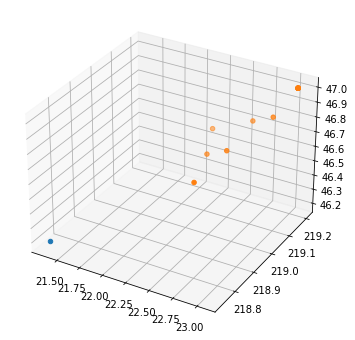

In [34]:
#for num in np.arange(len(pltlst)):
print('Input two numbers between 0 and {} with small difference for plots exaple 10000 then 10010'.format(len(pltlst)))
lim1 = input()
lim2 = input()

for num in np.arange(len(pltlst[int(lim1):int(lim2)])):
    xdata, ydata, zdata = np.zeros(len(lst3[pltlst[num]]),),np.zeros(len(lst3[pltlst[num]]),),np.zeros(len(lst3[pltlst[num]]),)
    
    fig = plt.figure(figsize=(6,6))
    print(num)
    ax = plt.axes(projection='3d')

    ax.scatter3D(tool_tip_X[pltlst[num]],tool_tip_Y[pltlst[num]] , tool_tip_Z[pltlst[num]])

    for i in np.arange(len(lst3[pltlst[num]])):
        xdata[i] = X[lst3[pltlst[num]]][i]
        ydata[i] = Y[lst3[pltlst[num]]][i]
        zdata[i] = Z[lst3[pltlst[num]]][i]
    
    ax.scatter3D(xdata, ydata, zdata)
    plt.pause(0.1)
   

In [35]:
lst4 = []
for i in np.arange(len(lst3)):
    lst4.append(df_m.iloc[list(lst3[i])].mean(axis=0))
    
mean_m = pd.concat(lst4,axis=1).T
mean_m.iloc[-100:-1]

time    MachineX   MachineY    MachineZ   MachineA    MachineC  \
35861  325.720001   -104.2302   -77.5062   -169.2374   -75.6809    347.4168   
35862  321.385002   -104.2857   -77.7523   -169.1062   -75.7318    347.4003   
35863  323.557499  -103.95855  -77.81455   -168.9259   -75.6943    347.4725   
35864         NaN         NaN        NaN         NaN        NaN         NaN   
35865  321.400002   -103.6959   -78.1293   -168.6143   -75.7057     347.529   
35866  325.739998   -103.3325    -78.088   -168.5015   -75.6478    347.6173   
35867  321.404999    -103.417   -78.3213   -168.3784   -75.6932    347.5941   
35868  323.582499  -103.09845   -78.4026    -168.207  -75.65895     347.673   
35869         NaN         NaN        NaN         NaN        NaN         NaN   
35870         NaN         NaN        NaN         NaN        NaN         NaN   
35871  322.295999  -102.60246  -78.87556  -167.71852  -75.64826   347.80244   
35872         NaN         NaN        NaN         NaN        NaN         NaN   
35873  321.440002   -102.3183   -79.1747   -167.4258   -75.6419    347.8835   
35874  325.783749    -101.949   -79.1698   -167.3246   -75.5937    347.9884   
35875  317.110001   -102.1118   -79.6867   -167.0073   -75.6597    347.9527   
35876  325.797501   -101.6006   -79.4845   -167.0176   -75.5793    348.0984   
35877  318.566666 -101.745667 -79.920433    -166.747   -75.6298    348.0705   
35878         NaN         NaN        NaN         NaN        NaN         NaN   
35879  320.032499 -101.426667 -80.122667   -166.5292   -75.6032    348.1793   
35880         NaN         NaN        NaN         NaN        NaN         NaN   
35881   322.56875 -101.052275 -80.298725 -166.327975   -75.5709  348.309125   
35882         NaN         NaN        NaN         NaN        NaN         NaN   
35883  322.367999  -100.79742  -80.59776  -166.07098   -75.5578   348.41622   
35884         NaN         NaN        NaN         NaN        NaN         NaN   
35885  317.177502   -100.7391   -81.1516   -165.6704     -75.57    348.4948   
35886  321.504997   -100.5327   -80.9839   -165.7581   -75.5462    348.5449   
35887  321.522503   -100.3425   -81.2185    -165.565  -75.53345    348.6419   
35888  321.529999   -100.3029   -81.2663   -165.5275   -75.5318    348.6618   
35889  320.670999  -100.16546   -81.5323  -165.32224  -75.52314   348.75374   
35890         NaN         NaN        NaN         NaN        NaN         NaN   
35891  320.109998    -99.9967 -81.816633 -165.101667   -75.5111  348.869367   
35892     321.555    -99.8937   -81.7985   -165.1051   -75.5042    348.9021   
35893  321.566248     -99.744  -82.00205   -164.9437    -75.492   349.00485   
35894  321.567501    -99.7123   -82.0437   -164.9123   -75.4905    349.0257   
35895  325.907497    -99.3427   -82.0713   -164.8613    -75.466    349.1704   
35896    321.5825    -99.5443   -82.2726   -164.7309   -75.4767    349.1518   
35897  317.259998    -99.6589   -82.5983   -164.4928   -75.4752    349.2175   
35898  323.763335    -99.2814  -82.39085   -164.6228  -75.45855    349.2904   
35899         NaN         NaN        NaN         NaN        NaN         NaN   
35900  321.612501    -99.2611 -82.654733   -164.4188   -75.4504    349.3974   
35901         NaN         NaN        NaN         NaN        NaN         NaN   
35902  321.628499   -99.12746  -82.82526  -164.27154    -75.437    349.5286   
35903         NaN         NaN        NaN         NaN        NaN         NaN   
35904  322.510001   -98.93968  -82.96134  -164.14254  -75.42184   349.67938   
35905         NaN         NaN        NaN         NaN        NaN         NaN   
35906  322.277143  -98.833886 -83.096814 -164.007886 -75.408829    349.8147   
35907         NaN         NaN        NaN         NaN        NaN         NaN   
35908  317.337498    -99.0462   -83.2981   -163.8014   -75.3985    349.8984   
35909  321.677502    -98.7405   -83.2305   -163.8584   -75.3944    349.9693   
35910  324.285001   -98.47204    -83.251  -163.80744  -75.38178

In [36]:
tcp_avg = [(lambda x: sum(x)/len(x))(item) if len(item)!=0 else np.nan for item in tcp_val]
len(tcp_avg)
#tcp_avg

35961

In [37]:
final_df = pd.concat([df_p,mean_m, pd.DataFrame({'tcp_error':tcp_avg})], axis=1)
final_df = final_df.drop(['Level','Step'],axis=1)
final_df = final_df.dropna()
print(final_df.shape)
final_df.iloc[0:10]

(21771, 69)


Leading angle  Side tilt angle  Surface Contact point X  \
8        0.605350         0.136441                20.230158   
9        0.597177         0.185822                20.229862   
10       0.586565         0.232489                20.229565   
11       0.573636         0.276109                20.229269   
12       0.558518         0.316495                20.228972   
13       0.541344         0.353585                20.228676   
14       0.522242         0.387416                20.228379   
15       0.501340         0.418094                20.228083   
16       0.478759         0.445778                20.227786   
17       0.454614         0.470650                20.227489   

    Surface contact point Y  Surface contact point z  Surface Orietation X  \
8                220.072035                39.789210             -0.152592   
9                220.072062                39.789089             -0.152594   
10               220.072090                39.788968             -0.152597   
11               220.072117                39.788846             -0.152599   
12               220.072145                39.788725             -0.152602   
13               220.072173                39.788604             -0.152604   
14               220.072200                39.788483             -0.152606   
15               220.072228                39.788361             -0.152609   
16               220.072255                39.788240             -0.152611   
17               220.072283                39.788119             -0.152614   

    Surface Orietation Y  Surface Orietation Z  Tool Tip Point X  \
8               0.816819              0.556347         21.342939   
9               0.816819              0.556346         21.351183   
10              0.816819              0.556346         21.347464   
11              0.816819              0.556345         21.331797   
12              0.816819              0.556345         21.304243   
13              0.816819              0.556344         21.264914   
14              0.816819              0.556344         21.213966   
15              0.816819              0.556343         21.151604   
16              0.816818              0.556343         21.078077   
17              0.816818              0.556343         20.993679   

    Tool Tip Point Y  Tool Tip Point Z  Tool Orientation X  \
8         218.730804         46.195240            0.001198   
9         218.735870         46.005775            0.001198   
10        218.741852         45.816193            0.001198   
11        218.748688         45.627251            0.001198   
12        218.756363         45.439705            0.001198   
13        218.764847         45.254307            0.001198   
14        218.774109         45.071800            0.001198   
15        218.784103         44.892910            0.001198   
16        218.794815         44.718349            0.001198   
17        218.806168         44.548824            0.001198   

    Tool Orientation Y  Tool Orientation Z  \
8             0.999999            0.000856   
9             0.999999            0.000856   
10            0.999999            0.000856   
11            0.999999            0.000856   
12            0.999999            0.000856   
13            0.999999            0.000856   
14            0.999999            0.000856   
15            0.999999            0.000856   
16            0.999999            0.000856   
17            0.999999            0.000856   

    Closes Point Distance (Surface Contact Point - Acquired TCP 1030 blade0)  \
8                                            5.929007                          
9                                            5.929006                          
10                                           5.929005                          
11                                           5.929004                          
12                                           5.929003                          
13                              

In [38]:
final_df.shape 

(21771, 69)

### Using Combined dataset

In [39]:
x_final = final_df['MachineX'].copy(deep=True)                 # using machine data from newly created combined dataset
y_final = final_df['MachineY'].copy(deep=True)
z_final = final_df['MachineZ'].copy(deep=True)
a_final = final_df['MachineA'].copy(deep=True)
c_final = final_df['MachineC'].copy(deep=True)

size1_final = x_final.shape[0]

# converting pandas series to numpy array
x_final = x_final.to_numpy()
y_final = y_final.to_numpy()
z_final = z_final.to_numpy()
a_final = a_final.to_numpy(dtype =  np.float64)
a_final = np.deg2rad(a_final)
c_final = c_final.to_numpy(dtype =  np.float64)
c_final = np.deg2rad(c_final)

tool_tip_X_final = final_df['Tool Tip Point X'].to_numpy()        # using newly created combined dataset
tool_tip_Y_final = final_df['Tool Tip Point Y'].to_numpy()
tool_tip_Z_final = final_df['Tool Tip Point Z'].to_numpy()
X_inv_final = tool_tip_X_final
Y_inv_final = tool_tip_Y_final
Z_inv_final = tool_tip_Z_final

In [40]:
#compensation_values
compensation_values = compensation_values_df.to_numpy()

# Within each cube we have ranges defined in x,y,z for the machine position

x_range = np.arange(-200,201,100)
y_range = np.arange(-300,301,150)
z_range = np.arange(-500,1,50)

obj3_final = compensation.Compensation(compensation_values,x_range,y_range,z_range)

# Caclculation of compensation error values based on machine positions obtained through inverse transformation
deltaX1_final, deltaY1_final, deltaZ1_final,deltaI1_final,deltaJ1_final,deltaK1_final = obj3_final.calculate(x_final,y_final,z_final)  
size3_final = x_final.shape[0]
conc3_final = np.concatenate((deltaX1_final.reshape(size3_final,1),deltaY1_final.reshape(size3_final,1),deltaZ1_final.reshape(size3_final,1),deltaI1_final.reshape(size3_final,1),deltaJ1_final.reshape(size3_final,1),deltaK1_final.reshape(size3_final,1)),axis=1)

# prininting the compensation error values
df_obj3_final = pd.DataFrame(conc3_final, columns=['deltaX1 final','deltaY1 final','deltaZ1 final','deltaI1 final','deltaJ1 final','deltaK1 final'])
df_obj3_final.head(5)  

x_compensated_final = x_final + deltaX1_final*10**-3    # since given compensation is to be converted from microns to mm (10**-6 x 10**3 = 10**-3)
y_compensated_final = y_final + deltaY1_final*10**-3
z_compensated_final = z_final + deltaZ1_final*10**-3

conc4_final = np.concatenate((x_compensated_final.reshape(size3_final,1),y_compensated_final.reshape(size3_final,1),z_compensated_final.reshape(size3_final,1)),axis=1)
df_obj4_final = pd.DataFrame(conc4_final, columns=['x_compensated final','y_compensated final','z_compensated final'])
df_obj4_final.head(5)
                          


x_compensated final y_compensated final z_compensated final
0          -84.088682          -80.314894         -142.037811
1          -92.371222          -74.375621         -143.970504
2          -97.166867          -72.043177         -145.724826
3          -93.403395           -72.50443         -144.126928
4          -94.137543           -71.62631         -144.294981

In [41]:
obj_final = transformation.Transformation(size1_final,angle)
# Forward Transformation fuction:
# Input : Machine points in machine coordinate system
# Output: returns too tip points and orientation in workpiece coordinate system
tool_position_workpiece_CS_final, tool_orientation_workpiece_CS_final = obj_final.forward(x_compensated_final,y_compensated_final,z_compensated_final,a_final,c_final)

X_final = tool_position_workpiece_CS_final[0,0,:]
Y_final = tool_position_workpiece_CS_final[1,0,:]
Z_final = tool_position_workpiece_CS_final[2,0,:]

I_final = tool_orientation_workpiece_CS_final[0,0,:]
J_final = tool_orientation_workpiece_CS_final[1,0,:]
K_final = tool_orientation_workpiece_CS_final[2,0,:]

# Verification the correctness of code, i.e on applying reverse transformation on the forward transformation we should get same values
machine_points_xyz_final, machine_direction_ac_final = obj_final.backward(X_final,Y_final,Z_final,I_final,J_final,K_final)

x_out_final = machine_points_xyz_final[0,0,:]
y_out_final = machine_points_xyz_final[1,0,:]
z_out_final = machine_points_xyz_final[2,0,:]

a_out_final = machine_direction_ac_final[0,0,:]
c_out_final = machine_direction_ac_final[1,0,:]

conc1_final = np.concatenate((x_final.reshape(size1_final,1),x_out_final.reshape(size1_final,1),y_final.reshape(size1_final,1),y_out_final.reshape(size1_final,1),z_final.reshape(size1_final,1),z_out_final.reshape(size1_final,1),a_final.reshape(size1_final,1),a_out_final.reshape(size1_final,1),c_final.reshape(size1_final,1),c_out_final.reshape(size1_final,1)),axis=1)
df_obj1_final = pd.DataFrame(conc1_final, columns=['x final','x_out final','y final','y_out final','z final','z_out final','a final','a_out final','c final','c_out'])

df_obj1_final.head(2)

x final x_out final    y final y_out final     z final z_out final  \
0 -84.111625 -159.647911  -80.30357  -93.511894  -142.02981 -192.139237   
1 -92.394089  -165.50555 -74.364056  -89.860554 -143.962459 -196.553822   

    a final a_out final   c final     c_out  
0 -1.313241   -1.313241   6.20636 -0.495704  
1 -1.284408   -1.284408  6.167938 -0.534126

In [42]:
conc11_final = np.concatenate((x_final.reshape(size1_final,1),y_final.reshape(size1_final,1),z_final.reshape(size1_final,1),a_final.reshape(size1_final,1),c_final.reshape(size1_final,1),X_final.reshape(size1_final,1),Y_final.reshape(size1_final,1),Z_final.reshape(size1_final,1),I_final.reshape(size1_final,1),J_final.reshape(size1_final,1),K_final.reshape(size1_final,1)),axis=1)
dfout11_final = pd.DataFrame(conc11_final, columns=['x final','y final','z final','a final','c final','X final','Y final','Z final','I final','J final','K final'])
dfout11_final.head(2)


x final    y final     z final   a final   c final    X final  \
0 -84.111625  -80.30357  -142.02981 -1.313241   6.20636   22.89164   
1 -92.394089 -74.364056 -143.962459 -1.284408  6.167938  22.024358   

      Y final    Z final   I final   J final   K final  
0  219.118591  46.932253  0.459962   0.85062  0.254717  
1  218.677963  46.502841  0.488354  0.825657   0.28249

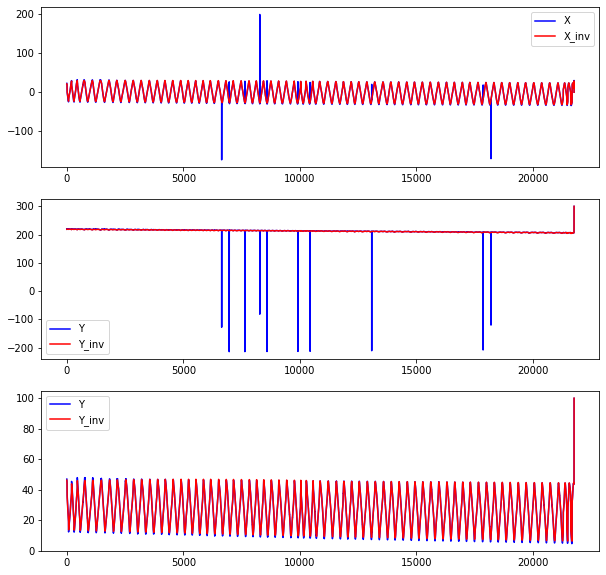

In [43]:
subplotter(0,final_df.shape[0],X_final,Y_final,Z_final,X_inv_final,Y_inv_final,Z_inv_final)   # using combined dataset

In [44]:
subplotter(9970,9980,X_final,Y_final,Z_final,X_inv_final,Y_inv_final,Z_inv_final)   # using combined dataset

Text(0.5, 1.0, 'TCP Error plot')

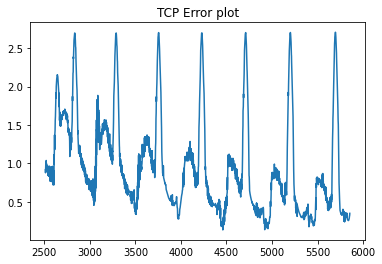

In [45]:
plt.plot((final_df['tcp_error']).iloc[1000:3500])
plt.title('TCP Error plot')

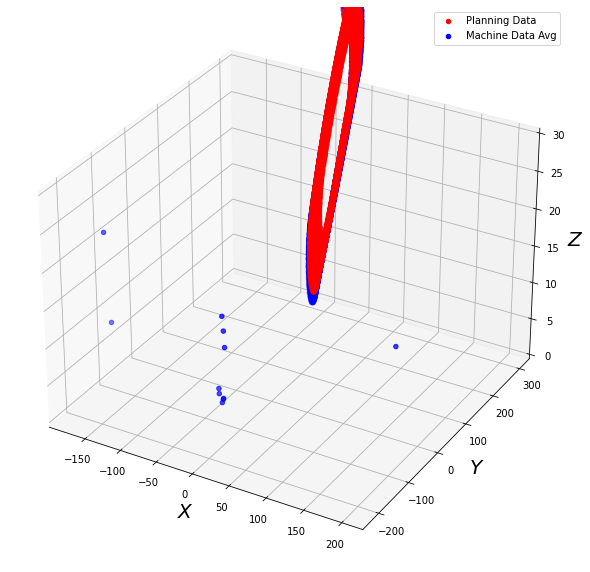

In [46]:
plt.figure(figsize=(10,15))
ax1 = plt.axes(projection='3d')
ax1.set_zlim3d([0,30])
ax1.set_xlabel('$X$', fontsize=20)

ax1.set_ylabel('$Y$', fontsize=20)
ax1.set_zlabel('$Z$', fontsize=20)

ax1.scatter3D(X_inv_final, Y_inv_final, Z_inv_final, color = 'red',label = 'Planning Data')
ax1.legend()

ax1.scatter3D(X_final, Y_final, Z_final, color = 'blue',label = 'Machine Data Avg')
ax1.legend()

In [53]:
peaks, _ = find_peaks(-Y_final, height=(0,None))
peaks.shape

(10,)

In [49]:
mean = final_df['tcp_error'].mean()
mean

0.6684450148590205

In [ ]:
median = final_df['tcp_error'].median()
median

In [ ]:
minimum = final_df['tcp_error'].min()
minimum

In [ ]:
maximum = final_df['tcp_error'].max()  
maximum

In [ ]:
final_df = final_df.iloc[0:21500]

In [ ]:
final_df.to_excel(str(dir_final_save)+'finaldf_forward_with_compensation'+str(block)+'__'+str(angle)+'.xlsx') 